In [2]:
import sys
import os
sys.path.append('src/')

In [11]:
from model import MixedMILModel
from dataset import FeaturesDataset, compute_dataset_stats, split_for_crossval
from train import train, make_cross_val, train_N_models, average_predictions, load_models_and_average
from predict import load_models_and_average, write_prediction_file, topk_attention_maps
import torch

In [4]:
base_dir = '.'
model_dir = os.path.join(base_dir, 'saved_models')

## Load the data

In [5]:
train_feat_dir = os.path.join(base_dir, 'train_input/resnet_features/')
train_output_file = os.path.join(base_dir, 'training_output_bis_EyawEvU.csv')
annotation_file = os.path.join(base_dir, 'train_input/train_tile_annotations.csv')
train_dataset = FeaturesDataset(train_feat_dir, train_output_file, annotation_file=annotation_file)
N_train = train_dataset.__len__()

There are 279 entries in the train dataset
There are 112 (40.143%) positive examples and 167 (59.857%) negative examples in the train dataset
11 (3.943%) slides are annotated. 11 (100.000%) are positive.


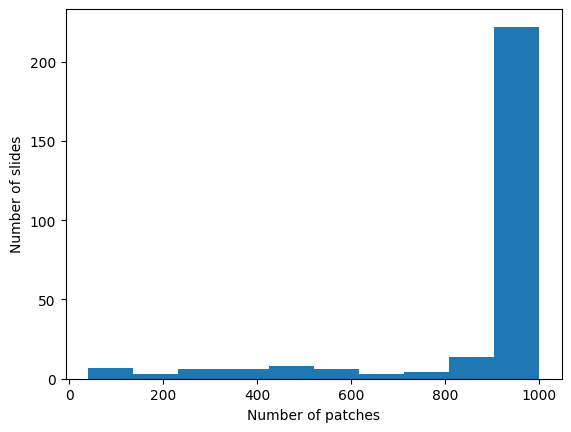

In [7]:
compute_dataset_stats(train_dataset, name='train')

In [ ]:
folds = split_for_crossval(train_dataset, 5)

## Mixed Multi-Instance Learning

MixedMILModel(
  (reduction): Sequential(
    (0): Dropout(p=0, inplace=False)
    (1): Linear(in_features=2048, out_features=1024, bias=True)
    (2): ReLU()
  )
  (attention): AttentionLayer(
    (U): Linear(in_features=1024, out_features=512, bias=False)
    (V): Linear(in_features=1024, out_features=512, bias=False)
    (W): Linear(in_features=512, out_features=1, bias=False)
  )
  (slide_clf): Sequential(
    (0): Dropout(p=0, inplace=False)
    (1): Linear(in_features=1024, out_features=256, bias=True)
    (2): ReLU()
    (3): Dropout(p=0, inplace=False)
    (4): Linear(in_features=256, out_features=1, bias=True)
    (5): Sigmoid()
  )
  (tiles_clf): Sequential(
    (0): Dropout(p=0, inplace=False)
    (1): Linear(in_features=1024, out_features=1, bias=True)
    (2): Sigmoid()
  )
)


100%|██████████| 56/56 [00:01<00:00, 40.70it/s]


Epoch 1: train loss 0.522 train auc 0.548 tiles auc 0.801 val loss 0.614 val auc 0.654


100%|██████████| 56/56 [00:01<00:00, 41.64it/s]


Epoch 2: train loss 0.382 train auc 0.799 tiles auc 0.886 val loss 0.710 val auc 0.738


100%|██████████| 56/56 [00:01<00:00, 42.19it/s]


Epoch 3: train loss 0.428 train auc 0.734 tiles auc 0.883 val loss 0.507 val auc 0.769


100%|██████████| 56/56 [00:01<00:00, 38.06it/s]


Epoch 4: train loss 0.361 train auc 0.807 tiles auc 0.893 val loss 0.510 val auc 0.787


100%|██████████| 56/56 [00:01<00:00, 41.55it/s]


Epoch 5: train loss 0.343 train auc 0.858 tiles auc 0.895 val loss 0.492 val auc 0.766


100%|██████████| 56/56 [00:01<00:00, 42.74it/s]


Epoch 6: train loss 0.345 train auc 0.855 tiles auc 0.886 val loss 0.569 val auc 0.774


100%|██████████| 56/56 [00:01<00:00, 40.01it/s]


Epoch 7: train loss 0.347 train auc 0.854 tiles auc 0.895 val loss 0.511 val auc 0.811


100%|██████████| 56/56 [00:01<00:00, 42.21it/s]


Epoch 8: train loss 0.347 train auc 0.863 tiles auc 0.899 val loss 0.536 val auc 0.794


100%|██████████| 56/56 [00:01<00:00, 42.21it/s]


Epoch 9: train loss 0.314 train auc 0.896 tiles auc 0.894 val loss 0.492 val auc 0.798


100%|██████████| 56/56 [00:01<00:00, 42.36it/s]


Epoch 10: train loss 0.316 train auc 0.894 tiles auc 0.901 val loss 0.500 val auc 0.841


100%|██████████| 56/56 [00:01<00:00, 40.63it/s]


Epoch 11: train loss 0.268 train auc 0.920 tiles auc 0.912 val loss 0.480 val auc 0.799


100%|██████████| 56/56 [00:01<00:00, 37.88it/s]


Epoch 12: train loss 0.235 train auc 0.960 tiles auc 0.913 val loss 0.623 val auc 0.731


100%|██████████| 56/56 [00:01<00:00, 42.30it/s]


Epoch 13: train loss 0.232 train auc 0.966 tiles auc 0.914 val loss 0.675 val auc 0.742


100%|██████████| 56/56 [00:01<00:00, 39.91it/s]


Epoch 14: train loss 0.210 train auc 0.974 tiles auc 0.918 val loss 0.711 val auc 0.766


100%|██████████| 56/56 [00:01<00:00, 37.94it/s]


Epoch 15: train loss 0.201 train auc 0.981 tiles auc 0.911 val loss 0.801 val auc 0.755


100%|██████████| 56/56 [00:01<00:00, 42.85it/s]


Epoch 16: train loss 0.245 train auc 0.942 tiles auc 0.914 val loss 0.726 val auc 0.786


100%|██████████| 56/56 [00:01<00:00, 42.56it/s]


Epoch 17: train loss 0.211 train auc 0.975 tiles auc 0.921 val loss 0.693 val auc 0.766


100%|██████████| 56/56 [00:01<00:00, 41.91it/s]


Epoch 18: train loss 0.208 train auc 0.974 tiles auc 0.917 val loss 0.707 val auc 0.779


100%|██████████| 56/56 [00:01<00:00, 41.85it/s]


Epoch 19: train loss 0.186 train auc 0.987 tiles auc 0.919 val loss 0.843 val auc 0.763


100%|██████████| 56/56 [00:01<00:00, 37.80it/s]


Epoch 20: train loss 0.170 train auc 0.993 tiles auc 0.922 val loss 0.802 val auc 0.765


100%|██████████| 56/56 [00:01<00:00, 42.31it/s]


Epoch 21: train loss 0.144 train auc 0.999 tiles auc 0.920 val loss 0.969 val auc 0.746


100%|██████████| 56/56 [00:01<00:00, 41.82it/s]


Epoch 22: train loss 0.136 train auc 0.999 tiles auc 0.924 val loss 1.050 val auc 0.771


100%|██████████| 56/56 [00:01<00:00, 38.74it/s]


Epoch 23: train loss 0.138 train auc 1.000 tiles auc 0.918 val loss 1.040 val auc 0.790


100%|██████████| 56/56 [00:01<00:00, 41.27it/s]


Epoch 24: train loss 0.139 train auc 0.999 tiles auc 0.928 val loss 1.083 val auc 0.777


100%|██████████| 56/56 [00:01<00:00, 42.05it/s]


Epoch 25: train loss 0.137 train auc 0.998 tiles auc 0.929 val loss 1.216 val auc 0.761


100%|██████████| 56/56 [00:01<00:00, 43.16it/s]


Epoch 26: train loss 0.164 train auc 0.987 tiles auc 0.930 val loss 1.363 val auc 0.711


100%|██████████| 56/56 [00:01<00:00, 42.06it/s]


Epoch 27: train loss 0.151 train auc 0.996 tiles auc 0.930 val loss 1.110 val auc 0.769


100%|██████████| 56/56 [00:01<00:00, 37.93it/s]


Epoch 28: train loss 0.136 train auc 0.999 tiles auc 0.930 val loss 1.196 val auc 0.746


100%|██████████| 56/56 [00:01<00:00, 41.45it/s]


Epoch 29: train loss 0.119 train auc 1.000 tiles auc 0.931 val loss 1.230 val auc 0.769


100%|██████████| 56/56 [00:01<00:00, 42.61it/s]


Epoch 30: train loss 0.116 train auc 1.000 tiles auc 0.932 val loss 1.293 val auc 0.764


100%|██████████| 56/56 [00:01<00:00, 38.42it/s]


Epoch 31: train loss 0.113 train auc 1.000 tiles auc 0.935 val loss 1.328 val auc 0.761


100%|██████████| 56/56 [00:01<00:00, 42.47it/s]


Epoch 32: train loss 0.110 train auc 1.000 tiles auc 0.935 val loss 1.347 val auc 0.759


100%|██████████| 56/56 [00:01<00:00, 42.08it/s]


Epoch 33: train loss 0.109 train auc 1.000 tiles auc 0.936 val loss 1.354 val auc 0.762


100%|██████████| 56/56 [00:01<00:00, 41.22it/s]


Epoch 34: train loss 0.110 train auc 1.000 tiles auc 0.934 val loss 1.403 val auc 0.761


100%|██████████| 56/56 [00:01<00:00, 43.14it/s]


Epoch 35: train loss 0.109 train auc 1.000 tiles auc 0.934 val loss 1.425 val auc 0.759


100%|██████████| 56/56 [00:01<00:00, 37.73it/s]


Epoch 36: train loss 0.109 train auc 1.000 tiles auc 0.933 val loss 1.485 val auc 0.763


100%|██████████| 56/56 [00:01<00:00, 42.75it/s]


Epoch 37: train loss 0.108 train auc 1.000 tiles auc 0.934 val loss 1.477 val auc 0.767


100%|██████████| 56/56 [00:01<00:00, 42.29it/s]


Epoch 38: train loss 0.108 train auc 1.000 tiles auc 0.935 val loss 1.518 val auc 0.761


100%|██████████| 56/56 [00:01<00:00, 38.76it/s]


Epoch 39: train loss 0.109 train auc 1.000 tiles auc 0.933 val loss 1.485 val auc 0.767


100%|██████████| 56/56 [00:01<00:00, 42.58it/s]


Epoch 40: train loss 0.107 train auc 1.000 tiles auc 0.935 val loss 1.557 val auc 0.763


100%|██████████| 56/56 [00:01<00:00, 42.79it/s]


Epoch 41: train loss 0.106 train auc 1.000 tiles auc 0.937 val loss 1.556 val auc 0.769


100%|██████████| 56/56 [00:01<00:00, 42.04it/s]


Epoch 42: train loss 0.105 train auc 1.000 tiles auc 0.938 val loss 1.548 val auc 0.765


100%|██████████| 56/56 [00:01<00:00, 41.15it/s]


Epoch 43: train loss 0.105 train auc 1.000 tiles auc 0.938 val loss 1.563 val auc 0.765


100%|██████████| 56/56 [00:01<00:00, 38.29it/s]


Epoch 44: train loss 0.104 train auc 1.000 tiles auc 0.939 val loss 1.580 val auc 0.766


100%|██████████| 56/56 [00:01<00:00, 42.27it/s]


Epoch 45: train loss 0.104 train auc 1.000 tiles auc 0.939 val loss 1.596 val auc 0.766


100%|██████████| 56/56 [00:01<00:00, 41.99it/s]


Epoch 46: train loss 0.103 train auc 1.000 tiles auc 0.941 val loss 1.614 val auc 0.766


100%|██████████| 56/56 [00:01<00:00, 40.02it/s]


Epoch 47: train loss 0.103 train auc 1.000 tiles auc 0.941 val loss 1.728 val auc 0.770


100%|██████████| 56/56 [00:01<00:00, 41.65it/s]


Epoch 48: train loss 0.105 train auc 1.000 tiles auc 0.938 val loss 1.644 val auc 0.765


100%|██████████| 56/56 [00:01<00:00, 42.53it/s]


Epoch 49: train loss 0.103 train auc 1.000 tiles auc 0.940 val loss 1.668 val auc 0.765


100%|██████████| 56/56 [00:01<00:00, 42.46it/s]


Epoch 50: train loss 0.104 train auc 1.000 tiles auc 0.939 val loss 1.676 val auc 0.765


100%|██████████| 56/56 [00:01<00:00, 42.22it/s]


Epoch 51: train loss 0.103 train auc 1.000 tiles auc 0.940 val loss 1.701 val auc 0.767


100%|██████████| 56/56 [00:01<00:00, 38.72it/s]


Epoch 52: train loss 0.103 train auc 1.000 tiles auc 0.940 val loss 1.701 val auc 0.765


100%|██████████| 56/56 [00:01<00:00, 42.42it/s]


Epoch 53: train loss 0.102 train auc 1.000 tiles auc 0.942 val loss 1.728 val auc 0.766


100%|██████████| 56/56 [00:01<00:00, 42.84it/s]


Epoch 54: train loss 0.102 train auc 1.000 tiles auc 0.941 val loss 1.744 val auc 0.767


100%|██████████| 56/56 [00:01<00:00, 40.00it/s]


Epoch 55: train loss 0.102 train auc 1.000 tiles auc 0.942 val loss 1.741 val auc 0.767


100%|██████████| 56/56 [00:01<00:00, 41.79it/s]


Epoch 56: train loss 0.102 train auc 1.000 tiles auc 0.942 val loss 1.756 val auc 0.770


100%|██████████| 56/56 [00:01<00:00, 41.76it/s]


Epoch 57: train loss 0.101 train auc 1.000 tiles auc 0.942 val loss 1.780 val auc 0.770


100%|██████████| 56/56 [00:01<00:00, 42.01it/s]


Epoch 58: train loss 0.101 train auc 1.000 tiles auc 0.942 val loss 1.778 val auc 0.770


100%|██████████| 56/56 [00:01<00:00, 43.01it/s]


Epoch 59: train loss 0.101 train auc 1.000 tiles auc 0.943 val loss 1.800 val auc 0.773


100%|██████████| 56/56 [00:01<00:00, 38.23it/s]


Epoch 60: train loss 0.101 train auc 1.000 tiles auc 0.942 val loss 1.816 val auc 0.771


100%|██████████| 56/56 [00:01<00:00, 41.96it/s]


Epoch 61: train loss 0.100 train auc 1.000 tiles auc 0.944 val loss 1.823 val auc 0.771


100%|██████████| 56/56 [00:01<00:00, 39.55it/s]


Epoch 62: train loss 0.100 train auc 1.000 tiles auc 0.944 val loss 1.835 val auc 0.775


100%|██████████| 56/56 [00:01<00:00, 36.57it/s]


Epoch 63: train loss 0.100 train auc 1.000 tiles auc 0.944 val loss 1.834 val auc 0.773


100%|██████████| 56/56 [00:01<00:00, 42.39it/s]


Epoch 64: train loss 0.100 train auc 1.000 tiles auc 0.944 val loss 1.856 val auc 0.773


100%|██████████| 56/56 [00:01<00:00, 43.08it/s]


Epoch 65: train loss 0.100 train auc 1.000 tiles auc 0.944 val loss 1.867 val auc 0.778


100%|██████████| 56/56 [00:01<00:00, 42.38it/s]


Epoch 66: train loss 0.100 train auc 1.000 tiles auc 0.945 val loss 1.881 val auc 0.777


100%|██████████| 56/56 [00:01<00:00, 42.13it/s]


Epoch 67: train loss 0.100 train auc 1.000 tiles auc 0.944 val loss 1.891 val auc 0.778


100%|██████████| 56/56 [00:01<00:00, 38.70it/s]


Epoch 68: train loss 0.100 train auc 1.000 tiles auc 0.944 val loss 1.891 val auc 0.777


100%|██████████| 56/56 [00:01<00:00, 42.12it/s]


Epoch 69: train loss 0.100 train auc 1.000 tiles auc 0.945 val loss 1.910 val auc 0.785


100%|██████████| 56/56 [00:01<00:00, 42.30it/s]


Epoch 70: train loss 0.100 train auc 1.000 tiles auc 0.944 val loss 1.918 val auc 0.783


100%|██████████| 56/56 [00:01<00:00, 37.94it/s]


Epoch 71: train loss 0.099 train auc 1.000 tiles auc 0.945 val loss 1.927 val auc 0.785


100%|██████████| 56/56 [00:01<00:00, 42.26it/s]


Epoch 72: train loss 0.099 train auc 1.000 tiles auc 0.946 val loss 3.428 val auc 0.777


100%|██████████| 56/56 [00:01<00:00, 42.65it/s]


Epoch 73: train loss 0.099 train auc 1.000 tiles auc 0.946 val loss 1.948 val auc 0.783


100%|██████████| 56/56 [00:01<00:00, 40.91it/s]


Epoch 74: train loss 0.099 train auc 1.000 tiles auc 0.946 val loss 3.451 val auc 0.778


100%|██████████| 56/56 [00:01<00:00, 42.50it/s]


Epoch 75: train loss 0.099 train auc 1.000 tiles auc 0.946 val loss 3.462 val auc 0.778


100%|██████████| 56/56 [00:01<00:00, 37.50it/s]


Epoch 76: train loss 0.099 train auc 1.000 tiles auc 0.946 val loss 1.971 val auc 0.783


100%|██████████| 56/56 [00:01<00:00, 41.96it/s]


Epoch 77: train loss 0.099 train auc 1.000 tiles auc 0.946 val loss 3.484 val auc 0.777


100%|██████████| 56/56 [00:01<00:00, 42.57it/s]


Epoch 78: train loss 0.098 train auc 1.000 tiles auc 0.946 val loss 3.497 val auc 0.779


100%|██████████| 56/56 [00:01<00:00, 36.91it/s]


Epoch 79: train loss 0.099 train auc 1.000 tiles auc 0.945 val loss 3.507 val auc 0.779


100%|██████████| 56/56 [00:01<00:00, 41.92it/s]


Epoch 80: train loss 0.098 train auc 1.000 tiles auc 0.946 val loss 3.506 val auc 0.781


100%|██████████| 56/56 [00:01<00:00, 41.21it/s]


Epoch 81: train loss 0.098 train auc 1.000 tiles auc 0.947 val loss 3.516 val auc 0.781


100%|██████████| 56/56 [00:01<00:00, 42.19it/s]


Epoch 82: train loss 0.098 train auc 1.000 tiles auc 0.947 val loss 3.521 val auc 0.781


100%|██████████| 56/56 [00:01<00:00, 42.70it/s]


Epoch 83: train loss 0.098 train auc 1.000 tiles auc 0.947 val loss 3.528 val auc 0.782


100%|██████████| 56/56 [00:01<00:00, 39.89it/s]


Epoch 84: train loss 0.098 train auc 1.000 tiles auc 0.947 val loss 3.538 val auc 0.781


100%|██████████| 56/56 [00:01<00:00, 42.39it/s]


Epoch 85: train loss 0.098 train auc 1.000 tiles auc 0.947 val loss 3.540 val auc 0.782


100%|██████████| 56/56 [00:01<00:00, 41.75it/s]


Epoch 86: train loss 0.098 train auc 1.000 tiles auc 0.947 val loss 3.548 val auc 0.782


100%|██████████| 56/56 [00:01<00:00, 37.79it/s]


Epoch 87: train loss 0.098 train auc 1.000 tiles auc 0.947 val loss 3.558 val auc 0.781


100%|██████████| 56/56 [00:01<00:00, 41.97it/s]


Epoch 88: train loss 0.098 train auc 1.000 tiles auc 0.947 val loss 3.564 val auc 0.782


100%|██████████| 56/56 [00:01<00:00, 41.56it/s]


Epoch 89: train loss 0.098 train auc 1.000 tiles auc 0.947 val loss 3.570 val auc 0.782


100%|██████████| 56/56 [00:01<00:00, 41.73it/s]


Epoch 90: train loss 0.098 train auc 1.000 tiles auc 0.947 val loss 3.577 val auc 0.782


100%|██████████| 56/56 [00:01<00:00, 42.16it/s]


Epoch 91: train loss 0.097 train auc 1.000 tiles auc 0.947 val loss 3.585 val auc 0.782


100%|██████████| 56/56 [00:01<00:00, 39.14it/s]


Epoch 92: train loss 0.097 train auc 1.000 tiles auc 0.947 val loss 3.589 val auc 0.782


100%|██████████| 56/56 [00:01<00:00, 42.09it/s]


Epoch 93: train loss 0.097 train auc 1.000 tiles auc 0.947 val loss 3.594 val auc 0.782


100%|██████████| 56/56 [00:01<00:00, 42.17it/s]


Epoch 94: train loss 0.097 train auc 1.000 tiles auc 0.947 val loss 3.603 val auc 0.782


100%|██████████| 56/56 [00:01<00:00, 37.32it/s]


Epoch 95: train loss 0.097 train auc 1.000 tiles auc 0.947 val loss 3.608 val auc 0.782


100%|██████████| 56/56 [00:01<00:00, 41.97it/s]


Epoch 96: train loss 0.097 train auc 1.000 tiles auc 0.947 val loss 3.612 val auc 0.782


100%|██████████| 56/56 [00:01<00:00, 42.25it/s]


Epoch 97: train loss 0.097 train auc 1.000 tiles auc 0.947 val loss 3.623 val auc 0.782


100%|██████████| 56/56 [00:01<00:00, 39.93it/s]


Epoch 98: train loss 0.097 train auc 1.000 tiles auc 0.947 val loss 3.630 val auc 0.781


100%|██████████| 56/56 [00:01<00:00, 41.74it/s]


Epoch 99: train loss 0.097 train auc 1.000 tiles auc 0.947 val loss 3.636 val auc 0.781


100%|██████████| 56/56 [00:01<00:00, 39.03it/s]


Epoch 100: train loss 0.097 train auc 1.000 tiles auc 0.947 val loss 3.641 val auc 0.781
Best auc: 0.841, last auc: 0.781, best epoch: 10


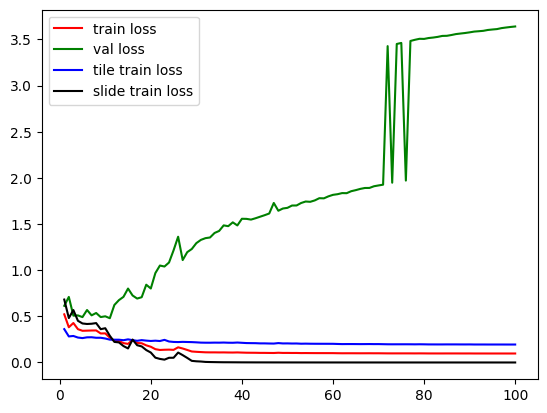

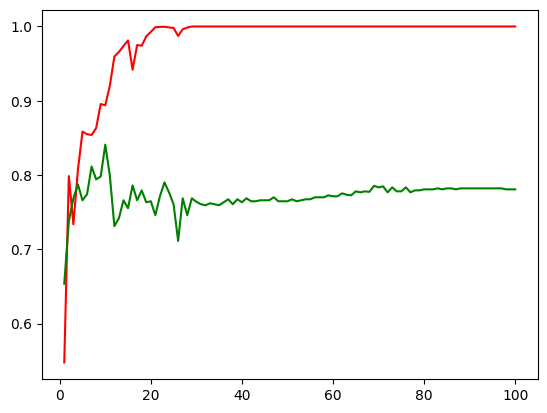

MixedMILModel(
  (reduction): Sequential(
    (0): Dropout(p=0, inplace=False)
    (1): Linear(in_features=2048, out_features=1024, bias=True)
    (2): ReLU()
  )
  (attention): AttentionLayer(
    (U): Linear(in_features=1024, out_features=512, bias=False)
    (V): Linear(in_features=1024, out_features=512, bias=False)
    (W): Linear(in_features=512, out_features=1, bias=False)
  )
  (slide_clf): Sequential(
    (0): Dropout(p=0, inplace=False)
    (1): Linear(in_features=1024, out_features=256, bias=True)
    (2): ReLU()
    (3): Dropout(p=0, inplace=False)
    (4): Linear(in_features=256, out_features=1, bias=True)
    (5): Sigmoid()
  )
  (tiles_clf): Sequential(
    (0): Dropout(p=0, inplace=False)
    (1): Linear(in_features=1024, out_features=1, bias=True)
    (2): Sigmoid()
  )
)


100%|██████████| 56/56 [00:01<00:00, 40.54it/s]


Epoch 1: train loss 0.521 train auc 0.526 tiles auc 0.803 val loss 0.520 val auc 0.833


100%|██████████| 56/56 [00:01<00:00, 40.30it/s]


Epoch 2: train loss 0.425 train auc 0.723 tiles auc 0.876 val loss 0.467 val auc 0.755


100%|██████████| 56/56 [00:01<00:00, 35.96it/s]


Epoch 3: train loss 0.410 train auc 0.770 tiles auc 0.875 val loss 0.577 val auc 0.659


100%|██████████| 56/56 [00:01<00:00, 40.69it/s]


Epoch 4: train loss 0.386 train auc 0.750 tiles auc 0.891 val loss 0.492 val auc 0.676


100%|██████████| 56/56 [00:01<00:00, 41.63it/s]


Epoch 5: train loss 0.375 train auc 0.836 tiles auc 0.900 val loss 0.554 val auc 0.790


100%|██████████| 56/56 [00:01<00:00, 36.23it/s]


Epoch 6: train loss 0.346 train auc 0.859 tiles auc 0.904 val loss 0.467 val auc 0.777


100%|██████████| 56/56 [00:01<00:00, 40.79it/s]


Epoch 7: train loss 0.334 train auc 0.867 tiles auc 0.908 val loss 0.510 val auc 0.762


100%|██████████| 56/56 [00:01<00:00, 41.59it/s]


Epoch 8: train loss 0.338 train auc 0.863 tiles auc 0.908 val loss 0.437 val auc 0.766


100%|██████████| 56/56 [00:01<00:00, 41.24it/s]


Epoch 9: train loss 0.305 train auc 0.905 tiles auc 0.911 val loss 0.621 val auc 0.680


100%|██████████| 56/56 [00:01<00:00, 40.94it/s]


Epoch 10: train loss 0.374 train auc 0.838 tiles auc 0.894 val loss 0.603 val auc 0.723


100%|██████████| 56/56 [00:01<00:00, 38.25it/s]


Epoch 11: train loss 0.318 train auc 0.893 tiles auc 0.902 val loss 0.531 val auc 0.757


100%|██████████| 56/56 [00:01<00:00, 40.83it/s]


Epoch 12: train loss 0.275 train auc 0.940 tiles auc 0.910 val loss 0.673 val auc 0.778


100%|██████████| 56/56 [00:01<00:00, 40.73it/s]


Epoch 13: train loss 0.271 train auc 0.932 tiles auc 0.921 val loss 0.600 val auc 0.771


100%|██████████| 56/56 [00:01<00:00, 36.86it/s]


Epoch 14: train loss 0.238 train auc 0.964 tiles auc 0.917 val loss 0.633 val auc 0.755


100%|██████████| 56/56 [00:01<00:00, 41.45it/s]


Epoch 15: train loss 0.264 train auc 0.947 tiles auc 0.911 val loss 0.679 val auc 0.762


100%|██████████| 56/56 [00:01<00:00, 40.66it/s]


Epoch 16: train loss 0.265 train auc 0.956 tiles auc 0.899 val loss 0.723 val auc 0.762


100%|██████████| 56/56 [00:01<00:00, 38.48it/s]


Epoch 17: train loss 0.246 train auc 0.957 tiles auc 0.915 val loss 0.805 val auc 0.766


100%|██████████| 56/56 [00:01<00:00, 40.87it/s]


Epoch 18: train loss 0.245 train auc 0.964 tiles auc 0.909 val loss 0.708 val auc 0.778


100%|██████████| 56/56 [00:01<00:00, 41.65it/s]


Epoch 19: train loss 0.229 train auc 0.967 tiles auc 0.918 val loss 0.905 val auc 0.709


100%|██████████| 56/56 [00:01<00:00, 41.58it/s]


Epoch 20: train loss 0.225 train auc 0.973 tiles auc 0.911 val loss 0.813 val auc 0.749


100%|██████████| 56/56 [00:01<00:00, 41.93it/s]


Epoch 21: train loss 0.212 train auc 0.969 tiles auc 0.921 val loss 0.721 val auc 0.763


100%|██████████| 56/56 [00:01<00:00, 37.34it/s]


Epoch 22: train loss 0.185 train auc 0.990 tiles auc 0.921 val loss 0.903 val auc 0.710


100%|██████████| 56/56 [00:01<00:00, 40.64it/s]


Epoch 23: train loss 0.179 train auc 0.991 tiles auc 0.917 val loss 1.027 val auc 0.711


100%|██████████| 56/56 [00:01<00:00, 41.20it/s]


Epoch 24: train loss 0.181 train auc 0.993 tiles auc 0.917 val loss 1.086 val auc 0.735


100%|██████████| 56/56 [00:01<00:00, 36.79it/s]


Epoch 25: train loss 0.159 train auc 0.996 tiles auc 0.921 val loss 1.253 val auc 0.715


100%|██████████| 56/56 [00:01<00:00, 40.75it/s]


Epoch 26: train loss 0.170 train auc 0.992 tiles auc 0.916 val loss 1.110 val auc 0.711


100%|██████████| 56/56 [00:01<00:00, 40.75it/s]


Epoch 27: train loss 0.149 train auc 0.997 tiles auc 0.926 val loss 1.129 val auc 0.747


100%|██████████| 56/56 [00:01<00:00, 41.24it/s]


Epoch 28: train loss 0.137 train auc 1.000 tiles auc 0.923 val loss 1.249 val auc 0.750


100%|██████████| 56/56 [00:01<00:00, 41.22it/s]


Epoch 29: train loss 0.130 train auc 1.000 tiles auc 0.926 val loss 1.504 val auc 0.719


100%|██████████| 56/56 [00:01<00:00, 37.66it/s]


Epoch 30: train loss 0.126 train auc 1.000 tiles auc 0.928 val loss 1.622 val auc 0.713


100%|██████████| 56/56 [00:01<00:00, 41.25it/s]


Epoch 31: train loss 0.155 train auc 0.994 tiles auc 0.928 val loss 1.204 val auc 0.786


100%|██████████| 56/56 [00:01<00:00, 42.44it/s]


Epoch 32: train loss 0.123 train auc 1.000 tiles auc 0.930 val loss 1.430 val auc 0.769


100%|██████████| 56/56 [00:01<00:00, 37.71it/s]


Epoch 33: train loss 0.122 train auc 1.000 tiles auc 0.928 val loss 1.373 val auc 0.786


100%|██████████| 56/56 [00:01<00:00, 42.10it/s]


Epoch 34: train loss 0.119 train auc 1.000 tiles auc 0.928 val loss 1.470 val auc 0.782


100%|██████████| 56/56 [00:01<00:00, 40.92it/s]


Epoch 35: train loss 0.116 train auc 1.000 tiles auc 0.932 val loss 1.492 val auc 0.778


100%|██████████| 56/56 [00:01<00:00, 39.93it/s]


Epoch 36: train loss 0.116 train auc 1.000 tiles auc 0.931 val loss 1.633 val auc 0.762


100%|██████████| 56/56 [00:01<00:00, 41.37it/s]


Epoch 37: train loss 0.116 train auc 1.000 tiles auc 0.929 val loss 1.659 val auc 0.771


100%|██████████| 56/56 [00:01<00:00, 38.26it/s]


Epoch 38: train loss 0.114 train auc 1.000 tiles auc 0.930 val loss 1.796 val auc 0.749


100%|██████████| 56/56 [00:01<00:00, 41.18it/s]


Epoch 39: train loss 0.113 train auc 1.000 tiles auc 0.933 val loss 1.853 val auc 0.742


100%|██████████| 56/56 [00:01<00:00, 40.52it/s]


Epoch 40: train loss 0.115 train auc 1.000 tiles auc 0.929 val loss 1.924 val auc 0.743


100%|██████████| 56/56 [00:01<00:00, 36.59it/s]


Epoch 41: train loss 0.112 train auc 1.000 tiles auc 0.933 val loss 1.964 val auc 0.737


100%|██████████| 56/56 [00:01<00:00, 41.08it/s]


Epoch 42: train loss 0.112 train auc 1.000 tiles auc 0.932 val loss 2.017 val auc 0.739


100%|██████████| 56/56 [00:01<00:00, 41.73it/s]


Epoch 43: train loss 0.111 train auc 1.000 tiles auc 0.933 val loss 2.046 val auc 0.735


100%|██████████| 56/56 [00:01<00:00, 38.79it/s]


Epoch 44: train loss 0.111 train auc 1.000 tiles auc 0.934 val loss 2.072 val auc 0.734


100%|██████████| 56/56 [00:01<00:00, 41.57it/s]


Epoch 45: train loss 0.110 train auc 1.000 tiles auc 0.935 val loss 2.130 val auc 0.733


100%|██████████| 56/56 [00:01<00:00, 41.51it/s]


Epoch 46: train loss 0.110 train auc 1.000 tiles auc 0.935 val loss 2.163 val auc 0.733


100%|██████████| 56/56 [00:01<00:00, 41.74it/s]


Epoch 47: train loss 0.109 train auc 1.000 tiles auc 0.935 val loss 2.213 val auc 0.729


100%|██████████| 56/56 [00:01<00:00, 42.55it/s]


Epoch 48: train loss 0.110 train auc 1.000 tiles auc 0.934 val loss 2.245 val auc 0.729


100%|██████████| 56/56 [00:01<00:00, 37.28it/s]


Epoch 49: train loss 0.109 train auc 1.000 tiles auc 0.935 val loss 2.292 val auc 0.729


100%|██████████| 56/56 [00:01<00:00, 41.80it/s]


Epoch 50: train loss 0.109 train auc 1.000 tiles auc 0.937 val loss 2.349 val auc 0.723


100%|██████████| 56/56 [00:01<00:00, 42.17it/s]


Epoch 51: train loss 0.109 train auc 1.000 tiles auc 0.936 val loss 2.361 val auc 0.730


100%|██████████| 56/56 [00:01<00:00, 38.40it/s]


Epoch 52: train loss 0.108 train auc 1.000 tiles auc 0.938 val loss 2.382 val auc 0.733


100%|██████████| 56/56 [00:01<00:00, 41.08it/s]


Epoch 53: train loss 0.108 train auc 1.000 tiles auc 0.937 val loss 2.394 val auc 0.731


100%|██████████| 56/56 [00:01<00:00, 41.15it/s]


Epoch 54: train loss 0.108 train auc 1.000 tiles auc 0.937 val loss 2.423 val auc 0.733


100%|██████████| 56/56 [00:01<00:00, 40.99it/s]


Epoch 55: train loss 0.107 train auc 1.000 tiles auc 0.938 val loss 2.452 val auc 0.731


100%|██████████| 56/56 [00:01<00:00, 40.82it/s]


Epoch 56: train loss 0.108 train auc 1.000 tiles auc 0.937 val loss 2.490 val auc 0.731


100%|██████████| 56/56 [00:01<00:00, 37.37it/s]


Epoch 57: train loss 0.108 train auc 1.000 tiles auc 0.937 val loss 2.510 val auc 0.729


100%|██████████| 56/56 [00:01<00:00, 41.62it/s]


Epoch 58: train loss 0.107 train auc 1.000 tiles auc 0.939 val loss 2.567 val auc 0.734


100%|██████████| 56/56 [00:01<00:00, 41.89it/s]


Epoch 59: train loss 0.107 train auc 1.000 tiles auc 0.939 val loss 2.582 val auc 0.733


100%|██████████| 56/56 [00:01<00:00, 37.40it/s]


Epoch 60: train loss 0.106 train auc 1.000 tiles auc 0.939 val loss 2.604 val auc 0.733


100%|██████████| 56/56 [00:01<00:00, 41.99it/s]


Epoch 61: train loss 0.105 train auc 1.000 tiles auc 0.941 val loss 2.632 val auc 0.727


100%|██████████| 56/56 [00:01<00:00, 41.50it/s]


Epoch 62: train loss 0.106 train auc 1.000 tiles auc 0.939 val loss 4.158 val auc 0.726


100%|██████████| 56/56 [00:01<00:00, 39.82it/s]


Epoch 63: train loss 0.105 train auc 1.000 tiles auc 0.941 val loss 4.167 val auc 0.726


100%|██████████| 56/56 [00:01<00:00, 40.91it/s]


Epoch 64: train loss 0.105 train auc 1.000 tiles auc 0.940 val loss 2.684 val auc 0.727


100%|██████████| 56/56 [00:01<00:00, 38.51it/s]


Epoch 65: train loss 0.104 train auc 1.000 tiles auc 0.942 val loss 4.245 val auc 0.725


100%|██████████| 56/56 [00:01<00:00, 41.93it/s]


Epoch 66: train loss 0.106 train auc 1.000 tiles auc 0.940 val loss 4.239 val auc 0.717


100%|██████████| 56/56 [00:01<00:00, 41.19it/s]


Epoch 67: train loss 0.105 train auc 1.000 tiles auc 0.941 val loss 4.237 val auc 0.723


100%|██████████| 56/56 [00:01<00:00, 36.96it/s]


Epoch 68: train loss 0.105 train auc 1.000 tiles auc 0.939 val loss 4.311 val auc 0.723


100%|██████████| 56/56 [00:01<00:00, 40.94it/s]


Epoch 69: train loss 0.104 train auc 1.000 tiles auc 0.943 val loss 4.329 val auc 0.718


100%|██████████| 56/56 [00:01<00:00, 41.59it/s]


Epoch 70: train loss 0.105 train auc 1.000 tiles auc 0.941 val loss 4.324 val auc 0.718


100%|██████████| 56/56 [00:01<00:00, 38.46it/s]


Epoch 71: train loss 0.104 train auc 1.000 tiles auc 0.941 val loss 4.338 val auc 0.719


100%|██████████| 56/56 [00:01<00:00, 41.60it/s]


Epoch 72: train loss 0.104 train auc 1.000 tiles auc 0.942 val loss 4.363 val auc 0.715


100%|██████████| 56/56 [00:01<00:00, 41.20it/s]


Epoch 73: train loss 0.104 train auc 1.000 tiles auc 0.942 val loss 4.369 val auc 0.719


100%|██████████| 56/56 [00:01<00:00, 41.85it/s]


Epoch 74: train loss 0.104 train auc 1.000 tiles auc 0.942 val loss 4.391 val auc 0.715


100%|██████████| 56/56 [00:01<00:00, 41.66it/s]


Epoch 75: train loss 0.104 train auc 1.000 tiles auc 0.942 val loss 4.416 val auc 0.717


100%|██████████| 56/56 [00:01<00:00, 36.36it/s]


Epoch 76: train loss 0.104 train auc 1.000 tiles auc 0.941 val loss 4.434 val auc 0.715


100%|██████████| 56/56 [00:01<00:00, 40.72it/s]


Epoch 77: train loss 0.104 train auc 1.000 tiles auc 0.942 val loss 4.458 val auc 0.717


100%|██████████| 56/56 [00:01<00:00, 39.40it/s]


Epoch 78: train loss 0.104 train auc 1.000 tiles auc 0.942 val loss 4.485 val auc 0.714


100%|██████████| 56/56 [00:01<00:00, 35.27it/s]


Epoch 79: train loss 0.104 train auc 1.000 tiles auc 0.942 val loss 4.492 val auc 0.714


100%|██████████| 56/56 [00:01<00:00, 40.08it/s]


Epoch 80: train loss 0.103 train auc 1.000 tiles auc 0.942 val loss 4.536 val auc 0.713


100%|██████████| 56/56 [00:01<00:00, 41.32it/s]


Epoch 81: train loss 0.103 train auc 1.000 tiles auc 0.943 val loss 4.531 val auc 0.714


100%|██████████| 56/56 [00:01<00:00, 37.61it/s]


Epoch 82: train loss 0.103 train auc 1.000 tiles auc 0.943 val loss 4.555 val auc 0.713


100%|██████████| 56/56 [00:01<00:00, 41.33it/s]


Epoch 83: train loss 0.103 train auc 1.000 tiles auc 0.943 val loss 4.566 val auc 0.713


100%|██████████| 56/56 [00:01<00:00, 40.33it/s]


Epoch 84: train loss 0.103 train auc 1.000 tiles auc 0.943 val loss 4.582 val auc 0.713


100%|██████████| 56/56 [00:01<00:00, 40.78it/s]


Epoch 85: train loss 0.103 train auc 1.000 tiles auc 0.943 val loss 4.588 val auc 0.713


100%|██████████| 56/56 [00:01<00:00, 40.71it/s]


Epoch 86: train loss 0.103 train auc 1.000 tiles auc 0.944 val loss 4.611 val auc 0.713


100%|██████████| 56/56 [00:01<00:00, 37.26it/s]


Epoch 87: train loss 0.103 train auc 1.000 tiles auc 0.943 val loss 4.619 val auc 0.707


100%|██████████| 56/56 [00:01<00:00, 41.80it/s]


Epoch 88: train loss 0.103 train auc 1.000 tiles auc 0.943 val loss 4.646 val auc 0.709


100%|██████████| 56/56 [00:01<00:00, 41.36it/s]


Epoch 89: train loss 0.103 train auc 1.000 tiles auc 0.943 val loss 4.657 val auc 0.707


100%|██████████| 56/56 [00:01<00:00, 37.05it/s]


Epoch 90: train loss 0.103 train auc 1.000 tiles auc 0.944 val loss 4.677 val auc 0.707


100%|██████████| 56/56 [00:01<00:00, 41.30it/s]


Epoch 91: train loss 0.102 train auc 1.000 tiles auc 0.944 val loss 4.693 val auc 0.707


100%|██████████| 56/56 [00:01<00:00, 41.73it/s]


Epoch 92: train loss 0.102 train auc 1.000 tiles auc 0.944 val loss 4.704 val auc 0.709


100%|██████████| 56/56 [00:01<00:00, 41.34it/s]


Epoch 93: train loss 0.102 train auc 1.000 tiles auc 0.944 val loss 4.714 val auc 0.707


100%|██████████| 56/56 [00:01<00:00, 40.77it/s]


Epoch 94: train loss 0.102 train auc 1.000 tiles auc 0.944 val loss 4.723 val auc 0.707


100%|██████████| 56/56 [00:01<00:00, 37.83it/s]


Epoch 95: train loss 0.102 train auc 1.000 tiles auc 0.944 val loss 4.738 val auc 0.707


100%|██████████| 56/56 [00:01<00:00, 41.41it/s]


Epoch 96: train loss 0.102 train auc 1.000 tiles auc 0.944 val loss 4.747 val auc 0.707


100%|██████████| 56/56 [00:01<00:00, 40.69it/s]


Epoch 97: train loss 0.102 train auc 1.000 tiles auc 0.944 val loss 4.756 val auc 0.707


100%|██████████| 56/56 [00:01<00:00, 36.78it/s]


Epoch 98: train loss 0.102 train auc 1.000 tiles auc 0.944 val loss 4.778 val auc 0.709


100%|██████████| 56/56 [00:01<00:00, 41.33it/s]


Epoch 99: train loss 0.102 train auc 1.000 tiles auc 0.944 val loss 4.783 val auc 0.707


100%|██████████| 56/56 [00:01<00:00, 41.83it/s]


Epoch 100: train loss 0.102 train auc 1.000 tiles auc 0.944 val loss 4.799 val auc 0.707
Best auc: 0.833, last auc: 0.707, best epoch: 1


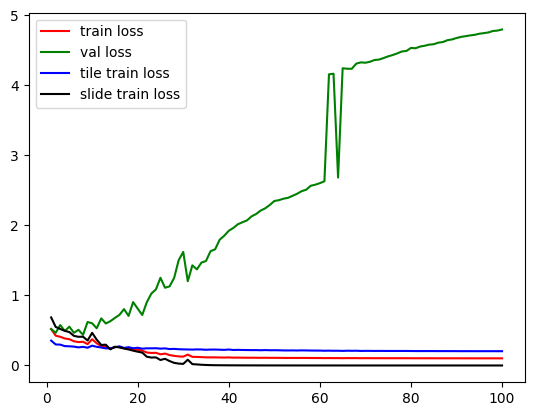

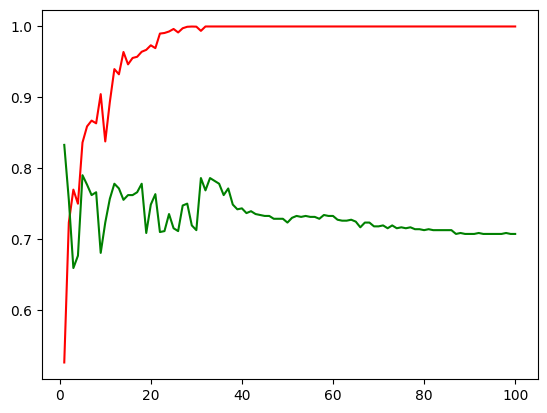

MixedMILModel(
  (reduction): Sequential(
    (0): Dropout(p=0, inplace=False)
    (1): Linear(in_features=2048, out_features=1024, bias=True)
    (2): ReLU()
  )
  (attention): AttentionLayer(
    (U): Linear(in_features=1024, out_features=512, bias=False)
    (V): Linear(in_features=1024, out_features=512, bias=False)
    (W): Linear(in_features=512, out_features=1, bias=False)
  )
  (slide_clf): Sequential(
    (0): Dropout(p=0, inplace=False)
    (1): Linear(in_features=1024, out_features=256, bias=True)
    (2): ReLU()
    (3): Dropout(p=0, inplace=False)
    (4): Linear(in_features=256, out_features=1, bias=True)
    (5): Sigmoid()
  )
  (tiles_clf): Sequential(
    (0): Dropout(p=0, inplace=False)
    (1): Linear(in_features=1024, out_features=1, bias=True)
    (2): Sigmoid()
  )
)


100%|██████████| 56/56 [00:01<00:00, 38.89it/s]


Epoch 1: train loss 0.612 train auc 0.479 tiles auc 0.585 val loss 0.677 val auc 0.738


100%|██████████| 56/56 [00:01<00:00, 43.37it/s]


Epoch 2: train loss 0.499 train auc 0.625 tiles auc 0.844 val loss 0.475 val auc 0.819


100%|██████████| 56/56 [00:01<00:00, 44.04it/s]


Epoch 3: train loss 0.406 train auc 0.774 tiles auc 0.877 val loss 0.472 val auc 0.862


100%|██████████| 56/56 [00:01<00:00, 43.84it/s]


Epoch 4: train loss 0.358 train auc 0.844 tiles auc 0.895 val loss 0.393 val auc 0.910


100%|██████████| 56/56 [00:01<00:00, 44.21it/s]


Epoch 5: train loss 0.347 train auc 0.847 tiles auc 0.892 val loss 0.388 val auc 0.889


100%|██████████| 56/56 [00:01<00:00, 41.01it/s]


Epoch 6: train loss 0.320 train auc 0.895 tiles auc 0.906 val loss 0.394 val auc 0.895


100%|██████████| 56/56 [00:01<00:00, 43.65it/s]


Epoch 7: train loss 0.287 train auc 0.913 tiles auc 0.901 val loss 0.519 val auc 0.885


100%|██████████| 56/56 [00:01<00:00, 42.96it/s]


Epoch 8: train loss 0.298 train auc 0.910 tiles auc 0.897 val loss 0.435 val auc 0.891


100%|██████████| 56/56 [00:01<00:00, 38.86it/s]


Epoch 9: train loss 0.265 train auc 0.943 tiles auc 0.901 val loss 0.680 val auc 0.845


100%|██████████| 56/56 [00:01<00:00, 43.20it/s]


Epoch 10: train loss 0.265 train auc 0.942 tiles auc 0.901 val loss 0.473 val auc 0.876


100%|██████████| 56/56 [00:01<00:00, 43.68it/s]


Epoch 11: train loss 0.213 train auc 0.971 tiles auc 0.905 val loss 0.679 val auc 0.863


100%|██████████| 56/56 [00:01<00:00, 37.61it/s]


Epoch 12: train loss 0.206 train auc 0.973 tiles auc 0.909 val loss 0.594 val auc 0.876


100%|██████████| 56/56 [00:01<00:00, 43.50it/s]


Epoch 13: train loss 0.179 train auc 0.980 tiles auc 0.913 val loss 0.595 val auc 0.881


100%|██████████| 56/56 [00:01<00:00, 43.83it/s]


Epoch 14: train loss 0.170 train auc 0.980 tiles auc 0.909 val loss 0.629 val auc 0.883


100%|██████████| 56/56 [00:01<00:00, 43.45it/s]


Epoch 15: train loss 0.162 train auc 0.988 tiles auc 0.913 val loss 0.733 val auc 0.870


100%|██████████| 56/56 [00:01<00:00, 42.01it/s]


Epoch 16: train loss 0.178 train auc 0.979 tiles auc 0.916 val loss 0.625 val auc 0.874


100%|██████████| 56/56 [00:01<00:00, 40.40it/s]


Epoch 17: train loss 0.184 train auc 0.990 tiles auc 0.908 val loss 0.747 val auc 0.870


100%|██████████| 56/56 [00:01<00:00, 43.39it/s]


Epoch 18: train loss 0.157 train auc 0.995 tiles auc 0.911 val loss 0.760 val auc 0.870


100%|██████████| 56/56 [00:01<00:00, 43.42it/s]


Epoch 19: train loss 0.148 train auc 0.998 tiles auc 0.912 val loss 0.779 val auc 0.884


100%|██████████| 56/56 [00:01<00:00, 39.33it/s]


Epoch 20: train loss 0.180 train auc 0.995 tiles auc 0.902 val loss 0.686 val auc 0.843


100%|██████████| 56/56 [00:01<00:00, 41.93it/s]


Epoch 21: train loss 0.173 train auc 0.995 tiles auc 0.891 val loss 0.710 val auc 0.866


100%|██████████| 56/56 [00:01<00:00, 43.46it/s]


Epoch 22: train loss 0.161 train auc 0.998 tiles auc 0.896 val loss 0.789 val auc 0.860


100%|██████████| 56/56 [00:01<00:00, 38.43it/s]


Epoch 23: train loss 0.160 train auc 0.999 tiles auc 0.890 val loss 0.775 val auc 0.864


100%|██████████| 56/56 [00:01<00:00, 43.80it/s]


Epoch 24: train loss 0.158 train auc 1.000 tiles auc 0.890 val loss 0.863 val auc 0.870


100%|██████████| 56/56 [00:01<00:00, 43.96it/s]


Epoch 25: train loss 0.178 train auc 0.990 tiles auc 0.866 val loss 0.895 val auc 0.877


100%|██████████| 56/56 [00:01<00:00, 40.33it/s]


Epoch 26: train loss 0.171 train auc 0.991 tiles auc 0.900 val loss 0.880 val auc 0.834


100%|██████████| 56/56 [00:01<00:00, 44.11it/s]


Epoch 27: train loss 0.141 train auc 1.000 tiles auc 0.915 val loss 0.899 val auc 0.842


100%|██████████| 56/56 [00:01<00:00, 43.81it/s]


Epoch 28: train loss 0.137 train auc 1.000 tiles auc 0.913 val loss 0.978 val auc 0.846


100%|██████████| 56/56 [00:01<00:00, 43.14it/s]


Epoch 29: train loss 0.132 train auc 1.000 tiles auc 0.918 val loss 1.039 val auc 0.866


100%|██████████| 56/56 [00:01<00:00, 43.59it/s]


Epoch 30: train loss 0.131 train auc 1.000 tiles auc 0.914 val loss 1.060 val auc 0.868


100%|██████████| 56/56 [00:01<00:00, 40.57it/s]


Epoch 31: train loss 0.128 train auc 1.000 tiles auc 0.918 val loss 1.109 val auc 0.856


100%|██████████| 56/56 [00:01<00:00, 43.94it/s]


Epoch 32: train loss 0.127 train auc 1.000 tiles auc 0.917 val loss 1.133 val auc 0.860


100%|██████████| 56/56 [00:01<00:00, 43.49it/s]


Epoch 33: train loss 0.127 train auc 1.000 tiles auc 0.916 val loss 1.160 val auc 0.871


100%|██████████| 56/56 [00:01<00:00, 38.51it/s]


Epoch 34: train loss 0.123 train auc 1.000 tiles auc 0.923 val loss 1.194 val auc 0.874


100%|██████████| 56/56 [00:01<00:00, 43.70it/s]


Epoch 35: train loss 0.123 train auc 1.000 tiles auc 0.921 val loss 1.194 val auc 0.874


100%|██████████| 56/56 [00:01<00:00, 43.86it/s]


Epoch 36: train loss 0.124 train auc 1.000 tiles auc 0.919 val loss 1.222 val auc 0.879


100%|██████████| 56/56 [00:01<00:00, 39.76it/s]


Epoch 37: train loss 0.125 train auc 1.000 tiles auc 0.917 val loss 1.260 val auc 0.885


100%|██████████| 56/56 [00:01<00:00, 43.68it/s]


Epoch 38: train loss 0.123 train auc 1.000 tiles auc 0.920 val loss 1.301 val auc 0.887


100%|██████████| 56/56 [00:01<00:00, 43.25it/s]


Epoch 39: train loss 0.123 train auc 1.000 tiles auc 0.919 val loss 1.318 val auc 0.887


100%|██████████| 56/56 [00:01<00:00, 43.28it/s]


Epoch 40: train loss 0.122 train auc 1.000 tiles auc 0.920 val loss 1.363 val auc 0.887


100%|██████████| 56/56 [00:01<00:00, 43.09it/s]


Epoch 41: train loss 0.120 train auc 1.000 tiles auc 0.923 val loss 1.374 val auc 0.888


100%|██████████| 56/56 [00:01<00:00, 41.30it/s]


Epoch 42: train loss 0.119 train auc 1.000 tiles auc 0.924 val loss 1.389 val auc 0.888


100%|██████████| 56/56 [00:01<00:00, 43.27it/s]


Epoch 43: train loss 0.119 train auc 1.000 tiles auc 0.924 val loss 1.419 val auc 0.888


100%|██████████| 56/56 [00:01<00:00, 44.40it/s]


Epoch 44: train loss 0.119 train auc 1.000 tiles auc 0.925 val loss 1.423 val auc 0.885


100%|██████████| 56/56 [00:01<00:00, 38.54it/s]


Epoch 45: train loss 0.119 train auc 1.000 tiles auc 0.924 val loss 1.450 val auc 0.885


100%|██████████| 56/56 [00:01<00:00, 43.32it/s]


Epoch 46: train loss 0.119 train auc 1.000 tiles auc 0.924 val loss 1.459 val auc 0.883


100%|██████████| 56/56 [00:01<00:00, 44.38it/s]


Epoch 47: train loss 0.118 train auc 1.000 tiles auc 0.924 val loss 1.476 val auc 0.885


100%|██████████| 56/56 [00:01<00:00, 39.20it/s]


Epoch 48: train loss 0.118 train auc 1.000 tiles auc 0.925 val loss 1.489 val auc 0.884


100%|██████████| 56/56 [00:01<00:00, 43.85it/s]


Epoch 49: train loss 0.116 train auc 1.000 tiles auc 0.930 val loss 1.468 val auc 0.887


100%|██████████| 56/56 [00:01<00:00, 43.40it/s]


Epoch 50: train loss 0.118 train auc 1.000 tiles auc 0.925 val loss 1.520 val auc 0.879


100%|██████████| 56/56 [00:01<00:00, 42.58it/s]


Epoch 51: train loss 0.117 train auc 1.000 tiles auc 0.927 val loss 1.539 val auc 0.880


100%|██████████| 56/56 [00:01<00:00, 43.04it/s]


Epoch 52: train loss 0.116 train auc 1.000 tiles auc 0.927 val loss 1.537 val auc 0.880


100%|██████████| 56/56 [00:01<00:00, 40.54it/s]


Epoch 53: train loss 0.116 train auc 1.000 tiles auc 0.927 val loss 1.546 val auc 0.881


100%|██████████| 56/56 [00:01<00:00, 44.38it/s]


Epoch 54: train loss 0.116 train auc 1.000 tiles auc 0.927 val loss 1.549 val auc 0.879


100%|██████████| 56/56 [00:01<00:00, 41.71it/s]


Epoch 55: train loss 0.116 train auc 1.000 tiles auc 0.927 val loss 1.559 val auc 0.884


100%|██████████| 56/56 [00:01<00:00, 37.83it/s]


Epoch 56: train loss 0.115 train auc 1.000 tiles auc 0.928 val loss 1.556 val auc 0.887


100%|██████████| 56/56 [00:01<00:00, 44.16it/s]


Epoch 57: train loss 0.115 train auc 1.000 tiles auc 0.928 val loss 1.575 val auc 0.885


100%|██████████| 56/56 [00:01<00:00, 43.92it/s]


Epoch 58: train loss 0.115 train auc 1.000 tiles auc 0.928 val loss 1.567 val auc 0.887


100%|██████████| 56/56 [00:01<00:00, 37.80it/s]


Epoch 59: train loss 0.115 train auc 1.000 tiles auc 0.928 val loss 1.576 val auc 0.885


100%|██████████| 56/56 [00:01<00:00, 43.38it/s]


Epoch 60: train loss 0.115 train auc 1.000 tiles auc 0.928 val loss 1.593 val auc 0.884


100%|██████████| 56/56 [00:01<00:00, 43.45it/s]


Epoch 61: train loss 0.114 train auc 1.000 tiles auc 0.930 val loss 1.591 val auc 0.888


100%|██████████| 56/56 [00:01<00:00, 42.27it/s]


Epoch 62: train loss 0.114 train auc 1.000 tiles auc 0.930 val loss 1.601 val auc 0.888


100%|██████████| 56/56 [00:01<00:00, 43.93it/s]


Epoch 63: train loss 0.114 train auc 1.000 tiles auc 0.930 val loss 1.608 val auc 0.888


100%|██████████| 56/56 [00:01<00:00, 42.34it/s]


Epoch 64: train loss 0.114 train auc 1.000 tiles auc 0.930 val loss 1.622 val auc 0.887


100%|██████████| 56/56 [00:01<00:00, 43.48it/s]


Epoch 65: train loss 0.114 train auc 1.000 tiles auc 0.930 val loss 1.621 val auc 0.888


100%|██████████| 56/56 [00:01<00:00, 42.89it/s]


Epoch 66: train loss 0.114 train auc 1.000 tiles auc 0.930 val loss 1.622 val auc 0.885


100%|██████████| 56/56 [00:01<00:00, 39.70it/s]


Epoch 67: train loss 0.114 train auc 1.000 tiles auc 0.930 val loss 1.636 val auc 0.888


100%|██████████| 56/56 [00:01<00:00, 44.13it/s]


Epoch 68: train loss 0.114 train auc 1.000 tiles auc 0.930 val loss 1.647 val auc 0.888


100%|██████████| 56/56 [00:01<00:00, 43.98it/s]


Epoch 69: train loss 0.114 train auc 1.000 tiles auc 0.930 val loss 1.666 val auc 0.888


100%|██████████| 56/56 [00:01<00:00, 39.61it/s]


Epoch 70: train loss 0.113 train auc 1.000 tiles auc 0.931 val loss 1.651 val auc 0.887


100%|██████████| 56/56 [00:01<00:00, 42.94it/s]


Epoch 71: train loss 0.113 train auc 1.000 tiles auc 0.931 val loss 1.665 val auc 0.885


100%|██████████| 56/56 [00:01<00:00, 43.31it/s]


Epoch 72: train loss 0.113 train auc 1.000 tiles auc 0.932 val loss 1.695 val auc 0.888


100%|██████████| 56/56 [00:01<00:00, 41.98it/s]


Epoch 73: train loss 0.113 train auc 1.000 tiles auc 0.931 val loss 1.695 val auc 0.888


100%|██████████| 56/56 [00:01<00:00, 43.38it/s]


Epoch 74: train loss 0.113 train auc 1.000 tiles auc 0.932 val loss 1.683 val auc 0.889


100%|██████████| 56/56 [00:01<00:00, 43.54it/s]


Epoch 75: train loss 0.113 train auc 1.000 tiles auc 0.931 val loss 1.691 val auc 0.889


100%|██████████| 56/56 [00:01<00:00, 43.28it/s]


Epoch 76: train loss 0.113 train auc 1.000 tiles auc 0.931 val loss 1.690 val auc 0.889


100%|██████████| 56/56 [00:01<00:00, 43.67it/s]


Epoch 77: train loss 0.113 train auc 1.000 tiles auc 0.931 val loss 1.705 val auc 0.888


100%|██████████| 56/56 [00:01<00:00, 40.68it/s]


Epoch 78: train loss 0.112 train auc 1.000 tiles auc 0.932 val loss 1.715 val auc 0.885


100%|██████████| 56/56 [00:01<00:00, 43.37it/s]


Epoch 79: train loss 0.112 train auc 1.000 tiles auc 0.932 val loss 1.736 val auc 0.888


100%|██████████| 56/56 [00:01<00:00, 43.61it/s]


Epoch 80: train loss 0.112 train auc 1.000 tiles auc 0.932 val loss 1.740 val auc 0.887


100%|██████████| 56/56 [00:01<00:00, 37.17it/s]


Epoch 81: train loss 0.112 train auc 1.000 tiles auc 0.932 val loss 1.746 val auc 0.888


100%|██████████| 56/56 [00:01<00:00, 43.97it/s]


Epoch 82: train loss 0.112 train auc 1.000 tiles auc 0.932 val loss 1.754 val auc 0.889


100%|██████████| 56/56 [00:01<00:00, 44.36it/s]


Epoch 83: train loss 0.112 train auc 1.000 tiles auc 0.933 val loss 1.754 val auc 0.888


100%|██████████| 56/56 [00:01<00:00, 40.45it/s]


Epoch 84: train loss 0.112 train auc 1.000 tiles auc 0.933 val loss 1.757 val auc 0.887


100%|██████████| 56/56 [00:01<00:00, 43.69it/s]


Epoch 85: train loss 0.112 train auc 1.000 tiles auc 0.932 val loss 1.758 val auc 0.887


100%|██████████| 56/56 [00:01<00:00, 43.09it/s]


Epoch 86: train loss 0.112 train auc 1.000 tiles auc 0.933 val loss 1.774 val auc 0.889


100%|██████████| 56/56 [00:01<00:00, 44.23it/s]


Epoch 87: train loss 0.112 train auc 1.000 tiles auc 0.932 val loss 1.779 val auc 0.889


100%|██████████| 56/56 [00:01<00:00, 44.04it/s]


Epoch 88: train loss 0.112 train auc 1.000 tiles auc 0.933 val loss 1.785 val auc 0.888


100%|██████████| 56/56 [00:01<00:00, 40.59it/s]


Epoch 89: train loss 0.112 train auc 1.000 tiles auc 0.933 val loss 1.796 val auc 0.889


100%|██████████| 56/56 [00:01<00:00, 43.86it/s]


Epoch 90: train loss 0.112 train auc 1.000 tiles auc 0.933 val loss 1.799 val auc 0.889


100%|██████████| 56/56 [00:01<00:00, 43.57it/s]


Epoch 91: train loss 0.112 train auc 1.000 tiles auc 0.933 val loss 1.801 val auc 0.888


100%|██████████| 56/56 [00:01<00:00, 38.17it/s]


Epoch 92: train loss 0.111 train auc 1.000 tiles auc 0.933 val loss 1.807 val auc 0.888


100%|██████████| 56/56 [00:01<00:00, 43.26it/s]


Epoch 93: train loss 0.111 train auc 1.000 tiles auc 0.933 val loss 1.811 val auc 0.888


100%|██████████| 56/56 [00:01<00:00, 42.36it/s]


Epoch 94: train loss 0.112 train auc 1.000 tiles auc 0.933 val loss 1.814 val auc 0.889


100%|██████████| 56/56 [00:01<00:00, 38.70it/s]


Epoch 95: train loss 0.111 train auc 1.000 tiles auc 0.933 val loss 1.824 val auc 0.889


100%|██████████| 56/56 [00:01<00:00, 43.55it/s]


Epoch 96: train loss 0.111 train auc 1.000 tiles auc 0.933 val loss 1.824 val auc 0.889


100%|██████████| 56/56 [00:01<00:00, 43.45it/s]


Epoch 97: train loss 0.111 train auc 1.000 tiles auc 0.933 val loss 1.834 val auc 0.889


100%|██████████| 56/56 [00:01<00:00, 40.83it/s]


Epoch 98: train loss 0.111 train auc 1.000 tiles auc 0.933 val loss 1.837 val auc 0.891


100%|██████████| 56/56 [00:01<00:00, 44.05it/s]


Epoch 99: train loss 0.111 train auc 1.000 tiles auc 0.933 val loss 1.837 val auc 0.889


100%|██████████| 56/56 [00:01<00:00, 43.75it/s]


Epoch 100: train loss 0.111 train auc 1.000 tiles auc 0.933 val loss 1.843 val auc 0.891
Best auc: 0.910, last auc: 0.891, best epoch: 4


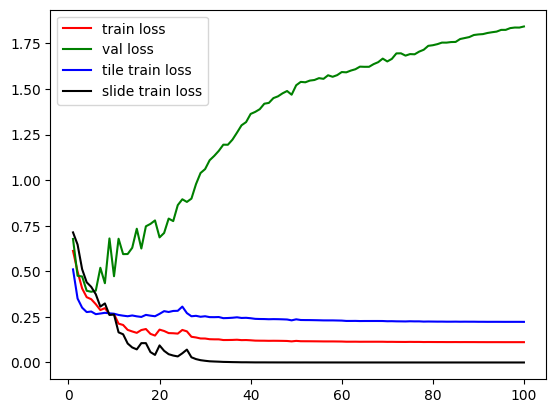

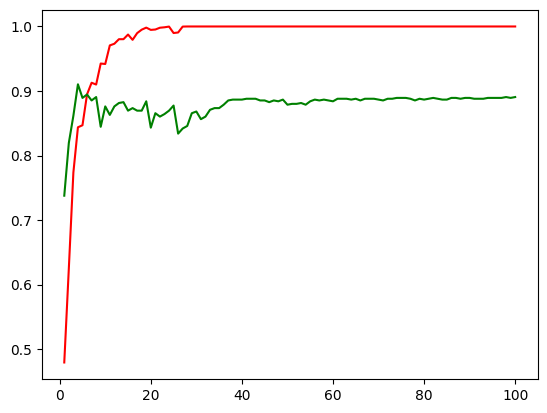

MixedMILModel(
  (reduction): Sequential(
    (0): Dropout(p=0, inplace=False)
    (1): Linear(in_features=2048, out_features=1024, bias=True)
    (2): ReLU()
  )
  (attention): AttentionLayer(
    (U): Linear(in_features=1024, out_features=512, bias=False)
    (V): Linear(in_features=1024, out_features=512, bias=False)
    (W): Linear(in_features=512, out_features=1, bias=False)
  )
  (slide_clf): Sequential(
    (0): Dropout(p=0, inplace=False)
    (1): Linear(in_features=1024, out_features=256, bias=True)
    (2): ReLU()
    (3): Dropout(p=0, inplace=False)
    (4): Linear(in_features=256, out_features=1, bias=True)
    (5): Sigmoid()
  )
  (tiles_clf): Sequential(
    (0): Dropout(p=0, inplace=False)
    (1): Linear(in_features=1024, out_features=1, bias=True)
    (2): Sigmoid()
  )
)


100%|██████████| 56/56 [00:01<00:00, 42.29it/s]


Epoch 1: train loss 0.610 train auc 0.544 tiles auc 0.550 val loss 0.673 val auc 0.634


100%|██████████| 56/56 [00:01<00:00, 41.87it/s]


Epoch 2: train loss 0.503 train auc 0.494 tiles auc 0.827 val loss 0.663 val auc 0.669


100%|██████████| 56/56 [00:01<00:00, 39.21it/s]


Epoch 3: train loss 0.492 train auc 0.587 tiles auc 0.860 val loss 0.671 val auc 0.808


100%|██████████| 56/56 [00:01<00:00, 42.66it/s]


Epoch 4: train loss 0.456 train auc 0.685 tiles auc 0.877 val loss 0.536 val auc 0.856


100%|██████████| 56/56 [00:01<00:00, 41.93it/s]


Epoch 5: train loss 0.378 train auc 0.775 tiles auc 0.901 val loss 0.442 val auc 0.899


100%|██████████| 56/56 [00:01<00:00, 37.95it/s]


Epoch 6: train loss 0.346 train auc 0.834 tiles auc 0.903 val loss 0.442 val auc 0.867


100%|██████████| 56/56 [00:01<00:00, 41.58it/s]


Epoch 7: train loss 0.350 train auc 0.841 tiles auc 0.908 val loss 0.424 val auc 0.893


100%|██████████| 56/56 [00:01<00:00, 42.13it/s]


Epoch 8: train loss 0.329 train auc 0.857 tiles auc 0.905 val loss 0.397 val auc 0.872


100%|██████████| 56/56 [00:01<00:00, 37.50it/s]


Epoch 9: train loss 0.346 train auc 0.874 tiles auc 0.901 val loss 0.485 val auc 0.816


100%|██████████| 56/56 [00:01<00:00, 42.52it/s]


Epoch 10: train loss 0.325 train auc 0.871 tiles auc 0.920 val loss 0.447 val auc 0.834


100%|██████████| 56/56 [00:01<00:00, 42.43it/s]


Epoch 11: train loss 0.302 train auc 0.892 tiles auc 0.909 val loss 0.505 val auc 0.841


100%|██████████| 56/56 [00:01<00:00, 40.00it/s]


Epoch 12: train loss 0.270 train auc 0.919 tiles auc 0.918 val loss 0.507 val auc 0.814


100%|██████████| 56/56 [00:01<00:00, 42.03it/s]


Epoch 13: train loss 0.273 train auc 0.919 tiles auc 0.918 val loss 0.549 val auc 0.819


100%|██████████| 56/56 [00:01<00:00, 42.40it/s]


Epoch 14: train loss 0.258 train auc 0.936 tiles auc 0.919 val loss 0.710 val auc 0.825


100%|██████████| 56/56 [00:01<00:00, 42.27it/s]


Epoch 15: train loss 0.261 train auc 0.938 tiles auc 0.917 val loss 0.620 val auc 0.814


100%|██████████| 56/56 [00:01<00:00, 41.68it/s]


Epoch 16: train loss 0.232 train auc 0.953 tiles auc 0.919 val loss 0.618 val auc 0.837


100%|██████████| 56/56 [00:01<00:00, 38.98it/s]


Epoch 17: train loss 0.205 train auc 0.972 tiles auc 0.922 val loss 0.613 val auc 0.837


100%|██████████| 56/56 [00:01<00:00, 42.10it/s]


Epoch 18: train loss 0.209 train auc 0.974 tiles auc 0.921 val loss 0.661 val auc 0.862


100%|██████████| 56/56 [00:01<00:00, 41.44it/s]


Epoch 19: train loss 0.203 train auc 0.968 tiles auc 0.920 val loss 0.703 val auc 0.847


100%|██████████| 56/56 [00:01<00:00, 38.10it/s]


Epoch 20: train loss 0.199 train auc 0.984 tiles auc 0.922 val loss 0.891 val auc 0.842


100%|██████████| 56/56 [00:01<00:00, 41.83it/s]


Epoch 21: train loss 0.213 train auc 0.978 tiles auc 0.920 val loss 0.640 val auc 0.829


100%|██████████| 56/56 [00:01<00:00, 42.64it/s]


Epoch 22: train loss 0.188 train auc 0.988 tiles auc 0.924 val loss 0.731 val auc 0.845


100%|██████████| 56/56 [00:01<00:00, 37.52it/s]


Epoch 23: train loss 0.181 train auc 0.989 tiles auc 0.920 val loss 0.643 val auc 0.855


100%|██████████| 56/56 [00:01<00:00, 41.73it/s]


Epoch 24: train loss 0.168 train auc 0.995 tiles auc 0.924 val loss 0.846 val auc 0.834


100%|██████████| 56/56 [00:01<00:00, 41.32it/s]


Epoch 25: train loss 0.160 train auc 0.996 tiles auc 0.925 val loss 0.808 val auc 0.839


100%|██████████| 56/56 [00:01<00:00, 40.58it/s]


Epoch 26: train loss 0.156 train auc 0.997 tiles auc 0.924 val loss 0.707 val auc 0.848


100%|██████████| 56/56 [00:01<00:00, 40.92it/s]


Epoch 27: train loss 0.148 train auc 0.999 tiles auc 0.924 val loss 0.759 val auc 0.859


100%|██████████| 56/56 [00:01<00:00, 42.12it/s]


Epoch 28: train loss 0.145 train auc 0.999 tiles auc 0.921 val loss 0.776 val auc 0.852


100%|██████████| 56/56 [00:01<00:00, 41.35it/s]


Epoch 29: train loss 0.141 train auc 0.999 tiles auc 0.922 val loss 0.921 val auc 0.843


100%|██████████| 56/56 [00:01<00:00, 40.94it/s]


Epoch 30: train loss 0.136 train auc 1.000 tiles auc 0.919 val loss 1.018 val auc 0.859


100%|██████████| 56/56 [00:01<00:00, 39.25it/s]


Epoch 31: train loss 0.161 train auc 0.998 tiles auc 0.916 val loss 1.001 val auc 0.846


100%|██████████| 56/56 [00:01<00:00, 42.18it/s]


Epoch 32: train loss 0.136 train auc 1.000 tiles auc 0.921 val loss 1.070 val auc 0.852


100%|██████████| 56/56 [00:01<00:00, 43.11it/s]


Epoch 33: train loss 0.128 train auc 1.000 tiles auc 0.923 val loss 1.085 val auc 0.854


100%|██████████| 56/56 [00:01<00:00, 38.66it/s]


Epoch 34: train loss 0.127 train auc 1.000 tiles auc 0.921 val loss 1.126 val auc 0.858


100%|██████████| 56/56 [00:01<00:00, 42.34it/s]


Epoch 35: train loss 0.152 train auc 0.995 tiles auc 0.921 val loss 1.021 val auc 0.852


100%|██████████| 56/56 [00:01<00:00, 42.13it/s]


Epoch 36: train loss 0.183 train auc 0.993 tiles auc 0.927 val loss 0.821 val auc 0.870


100%|██████████| 56/56 [00:01<00:00, 36.29it/s]


Epoch 37: train loss 0.131 train auc 1.000 tiles auc 0.927 val loss 0.829 val auc 0.872


100%|██████████| 56/56 [00:01<00:00, 41.94it/s]


Epoch 38: train loss 0.126 train auc 1.000 tiles auc 0.926 val loss 0.898 val auc 0.871


100%|██████████| 56/56 [00:01<00:00, 42.23it/s]


Epoch 39: train loss 0.123 train auc 1.000 tiles auc 0.928 val loss 0.911 val auc 0.870


100%|██████████| 56/56 [00:01<00:00, 37.08it/s]


Epoch 40: train loss 0.122 train auc 1.000 tiles auc 0.927 val loss 0.999 val auc 0.864


100%|██████████| 56/56 [00:01<00:00, 40.96it/s]


Epoch 41: train loss 0.120 train auc 1.000 tiles auc 0.928 val loss 0.966 val auc 0.866


100%|██████████| 56/56 [00:01<00:00, 41.53it/s]


Epoch 42: train loss 0.120 train auc 1.000 tiles auc 0.928 val loss 0.998 val auc 0.863


100%|██████████| 56/56 [00:01<00:00, 37.45it/s]


Epoch 43: train loss 0.120 train auc 1.000 tiles auc 0.928 val loss 1.045 val auc 0.860


100%|██████████| 56/56 [00:01<00:00, 40.52it/s]


Epoch 44: train loss 0.119 train auc 1.000 tiles auc 0.928 val loss 1.036 val auc 0.863


100%|██████████| 56/56 [00:01<00:00, 40.03it/s]


Epoch 45: train loss 0.119 train auc 1.000 tiles auc 0.928 val loss 1.063 val auc 0.862


100%|██████████| 56/56 [00:01<00:00, 38.31it/s]


Epoch 46: train loss 0.118 train auc 1.000 tiles auc 0.929 val loss 1.114 val auc 0.859


100%|██████████| 56/56 [00:01<00:00, 39.97it/s]


Epoch 47: train loss 0.119 train auc 1.000 tiles auc 0.928 val loss 1.112 val auc 0.859


100%|██████████| 56/56 [00:01<00:00, 40.09it/s]


Epoch 48: train loss 0.116 train auc 1.000 tiles auc 0.932 val loss 1.109 val auc 0.864


100%|██████████| 56/56 [00:01<00:00, 38.59it/s]


Epoch 49: train loss 0.118 train auc 1.000 tiles auc 0.928 val loss 1.164 val auc 0.860


100%|██████████| 56/56 [00:01<00:00, 40.48it/s]


Epoch 50: train loss 0.117 train auc 1.000 tiles auc 0.929 val loss 1.191 val auc 0.859


100%|██████████| 56/56 [00:01<00:00, 40.46it/s]


Epoch 51: train loss 0.116 train auc 1.000 tiles auc 0.930 val loss 1.201 val auc 0.858


100%|██████████| 56/56 [00:01<00:00, 38.82it/s]


Epoch 52: train loss 0.116 train auc 1.000 tiles auc 0.931 val loss 1.220 val auc 0.856


100%|██████████| 56/56 [00:01<00:00, 40.54it/s]


Epoch 53: train loss 0.116 train auc 1.000 tiles auc 0.931 val loss 1.241 val auc 0.856


100%|██████████| 56/56 [00:01<00:00, 40.26it/s]


Epoch 54: train loss 0.116 train auc 1.000 tiles auc 0.930 val loss 1.262 val auc 0.854


100%|██████████| 56/56 [00:01<00:00, 39.81it/s]


Epoch 55: train loss 0.115 train auc 1.000 tiles auc 0.932 val loss 1.270 val auc 0.855


100%|██████████| 56/56 [00:01<00:00, 40.38it/s]


Epoch 56: train loss 0.115 train auc 1.000 tiles auc 0.931 val loss 1.300 val auc 0.854


100%|██████████| 56/56 [00:01<00:00, 41.53it/s]


Epoch 57: train loss 0.115 train auc 1.000 tiles auc 0.931 val loss 1.306 val auc 0.852


100%|██████████| 56/56 [00:01<00:00, 41.21it/s]


Epoch 58: train loss 0.115 train auc 1.000 tiles auc 0.931 val loss 1.334 val auc 0.852


100%|██████████| 56/56 [00:01<00:00, 40.33it/s]


Epoch 59: train loss 0.115 train auc 1.000 tiles auc 0.932 val loss 1.334 val auc 0.850


100%|██████████| 56/56 [00:01<00:00, 39.26it/s]


Epoch 60: train loss 0.115 train auc 1.000 tiles auc 0.931 val loss 1.354 val auc 0.851


100%|██████████| 56/56 [00:01<00:00, 40.18it/s]


Epoch 61: train loss 0.114 train auc 1.000 tiles auc 0.932 val loss 1.360 val auc 0.851


100%|██████████| 56/56 [00:01<00:00, 39.93it/s]


Epoch 62: train loss 0.114 train auc 1.000 tiles auc 0.933 val loss 1.375 val auc 0.851


100%|██████████| 56/56 [00:01<00:00, 39.79it/s]


Epoch 63: train loss 0.114 train auc 1.000 tiles auc 0.933 val loss 1.391 val auc 0.850


100%|██████████| 56/56 [00:01<00:00, 42.69it/s]


Epoch 64: train loss 0.114 train auc 1.000 tiles auc 0.933 val loss 1.395 val auc 0.851


100%|██████████| 56/56 [00:01<00:00, 41.71it/s]


Epoch 65: train loss 0.113 train auc 1.000 tiles auc 0.935 val loss 1.391 val auc 0.850


100%|██████████| 56/56 [00:01<00:00, 37.42it/s]


Epoch 66: train loss 0.113 train auc 1.000 tiles auc 0.933 val loss 1.404 val auc 0.850


100%|██████████| 56/56 [00:01<00:00, 40.74it/s]


Epoch 67: train loss 0.113 train auc 1.000 tiles auc 0.933 val loss 1.431 val auc 0.847


100%|██████████| 56/56 [00:01<00:00, 39.86it/s]


Epoch 68: train loss 0.113 train auc 1.000 tiles auc 0.935 val loss 1.420 val auc 0.850


100%|██████████| 56/56 [00:01<00:00, 37.81it/s]


Epoch 69: train loss 0.113 train auc 1.000 tiles auc 0.934 val loss 1.457 val auc 0.846


100%|██████████| 56/56 [00:01<00:00, 42.14it/s]


Epoch 70: train loss 0.113 train auc 1.000 tiles auc 0.933 val loss 1.470 val auc 0.846


100%|██████████| 56/56 [00:01<00:00, 42.22it/s]


Epoch 71: train loss 0.112 train auc 1.000 tiles auc 0.936 val loss 1.460 val auc 0.847


100%|██████████| 56/56 [00:01<00:00, 37.33it/s]


Epoch 72: train loss 0.112 train auc 1.000 tiles auc 0.935 val loss 1.462 val auc 0.851


100%|██████████| 56/56 [00:01<00:00, 41.84it/s]


Epoch 73: train loss 0.112 train auc 1.000 tiles auc 0.934 val loss 1.481 val auc 0.848


100%|██████████| 56/56 [00:01<00:00, 42.02it/s]


Epoch 74: train loss 0.112 train auc 1.000 tiles auc 0.934 val loss 1.488 val auc 0.850


100%|██████████| 56/56 [00:01<00:00, 42.43it/s]


Epoch 75: train loss 0.112 train auc 1.000 tiles auc 0.935 val loss 1.505 val auc 0.848


100%|██████████| 56/56 [00:01<00:00, 42.78it/s]


Epoch 76: train loss 0.112 train auc 1.000 tiles auc 0.935 val loss 1.503 val auc 0.850


100%|██████████| 56/56 [00:01<00:00, 40.12it/s]


Epoch 77: train loss 0.112 train auc 1.000 tiles auc 0.935 val loss 1.520 val auc 0.848


100%|██████████| 56/56 [00:01<00:00, 42.39it/s]


Epoch 78: train loss 0.112 train auc 1.000 tiles auc 0.935 val loss 1.525 val auc 0.850


100%|██████████| 56/56 [00:01<00:00, 41.99it/s]


Epoch 79: train loss 0.112 train auc 1.000 tiles auc 0.935 val loss 1.540 val auc 0.851


100%|██████████| 56/56 [00:01<00:00, 37.01it/s]


Epoch 80: train loss 0.111 train auc 1.000 tiles auc 0.936 val loss 1.561 val auc 0.851


100%|██████████| 56/56 [00:01<00:00, 41.72it/s]


Epoch 81: train loss 0.111 train auc 1.000 tiles auc 0.936 val loss 1.561 val auc 0.851


100%|██████████| 56/56 [00:01<00:00, 42.64it/s]


Epoch 82: train loss 0.111 train auc 1.000 tiles auc 0.936 val loss 1.570 val auc 0.851


100%|██████████| 56/56 [00:01<00:00, 37.36it/s]


Epoch 83: train loss 0.111 train auc 1.000 tiles auc 0.936 val loss 1.572 val auc 0.851


100%|██████████| 56/56 [00:01<00:00, 41.04it/s]


Epoch 84: train loss 0.111 train auc 1.000 tiles auc 0.936 val loss 1.578 val auc 0.851


100%|██████████| 56/56 [00:01<00:00, 42.12it/s]


Epoch 85: train loss 0.111 train auc 1.000 tiles auc 0.936 val loss 1.586 val auc 0.851


100%|██████████| 56/56 [00:01<00:00, 39.18it/s]


Epoch 86: train loss 0.111 train auc 1.000 tiles auc 0.936 val loss 1.589 val auc 0.851


100%|██████████| 56/56 [00:01<00:00, 41.45it/s]


Epoch 87: train loss 0.111 train auc 1.000 tiles auc 0.936 val loss 1.602 val auc 0.851


100%|██████████| 56/56 [00:01<00:00, 42.28it/s]


Epoch 88: train loss 0.111 train auc 1.000 tiles auc 0.936 val loss 1.604 val auc 0.851


100%|██████████| 56/56 [00:01<00:00, 41.47it/s]


Epoch 89: train loss 0.111 train auc 1.000 tiles auc 0.936 val loss 1.619 val auc 0.851


100%|██████████| 56/56 [00:01<00:00, 42.71it/s]


Epoch 90: train loss 0.111 train auc 1.000 tiles auc 0.936 val loss 1.628 val auc 0.851


100%|██████████| 56/56 [00:01<00:00, 40.69it/s]


Epoch 91: train loss 0.111 train auc 1.000 tiles auc 0.936 val loss 1.631 val auc 0.850


100%|██████████| 56/56 [00:01<00:00, 41.34it/s]


Epoch 92: train loss 0.111 train auc 1.000 tiles auc 0.937 val loss 1.636 val auc 0.848


100%|██████████| 56/56 [00:01<00:00, 41.96it/s]


Epoch 93: train loss 0.111 train auc 1.000 tiles auc 0.937 val loss 1.644 val auc 0.851


100%|██████████| 56/56 [00:01<00:00, 37.88it/s]


Epoch 94: train loss 0.111 train auc 1.000 tiles auc 0.937 val loss 1.648 val auc 0.850


100%|██████████| 56/56 [00:01<00:00, 41.79it/s]


Epoch 95: train loss 0.111 train auc 1.000 tiles auc 0.937 val loss 1.653 val auc 0.852


100%|██████████| 56/56 [00:01<00:00, 42.09it/s]


Epoch 96: train loss 0.111 train auc 1.000 tiles auc 0.937 val loss 1.658 val auc 0.852


100%|██████████| 56/56 [00:01<00:00, 37.10it/s]


Epoch 97: train loss 0.111 train auc 1.000 tiles auc 0.937 val loss 1.662 val auc 0.850


100%|██████████| 56/56 [00:01<00:00, 42.12it/s]


Epoch 98: train loss 0.111 train auc 1.000 tiles auc 0.937 val loss 1.669 val auc 0.851


100%|██████████| 56/56 [00:01<00:00, 42.08it/s]


Epoch 99: train loss 0.111 train auc 1.000 tiles auc 0.937 val loss 1.672 val auc 0.850


100%|██████████| 56/56 [00:01<00:00, 37.84it/s]


Epoch 100: train loss 0.110 train auc 1.000 tiles auc 0.937 val loss 1.681 val auc 0.851
Best auc: 0.899, last auc: 0.851, best epoch: 5


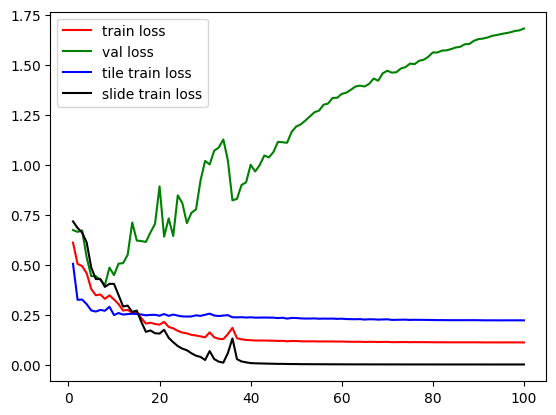

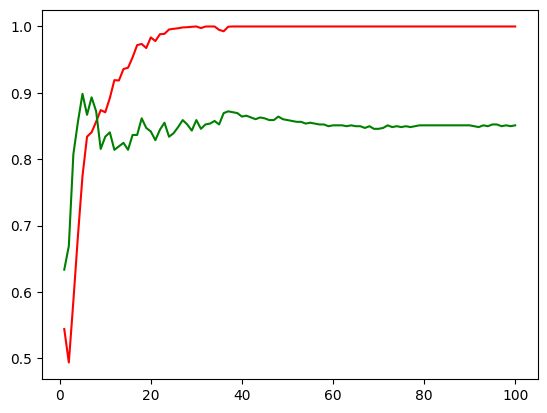

MixedMILModel(
  (reduction): Sequential(
    (0): Dropout(p=0, inplace=False)
    (1): Linear(in_features=2048, out_features=1024, bias=True)
    (2): ReLU()
  )
  (attention): AttentionLayer(
    (U): Linear(in_features=1024, out_features=512, bias=False)
    (V): Linear(in_features=1024, out_features=512, bias=False)
    (W): Linear(in_features=512, out_features=1, bias=False)
  )
  (slide_clf): Sequential(
    (0): Dropout(p=0, inplace=False)
    (1): Linear(in_features=1024, out_features=256, bias=True)
    (2): ReLU()
    (3): Dropout(p=0, inplace=False)
    (4): Linear(in_features=256, out_features=1, bias=True)
    (5): Sigmoid()
  )
  (tiles_clf): Sequential(
    (0): Dropout(p=0, inplace=False)
    (1): Linear(in_features=1024, out_features=1, bias=True)
    (2): Sigmoid()
  )
)


100%|██████████| 55/55 [00:01<00:00, 40.96it/s]


Epoch 1: train loss 0.546 train auc 0.535 tiles auc 0.789 val loss 0.682 val auc 0.579


100%|██████████| 55/55 [00:01<00:00, 43.08it/s]


Epoch 2: train loss 0.488 train auc 0.611 tiles auc 0.854 val loss 0.574 val auc 0.751


100%|██████████| 55/55 [00:01<00:00, 38.54it/s]


Epoch 3: train loss 0.427 train auc 0.745 tiles auc 0.863 val loss 0.624 val auc 0.738


100%|██████████| 55/55 [00:01<00:00, 42.76it/s]


Epoch 4: train loss 0.374 train auc 0.803 tiles auc 0.894 val loss 0.533 val auc 0.775


100%|██████████| 55/55 [00:01<00:00, 41.35it/s]


Epoch 5: train loss 0.348 train auc 0.835 tiles auc 0.897 val loss 0.488 val auc 0.822


100%|██████████| 55/55 [00:01<00:00, 40.96it/s]


Epoch 6: train loss 0.332 train auc 0.862 tiles auc 0.915 val loss 0.512 val auc 0.792


100%|██████████| 55/55 [00:01<00:00, 43.07it/s]


Epoch 7: train loss 0.326 train auc 0.874 tiles auc 0.913 val loss 0.588 val auc 0.778


100%|██████████| 55/55 [00:01<00:00, 42.67it/s]


Epoch 8: train loss 0.306 train auc 0.882 tiles auc 0.909 val loss 0.545 val auc 0.796


100%|██████████| 55/55 [00:01<00:00, 42.96it/s]


Epoch 9: train loss 0.292 train auc 0.920 tiles auc 0.919 val loss 0.522 val auc 0.839


100%|██████████| 55/55 [00:01<00:00, 41.79it/s]


Epoch 10: train loss 0.286 train auc 0.926 tiles auc 0.922 val loss 0.640 val auc 0.780


100%|██████████| 55/55 [00:01<00:00, 39.62it/s]


Epoch 11: train loss 0.243 train auc 0.952 tiles auc 0.926 val loss 0.581 val auc 0.817


100%|██████████| 55/55 [00:01<00:00, 42.20it/s]


Epoch 12: train loss 0.237 train auc 0.946 tiles auc 0.931 val loss 0.715 val auc 0.813


100%|██████████| 55/55 [00:01<00:00, 42.12it/s]


Epoch 13: train loss 0.197 train auc 0.978 tiles auc 0.932 val loss 0.717 val auc 0.799


100%|██████████| 55/55 [00:01<00:00, 37.61it/s]


Epoch 14: train loss 0.206 train auc 0.971 tiles auc 0.933 val loss 0.731 val auc 0.811


100%|██████████| 55/55 [00:01<00:00, 43.09it/s]


Epoch 15: train loss 0.184 train auc 0.985 tiles auc 0.928 val loss 0.714 val auc 0.817


100%|██████████| 55/55 [00:01<00:00, 43.28it/s]


Epoch 16: train loss 0.161 train auc 0.989 tiles auc 0.935 val loss 0.884 val auc 0.793


100%|██████████| 55/55 [00:01<00:00, 37.38it/s]


Epoch 17: train loss 0.157 train auc 0.994 tiles auc 0.936 val loss 0.953 val auc 0.802


100%|██████████| 55/55 [00:01<00:00, 42.16it/s]


Epoch 18: train loss 0.135 train auc 0.998 tiles auc 0.930 val loss 1.106 val auc 0.814


100%|██████████| 55/55 [00:01<00:00, 42.84it/s]


Epoch 19: train loss 0.129 train auc 0.999 tiles auc 0.930 val loss 1.184 val auc 0.821


100%|██████████| 55/55 [00:01<00:00, 39.89it/s]


Epoch 20: train loss 0.127 train auc 0.999 tiles auc 0.932 val loss 2.851 val auc 0.807


100%|██████████| 55/55 [00:01<00:00, 42.92it/s]


Epoch 21: train loss 0.128 train auc 0.999 tiles auc 0.938 val loss 1.661 val auc 0.770


100%|██████████| 55/55 [00:01<00:00, 42.99it/s]


Epoch 22: train loss 0.139 train auc 0.994 tiles auc 0.935 val loss 1.342 val auc 0.798


100%|██████████| 55/55 [00:01<00:00, 41.65it/s]


Epoch 23: train loss 0.113 train auc 1.000 tiles auc 0.935 val loss 2.976 val auc 0.798


100%|██████████| 55/55 [00:01<00:00, 42.44it/s]


Epoch 24: train loss 0.109 train auc 1.000 tiles auc 0.937 val loss 3.010 val auc 0.799


100%|██████████| 55/55 [00:01<00:00, 40.55it/s]


Epoch 25: train loss 0.110 train auc 1.000 tiles auc 0.935 val loss 3.052 val auc 0.797


100%|██████████| 55/55 [00:01<00:00, 42.51it/s]


Epoch 26: train loss 0.108 train auc 1.000 tiles auc 0.938 val loss 3.071 val auc 0.797


100%|██████████| 55/55 [00:01<00:00, 42.59it/s]


Epoch 27: train loss 0.108 train auc 1.000 tiles auc 0.938 val loss 3.077 val auc 0.802


100%|██████████| 55/55 [00:01<00:00, 37.04it/s]


Epoch 28: train loss 0.106 train auc 1.000 tiles auc 0.939 val loss 3.072 val auc 0.804


100%|██████████| 55/55 [00:01<00:00, 42.36it/s]


Epoch 29: train loss 0.109 train auc 1.000 tiles auc 0.937 val loss 3.152 val auc 0.804


100%|██████████| 55/55 [00:01<00:00, 42.71it/s]


Epoch 30: train loss 0.108 train auc 1.000 tiles auc 0.938 val loss 3.168 val auc 0.806


100%|██████████| 55/55 [00:01<00:00, 38.66it/s]


Epoch 31: train loss 0.106 train auc 1.000 tiles auc 0.940 val loss 3.152 val auc 0.807


100%|██████████| 55/55 [00:01<00:00, 40.07it/s]


Epoch 32: train loss 0.106 train auc 1.000 tiles auc 0.940 val loss 3.173 val auc 0.809


100%|██████████| 55/55 [00:01<00:00, 42.21it/s]


Epoch 33: train loss 0.105 train auc 1.000 tiles auc 0.941 val loss 3.170 val auc 0.811


100%|██████████| 55/55 [00:01<00:00, 38.97it/s]


Epoch 34: train loss 0.105 train auc 1.000 tiles auc 0.940 val loss 3.211 val auc 0.809


100%|██████████| 55/55 [00:01<00:00, 42.11it/s]


Epoch 35: train loss 0.104 train auc 1.000 tiles auc 0.943 val loss 3.236 val auc 0.810


100%|██████████| 55/55 [00:01<00:00, 41.05it/s]


Epoch 36: train loss 0.105 train auc 1.000 tiles auc 0.941 val loss 3.232 val auc 0.811


100%|██████████| 55/55 [00:01<00:00, 41.66it/s]


Epoch 37: train loss 0.104 train auc 1.000 tiles auc 0.942 val loss 3.212 val auc 0.813


100%|██████████| 55/55 [00:01<00:00, 40.10it/s]


Epoch 38: train loss 0.104 train auc 1.000 tiles auc 0.941 val loss 3.242 val auc 0.815


100%|██████████| 55/55 [00:01<00:00, 42.57it/s]


Epoch 39: train loss 0.103 train auc 1.000 tiles auc 0.944 val loss 3.218 val auc 0.815


100%|██████████| 55/55 [00:01<00:00, 42.41it/s]


Epoch 40: train loss 0.107 train auc 1.000 tiles auc 0.939 val loss 3.221 val auc 0.821


100%|██████████| 55/55 [00:01<00:00, 42.21it/s]


Epoch 41: train loss 0.102 train auc 1.000 tiles auc 0.944 val loss 3.254 val auc 0.817


100%|██████████| 55/55 [00:01<00:00, 38.69it/s]


Epoch 42: train loss 0.103 train auc 1.000 tiles auc 0.943 val loss 3.248 val auc 0.818


100%|██████████| 55/55 [00:01<00:00, 41.95it/s]


Epoch 43: train loss 0.101 train auc 1.000 tiles auc 0.945 val loss 3.327 val auc 0.817


100%|██████████| 55/55 [00:01<00:00, 42.55it/s]


Epoch 44: train loss 0.102 train auc 1.000 tiles auc 0.944 val loss 3.276 val auc 0.821


100%|██████████| 55/55 [00:01<00:00, 37.99it/s]


Epoch 45: train loss 0.101 train auc 1.000 tiles auc 0.945 val loss 3.278 val auc 0.821


100%|██████████| 55/55 [00:01<00:00, 42.78it/s]


Epoch 46: train loss 0.101 train auc 1.000 tiles auc 0.945 val loss 3.288 val auc 0.821


100%|██████████| 55/55 [00:01<00:00, 41.10it/s]


Epoch 47: train loss 0.102 train auc 1.000 tiles auc 0.944 val loss 3.288 val auc 0.821


100%|██████████| 55/55 [00:01<00:00, 36.83it/s]


Epoch 48: train loss 0.102 train auc 1.000 tiles auc 0.944 val loss 3.300 val auc 0.820


100%|██████████| 55/55 [00:01<00:00, 41.86it/s]


Epoch 49: train loss 0.101 train auc 1.000 tiles auc 0.945 val loss 3.291 val auc 0.823


100%|██████████| 55/55 [00:01<00:00, 39.81it/s]


Epoch 50: train loss 0.102 train auc 1.000 tiles auc 0.944 val loss 3.303 val auc 0.823


100%|██████████| 55/55 [00:01<00:00, 37.08it/s]


Epoch 51: train loss 0.099 train auc 1.000 tiles auc 0.948 val loss 3.308 val auc 0.823


100%|██████████| 55/55 [00:01<00:00, 40.79it/s]


Epoch 52: train loss 0.100 train auc 1.000 tiles auc 0.947 val loss 3.314 val auc 0.823


100%|██████████| 55/55 [00:01<00:00, 42.34it/s]


Epoch 53: train loss 0.099 train auc 1.000 tiles auc 0.947 val loss 3.342 val auc 0.822


100%|██████████| 55/55 [00:01<00:00, 37.56it/s]


Epoch 54: train loss 0.099 train auc 1.000 tiles auc 0.947 val loss 3.333 val auc 0.822


100%|██████████| 55/55 [00:01<00:00, 42.10it/s]


Epoch 55: train loss 0.099 train auc 1.000 tiles auc 0.947 val loss 3.349 val auc 0.822


100%|██████████| 55/55 [00:01<00:00, 41.87it/s]


Epoch 56: train loss 0.098 train auc 1.000 tiles auc 0.949 val loss 3.349 val auc 0.822


100%|██████████| 55/55 [00:01<00:00, 39.77it/s]


Epoch 57: train loss 0.099 train auc 1.000 tiles auc 0.948 val loss 3.357 val auc 0.822


100%|██████████| 55/55 [00:01<00:00, 41.33it/s]


Epoch 58: train loss 0.099 train auc 1.000 tiles auc 0.947 val loss 3.380 val auc 0.822


100%|██████████| 55/55 [00:01<00:00, 42.67it/s]


Epoch 59: train loss 0.099 train auc 1.000 tiles auc 0.948 val loss 3.394 val auc 0.824


100%|██████████| 55/55 [00:01<00:00, 42.67it/s]


Epoch 60: train loss 0.099 train auc 1.000 tiles auc 0.948 val loss 3.396 val auc 0.822


100%|██████████| 55/55 [00:01<00:00, 41.83it/s]


Epoch 61: train loss 0.098 train auc 1.000 tiles auc 0.948 val loss 3.405 val auc 0.822


100%|██████████| 55/55 [00:01<00:00, 39.52it/s]


Epoch 62: train loss 0.098 train auc 1.000 tiles auc 0.949 val loss 3.409 val auc 0.822


100%|██████████| 55/55 [00:01<00:00, 42.55it/s]


Epoch 63: train loss 0.098 train auc 1.000 tiles auc 0.949 val loss 3.420 val auc 0.824


100%|██████████| 55/55 [00:01<00:00, 41.64it/s]


Epoch 64: train loss 0.098 train auc 1.000 tiles auc 0.949 val loss 3.414 val auc 0.822


100%|██████████| 55/55 [00:01<00:00, 36.04it/s]


Epoch 65: train loss 0.098 train auc 1.000 tiles auc 0.949 val loss 3.429 val auc 0.822


100%|██████████| 55/55 [00:01<00:00, 42.11it/s]


Epoch 66: train loss 0.098 train auc 1.000 tiles auc 0.949 val loss 3.434 val auc 0.824


100%|██████████| 55/55 [00:01<00:00, 42.02it/s]


Epoch 67: train loss 0.097 train auc 1.000 tiles auc 0.949 val loss 3.447 val auc 0.824


100%|██████████| 55/55 [00:01<00:00, 37.30it/s]


Epoch 68: train loss 0.098 train auc 1.000 tiles auc 0.949 val loss 3.456 val auc 0.824


100%|██████████| 55/55 [00:01<00:00, 41.93it/s]


Epoch 69: train loss 0.098 train auc 1.000 tiles auc 0.949 val loss 3.463 val auc 0.824


100%|██████████| 55/55 [00:01<00:00, 42.58it/s]


Epoch 70: train loss 0.098 train auc 1.000 tiles auc 0.949 val loss 3.484 val auc 0.824


100%|██████████| 55/55 [00:01<00:00, 35.81it/s]


Epoch 71: train loss 0.097 train auc 1.000 tiles auc 0.950 val loss 3.482 val auc 0.824


100%|██████████| 55/55 [00:01<00:00, 42.18it/s]


Epoch 72: train loss 0.097 train auc 1.000 tiles auc 0.950 val loss 3.490 val auc 0.824


100%|██████████| 55/55 [00:01<00:00, 42.08it/s]


Epoch 73: train loss 0.097 train auc 1.000 tiles auc 0.950 val loss 3.505 val auc 0.824


100%|██████████| 55/55 [00:01<00:00, 40.95it/s]


Epoch 74: train loss 0.097 train auc 1.000 tiles auc 0.950 val loss 3.511 val auc 0.824


100%|██████████| 55/55 [00:01<00:00, 41.93it/s]


Epoch 75: train loss 0.097 train auc 1.000 tiles auc 0.950 val loss 3.516 val auc 0.824


100%|██████████| 55/55 [00:01<00:00, 41.84it/s]


Epoch 76: train loss 0.097 train auc 1.000 tiles auc 0.950 val loss 3.530 val auc 0.824


100%|██████████| 55/55 [00:01<00:00, 42.78it/s]


Epoch 77: train loss 0.096 train auc 1.000 tiles auc 0.951 val loss 3.536 val auc 0.825


100%|██████████| 55/55 [00:01<00:00, 42.55it/s]


Epoch 78: train loss 0.096 train auc 1.000 tiles auc 0.951 val loss 3.547 val auc 0.824


100%|██████████| 55/55 [00:01<00:00, 39.77it/s]


Epoch 79: train loss 0.097 train auc 1.000 tiles auc 0.951 val loss 3.557 val auc 0.824


100%|██████████| 55/55 [00:01<00:00, 40.00it/s]


Epoch 80: train loss 0.096 train auc 1.000 tiles auc 0.950 val loss 3.570 val auc 0.824


100%|██████████| 55/55 [00:01<00:00, 40.58it/s]


Epoch 81: train loss 0.096 train auc 1.000 tiles auc 0.951 val loss 3.578 val auc 0.824


100%|██████████| 55/55 [00:01<00:00, 37.55it/s]


Epoch 82: train loss 0.096 train auc 1.000 tiles auc 0.951 val loss 3.583 val auc 0.824


100%|██████████| 55/55 [00:01<00:00, 42.22it/s]


Epoch 83: train loss 0.096 train auc 1.000 tiles auc 0.951 val loss 3.590 val auc 0.824


100%|██████████| 55/55 [00:01<00:00, 41.72it/s]


Epoch 84: train loss 0.096 train auc 1.000 tiles auc 0.951 val loss 3.593 val auc 0.826


100%|██████████| 55/55 [00:01<00:00, 38.12it/s]


Epoch 85: train loss 0.096 train auc 1.000 tiles auc 0.951 val loss 3.605 val auc 0.824


100%|██████████| 55/55 [00:01<00:00, 41.77it/s]


Epoch 86: train loss 0.096 train auc 1.000 tiles auc 0.951 val loss 3.612 val auc 0.824


100%|██████████| 55/55 [00:01<00:00, 42.45it/s]


Epoch 87: train loss 0.096 train auc 1.000 tiles auc 0.951 val loss 3.617 val auc 0.826


100%|██████████| 55/55 [00:01<00:00, 37.85it/s]


Epoch 88: train loss 0.096 train auc 1.000 tiles auc 0.951 val loss 3.626 val auc 0.827


100%|██████████| 55/55 [00:01<00:00, 42.64it/s]


Epoch 89: train loss 0.096 train auc 1.000 tiles auc 0.951 val loss 3.634 val auc 0.826


100%|██████████| 55/55 [00:01<00:00, 42.37it/s]


Epoch 90: train loss 0.096 train auc 1.000 tiles auc 0.951 val loss 3.641 val auc 0.826


100%|██████████| 55/55 [00:01<00:00, 40.02it/s]


Epoch 91: train loss 0.096 train auc 1.000 tiles auc 0.951 val loss 3.645 val auc 0.827


100%|██████████| 55/55 [00:01<00:00, 42.27it/s]


Epoch 92: train loss 0.096 train auc 1.000 tiles auc 0.951 val loss 3.651 val auc 0.827


100%|██████████| 55/55 [00:01<00:00, 39.27it/s]


Epoch 93: train loss 0.096 train auc 1.000 tiles auc 0.951 val loss 3.660 val auc 0.827


100%|██████████| 55/55 [00:01<00:00, 41.72it/s]


Epoch 94: train loss 0.096 train auc 1.000 tiles auc 0.951 val loss 3.666 val auc 0.827


100%|██████████| 55/55 [00:01<00:00, 42.09it/s]


Epoch 95: train loss 0.096 train auc 1.000 tiles auc 0.951 val loss 3.670 val auc 0.827


100%|██████████| 55/55 [00:01<00:00, 39.46it/s]


Epoch 96: train loss 0.096 train auc 1.000 tiles auc 0.951 val loss 3.675 val auc 0.827


100%|██████████| 55/55 [00:01<00:00, 42.96it/s]


Epoch 97: train loss 0.096 train auc 1.000 tiles auc 0.951 val loss 3.682 val auc 0.827


100%|██████████| 55/55 [00:01<00:00, 42.75it/s]


Epoch 98: train loss 0.096 train auc 1.000 tiles auc 0.951 val loss 3.686 val auc 0.827


100%|██████████| 55/55 [00:01<00:00, 37.77it/s]


Epoch 99: train loss 0.096 train auc 1.000 tiles auc 0.951 val loss 3.692 val auc 0.827


100%|██████████| 55/55 [00:01<00:00, 42.00it/s]


Epoch 100: train loss 0.096 train auc 1.000 tiles auc 0.951 val loss 3.704 val auc 0.827
Best auc: 0.839, last auc: 0.827, best epoch: 9


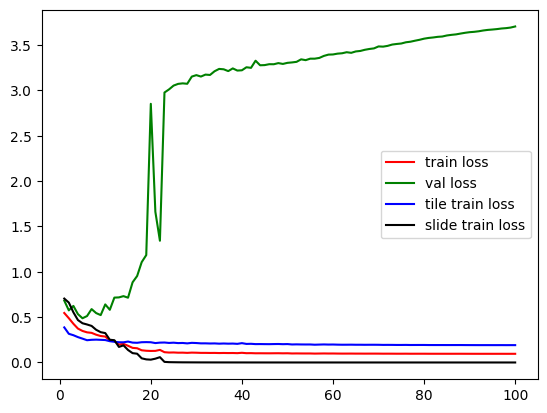

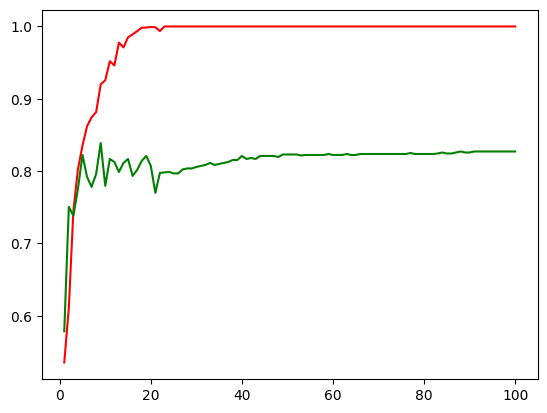

Best validation auc averaged over 5 folds: 0.864 (+- 0.033)
Last validation auc averaged over 5 folds: 0.811 (+- 0.063)
Best epochs:  [10, 1, 4, 5, 9]


In [ ]:
mixed_model = MixedMILModel(2048, 1024, 256, 512, ds=False, p=0)

make_cross_val(mixed_model, folds, n_epoch = 35, lr = 5e-4, step_size = 10)

MixedMILModel(
  (reduction): Sequential(
    (0): Dropout(p=0.15, inplace=False)
    (1): Linear(in_features=2048, out_features=1024, bias=True)
    (2): ReLU()
  )
  (attention): AttentionLayer(
    (U): Linear(in_features=1024, out_features=512, bias=False)
    (V): Linear(in_features=1024, out_features=512, bias=False)
    (W): Linear(in_features=512, out_features=1, bias=False)
  )
  (slide_clf): Sequential(
    (0): Dropout(p=0.15, inplace=False)
    (1): Linear(in_features=1024, out_features=256, bias=True)
    (2): ReLU()
    (3): Dropout(p=0.15, inplace=False)
    (4): Linear(in_features=256, out_features=1, bias=True)
    (5): Sigmoid()
  )
  (tiles_clf): Sequential(
    (0): Dropout(p=0.15, inplace=False)
    (1): Linear(in_features=1024, out_features=1, bias=True)
    (2): Sigmoid()
  )
)


100%|██████████| 56/56 [00:01<00:00, 39.80it/s]


Epoch 1: train loss 0.515 train auc 0.575 tiles auc 0.818 val loss 0.726 val auc 0.608


100%|██████████| 56/56 [00:01<00:00, 41.80it/s]


Epoch 2: train loss 0.398 train auc 0.798 tiles auc 0.892 val loss 1.004 val auc 0.757


100%|██████████| 56/56 [00:01<00:00, 40.84it/s]


Epoch 3: train loss 0.403 train auc 0.772 tiles auc 0.895 val loss 0.548 val auc 0.824


100%|██████████| 56/56 [00:01<00:00, 37.72it/s]


Epoch 4: train loss 0.342 train auc 0.852 tiles auc 0.907 val loss 0.464 val auc 0.845


100%|██████████| 56/56 [00:01<00:00, 40.56it/s]


Epoch 5: train loss 0.342 train auc 0.850 tiles auc 0.909 val loss 0.457 val auc 0.833


100%|██████████| 56/56 [00:01<00:00, 40.99it/s]


Epoch 6: train loss 0.336 train auc 0.858 tiles auc 0.895 val loss 0.669 val auc 0.837


100%|██████████| 56/56 [00:01<00:00, 36.67it/s]


Epoch 7: train loss 0.357 train auc 0.832 tiles auc 0.893 val loss 0.460 val auc 0.806


100%|██████████| 56/56 [00:01<00:00, 39.78it/s]


Epoch 8: train loss 0.332 train auc 0.859 tiles auc 0.906 val loss 0.492 val auc 0.840


100%|██████████| 56/56 [00:01<00:00, 39.29it/s]


Epoch 9: train loss 0.318 train auc 0.873 tiles auc 0.910 val loss 0.486 val auc 0.754


100%|██████████| 56/56 [00:01<00:00, 39.04it/s]


Epoch 10: train loss 0.332 train auc 0.853 tiles auc 0.901 val loss 0.501 val auc 0.777


100%|██████████| 56/56 [00:01<00:00, 40.99it/s]


Epoch 11: train loss 0.286 train auc 0.911 tiles auc 0.920 val loss 0.465 val auc 0.840


100%|██████████| 56/56 [00:01<00:00, 41.55it/s]


Epoch 12: train loss 0.271 train auc 0.932 tiles auc 0.922 val loss 0.516 val auc 0.832


100%|██████████| 56/56 [00:01<00:00, 41.09it/s]


Epoch 13: train loss 0.258 train auc 0.947 tiles auc 0.914 val loss 0.565 val auc 0.806


100%|██████████| 56/56 [00:01<00:00, 40.18it/s]


Epoch 14: train loss 0.288 train auc 0.913 tiles auc 0.914 val loss 0.433 val auc 0.857


100%|██████████| 56/56 [00:01<00:00, 37.85it/s]


Epoch 15: train loss 0.276 train auc 0.922 tiles auc 0.903 val loss 0.657 val auc 0.787


100%|██████████| 56/56 [00:01<00:00, 41.13it/s]


Epoch 16: train loss 0.280 train auc 0.914 tiles auc 0.915 val loss 0.478 val auc 0.844


100%|██████████| 56/56 [00:01<00:00, 41.77it/s]


Epoch 17: train loss 0.237 train auc 0.954 tiles auc 0.915 val loss 0.656 val auc 0.824


100%|██████████| 56/56 [00:01<00:00, 37.22it/s]


Epoch 18: train loss 0.242 train auc 0.952 tiles auc 0.917 val loss 0.736 val auc 0.840


100%|██████████| 56/56 [00:01<00:00, 41.10it/s]


Epoch 19: train loss 0.269 train auc 0.935 tiles auc 0.917 val loss 0.455 val auc 0.833


100%|██████████| 56/56 [00:01<00:00, 41.30it/s]


Epoch 20: train loss 0.240 train auc 0.943 tiles auc 0.922 val loss 0.500 val auc 0.817


100%|██████████| 56/56 [00:01<00:00, 37.96it/s]


Epoch 21: train loss 0.207 train auc 0.973 tiles auc 0.929 val loss 0.488 val auc 0.798


100%|██████████| 56/56 [00:01<00:00, 39.93it/s]


Epoch 22: train loss 0.223 train auc 0.956 tiles auc 0.928 val loss 0.493 val auc 0.820


100%|██████████| 56/56 [00:01<00:00, 41.30it/s]


Epoch 23: train loss 0.198 train auc 0.977 tiles auc 0.928 val loss 0.539 val auc 0.807


100%|██████████| 56/56 [00:01<00:00, 40.43it/s]


Epoch 24: train loss 0.202 train auc 0.973 tiles auc 0.929 val loss 0.516 val auc 0.817


100%|██████████| 56/56 [00:01<00:00, 41.18it/s]


Epoch 25: train loss 0.199 train auc 0.983 tiles auc 0.925 val loss 0.521 val auc 0.844


100%|██████████| 56/56 [00:01<00:00, 38.28it/s]


Epoch 26: train loss 0.181 train auc 0.984 tiles auc 0.928 val loss 0.574 val auc 0.803


100%|██████████| 56/56 [00:01<00:00, 39.32it/s]


Epoch 27: train loss 0.189 train auc 0.980 tiles auc 0.929 val loss 0.595 val auc 0.817


100%|██████████| 56/56 [00:01<00:00, 40.79it/s]


Epoch 28: train loss 0.150 train auc 0.994 tiles auc 0.929 val loss 0.697 val auc 0.814


100%|██████████| 56/56 [00:01<00:00, 36.95it/s]


Epoch 29: train loss 0.169 train auc 0.990 tiles auc 0.931 val loss 0.678 val auc 0.799


100%|██████████| 56/56 [00:01<00:00, 40.69it/s]


Epoch 30: train loss 0.153 train auc 0.995 tiles auc 0.932 val loss 0.718 val auc 0.820


100%|██████████| 56/56 [00:01<00:00, 40.90it/s]


Epoch 31: train loss 0.141 train auc 0.998 tiles auc 0.930 val loss 0.863 val auc 0.798


100%|██████████| 56/56 [00:01<00:00, 36.91it/s]


Epoch 32: train loss 0.143 train auc 0.991 tiles auc 0.932 val loss 0.684 val auc 0.809


100%|██████████| 56/56 [00:01<00:00, 41.77it/s]


Epoch 33: train loss 0.148 train auc 0.993 tiles auc 0.934 val loss 0.857 val auc 0.771


100%|██████████| 56/56 [00:01<00:00, 41.76it/s]


Epoch 34: train loss 0.149 train auc 0.996 tiles auc 0.934 val loss 0.886 val auc 0.789


100%|██████████| 56/56 [00:01<00:00, 39.71it/s]


Epoch 35: train loss 0.152 train auc 0.992 tiles auc 0.932 val loss 0.870 val auc 0.777
Best auc: 0.857, last auc: 0.777, best epoch: 14


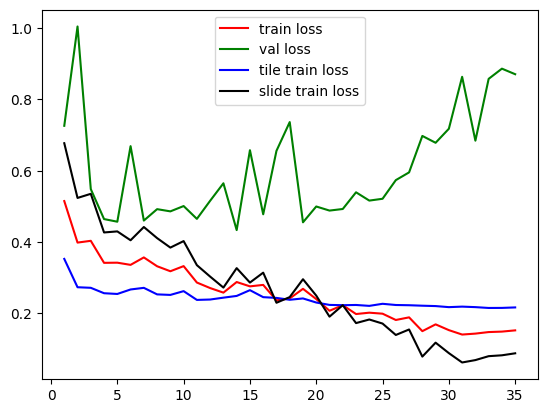

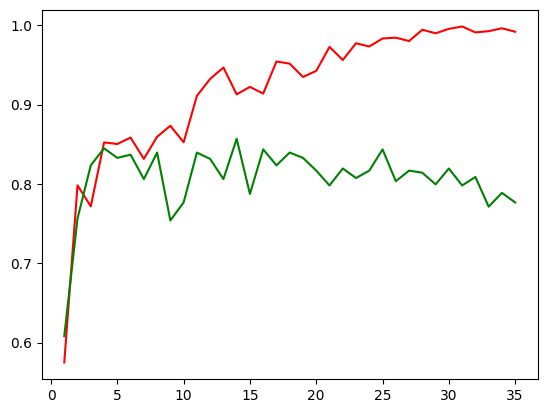

MixedMILModel(
  (reduction): Sequential(
    (0): Dropout(p=0.15, inplace=False)
    (1): Linear(in_features=2048, out_features=1024, bias=True)
    (2): ReLU()
  )
  (attention): AttentionLayer(
    (U): Linear(in_features=1024, out_features=512, bias=False)
    (V): Linear(in_features=1024, out_features=512, bias=False)
    (W): Linear(in_features=512, out_features=1, bias=False)
  )
  (slide_clf): Sequential(
    (0): Dropout(p=0.15, inplace=False)
    (1): Linear(in_features=1024, out_features=256, bias=True)
    (2): ReLU()
    (3): Dropout(p=0.15, inplace=False)
    (4): Linear(in_features=256, out_features=1, bias=True)
    (5): Sigmoid()
  )
  (tiles_clf): Sequential(
    (0): Dropout(p=0.15, inplace=False)
    (1): Linear(in_features=1024, out_features=1, bias=True)
    (2): Sigmoid()
  )
)


100%|██████████| 56/56 [00:01<00:00, 41.23it/s]


Epoch 1: train loss 0.765 train auc 0.560 tiles auc 0.486 val loss 0.717 val auc 0.528


100%|██████████| 56/56 [00:01<00:00, 40.44it/s]


Epoch 2: train loss 0.561 train auc 0.463 tiles auc 0.705 val loss 0.620 val auc 0.753


100%|██████████| 56/56 [00:01<00:00, 40.18it/s]


Epoch 3: train loss 0.450 train auc 0.684 tiles auc 0.876 val loss 0.523 val auc 0.769


100%|██████████| 56/56 [00:01<00:00, 40.67it/s]


Epoch 4: train loss 0.374 train auc 0.812 tiles auc 0.905 val loss 0.435 val auc 0.778


100%|██████████| 56/56 [00:01<00:00, 37.12it/s]


Epoch 5: train loss 0.369 train auc 0.829 tiles auc 0.911 val loss 0.520 val auc 0.750


100%|██████████| 56/56 [00:01<00:00, 41.19it/s]


Epoch 6: train loss 0.345 train auc 0.839 tiles auc 0.913 val loss 0.592 val auc 0.753


100%|██████████| 56/56 [00:01<00:00, 40.72it/s]


Epoch 7: train loss 0.331 train auc 0.865 tiles auc 0.925 val loss 0.485 val auc 0.798


100%|██████████| 56/56 [00:01<00:00, 37.15it/s]


Epoch 8: train loss 0.305 train auc 0.893 tiles auc 0.923 val loss 0.490 val auc 0.789


100%|██████████| 56/56 [00:01<00:00, 41.14it/s]


Epoch 9: train loss 0.290 train auc 0.905 tiles auc 0.930 val loss 0.621 val auc 0.761


100%|██████████| 56/56 [00:01<00:00, 40.79it/s]


Epoch 10: train loss 0.259 train auc 0.933 tiles auc 0.931 val loss 0.674 val auc 0.785


100%|██████████| 56/56 [00:01<00:00, 37.93it/s]


Epoch 11: train loss 0.262 train auc 0.922 tiles auc 0.926 val loss 0.516 val auc 0.773


100%|██████████| 56/56 [00:01<00:00, 40.98it/s]


Epoch 12: train loss 0.235 train auc 0.956 tiles auc 0.929 val loss 0.539 val auc 0.769


100%|██████████| 56/56 [00:01<00:00, 40.53it/s]


Epoch 13: train loss 0.236 train auc 0.952 tiles auc 0.930 val loss 0.578 val auc 0.770


100%|██████████| 56/56 [00:01<00:00, 39.80it/s]


Epoch 14: train loss 0.229 train auc 0.954 tiles auc 0.929 val loss 0.695 val auc 0.769


100%|██████████| 56/56 [00:01<00:00, 39.31it/s]


Epoch 15: train loss 0.227 train auc 0.963 tiles auc 0.929 val loss 0.533 val auc 0.779


100%|██████████| 56/56 [00:01<00:00, 38.62it/s]


Epoch 16: train loss 0.196 train auc 0.980 tiles auc 0.925 val loss 0.658 val auc 0.774


100%|██████████| 56/56 [00:01<00:00, 41.16it/s]


Epoch 17: train loss 0.200 train auc 0.986 tiles auc 0.928 val loss 0.737 val auc 0.777


100%|██████████| 56/56 [00:01<00:00, 40.45it/s]


Epoch 18: train loss 0.206 train auc 0.979 tiles auc 0.929 val loss 0.702 val auc 0.774


100%|██████████| 56/56 [00:01<00:00, 37.09it/s]


Epoch 19: train loss 0.174 train auc 0.991 tiles auc 0.929 val loss 0.719 val auc 0.811


100%|██████████| 56/56 [00:01<00:00, 41.41it/s]


Epoch 20: train loss 0.182 train auc 0.992 tiles auc 0.926 val loss 0.955 val auc 0.810


100%|██████████| 56/56 [00:01<00:00, 40.35it/s]


Epoch 21: train loss 0.195 train auc 0.984 tiles auc 0.928 val loss 0.797 val auc 0.818


100%|██████████| 56/56 [00:01<00:00, 36.77it/s]


Epoch 22: train loss 0.166 train auc 0.991 tiles auc 0.930 val loss 0.776 val auc 0.814


100%|██████████| 56/56 [00:01<00:00, 40.99it/s]


Epoch 23: train loss 0.162 train auc 0.993 tiles auc 0.931 val loss 0.832 val auc 0.793


100%|██████████| 56/56 [00:01<00:00, 40.72it/s]


Epoch 24: train loss 0.164 train auc 0.995 tiles auc 0.927 val loss 0.890 val auc 0.813


100%|██████████| 56/56 [00:01<00:00, 40.51it/s]


Epoch 25: train loss 0.143 train auc 0.998 tiles auc 0.929 val loss 0.890 val auc 0.838


100%|██████████| 56/56 [00:01<00:00, 41.15it/s]


Epoch 26: train loss 0.138 train auc 0.999 tiles auc 0.928 val loss 0.937 val auc 0.810


100%|██████████| 56/56 [00:01<00:00, 39.60it/s]


Epoch 27: train loss 0.189 train auc 0.985 tiles auc 0.924 val loss 0.866 val auc 0.809


100%|██████████| 56/56 [00:01<00:00, 40.17it/s]


Epoch 28: train loss 0.137 train auc 0.998 tiles auc 0.931 val loss 0.756 val auc 0.841


100%|██████████| 56/56 [00:01<00:00, 40.78it/s]


Epoch 29: train loss 0.161 train auc 0.994 tiles auc 0.929 val loss 0.858 val auc 0.806


100%|██████████| 56/56 [00:01<00:00, 35.75it/s]


Epoch 30: train loss 0.174 train auc 0.990 tiles auc 0.931 val loss 0.768 val auc 0.813


100%|██████████| 56/56 [00:01<00:00, 40.91it/s]


Epoch 31: train loss 0.138 train auc 0.997 tiles auc 0.934 val loss 0.861 val auc 0.806


100%|██████████| 56/56 [00:01<00:00, 40.49it/s]


Epoch 32: train loss 0.128 train auc 1.000 tiles auc 0.932 val loss 1.092 val auc 0.805


100%|██████████| 56/56 [00:01<00:00, 36.10it/s]


Epoch 33: train loss 0.134 train auc 0.999 tiles auc 0.931 val loss 0.976 val auc 0.813


100%|██████████| 56/56 [00:01<00:00, 41.02it/s]


Epoch 34: train loss 0.119 train auc 1.000 tiles auc 0.933 val loss 1.013 val auc 0.807


100%|██████████| 56/56 [00:01<00:00, 40.67it/s]


Epoch 35: train loss 0.126 train auc 1.000 tiles auc 0.931 val loss 1.067 val auc 0.806
Best auc: 0.841, last auc: 0.806, best epoch: 28


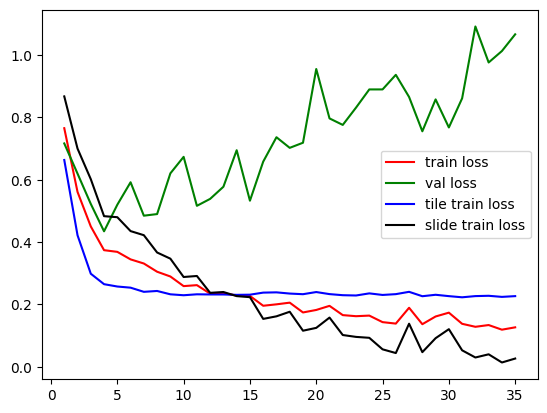

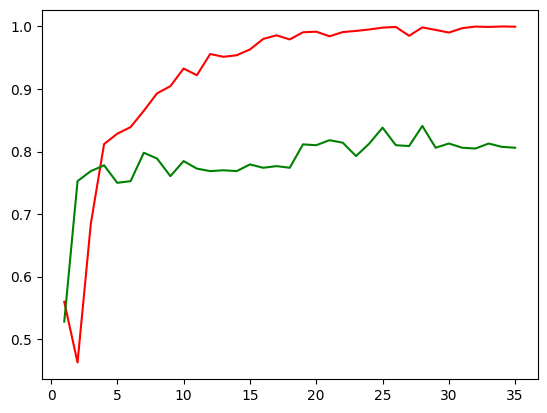

MixedMILModel(
  (reduction): Sequential(
    (0): Dropout(p=0.15, inplace=False)
    (1): Linear(in_features=2048, out_features=1024, bias=True)
    (2): ReLU()
  )
  (attention): AttentionLayer(
    (U): Linear(in_features=1024, out_features=512, bias=False)
    (V): Linear(in_features=1024, out_features=512, bias=False)
    (W): Linear(in_features=512, out_features=1, bias=False)
  )
  (slide_clf): Sequential(
    (0): Dropout(p=0.15, inplace=False)
    (1): Linear(in_features=1024, out_features=256, bias=True)
    (2): ReLU()
    (3): Dropout(p=0.15, inplace=False)
    (4): Linear(in_features=256, out_features=1, bias=True)
    (5): Sigmoid()
  )
  (tiles_clf): Sequential(
    (0): Dropout(p=0.15, inplace=False)
    (1): Linear(in_features=1024, out_features=1, bias=True)
    (2): Sigmoid()
  )
)


100%|██████████| 56/56 [00:01<00:00, 41.35it/s]


Epoch 1: train loss 0.533 train auc 0.498 tiles auc 0.836 val loss 0.660 val auc 0.679


100%|██████████| 56/56 [00:01<00:00, 44.61it/s]


Epoch 2: train loss 0.459 train auc 0.680 tiles auc 0.886 val loss 0.470 val auc 0.841


100%|██████████| 56/56 [00:01<00:00, 44.33it/s]


Epoch 3: train loss 0.397 train auc 0.777 tiles auc 0.891 val loss 0.460 val auc 0.848


100%|██████████| 56/56 [00:01<00:00, 43.46it/s]


Epoch 4: train loss 0.353 train auc 0.851 tiles auc 0.900 val loss 0.426 val auc 0.889


100%|██████████| 56/56 [00:01<00:00, 43.90it/s]


Epoch 5: train loss 0.359 train auc 0.862 tiles auc 0.891 val loss 0.579 val auc 0.909


100%|██████████| 56/56 [00:01<00:00, 39.77it/s]


Epoch 6: train loss 0.341 train auc 0.860 tiles auc 0.908 val loss 0.483 val auc 0.922


100%|██████████| 56/56 [00:01<00:00, 43.19it/s]


Epoch 7: train loss 0.331 train auc 0.875 tiles auc 0.906 val loss 0.327 val auc 0.929


100%|██████████| 56/56 [00:01<00:00, 44.05it/s]


Epoch 8: train loss 0.325 train auc 0.873 tiles auc 0.906 val loss 0.469 val auc 0.921


100%|██████████| 56/56 [00:01<00:00, 38.23it/s]


Epoch 9: train loss 0.337 train auc 0.868 tiles auc 0.914 val loss 0.387 val auc 0.895


100%|██████████| 56/56 [00:01<00:00, 42.73it/s]


Epoch 10: train loss 0.298 train auc 0.901 tiles auc 0.911 val loss 0.384 val auc 0.899


100%|██████████| 56/56 [00:01<00:00, 44.11it/s]


Epoch 11: train loss 0.256 train auc 0.939 tiles auc 0.923 val loss 0.502 val auc 0.916


100%|██████████| 56/56 [00:01<00:00, 39.57it/s]


Epoch 12: train loss 0.258 train auc 0.937 tiles auc 0.921 val loss 0.439 val auc 0.895


100%|██████████| 56/56 [00:01<00:00, 43.97it/s]


Epoch 13: train loss 0.298 train auc 0.889 tiles auc 0.916 val loss 0.408 val auc 0.893


100%|██████████| 56/56 [00:01<00:00, 41.73it/s]


Epoch 14: train loss 0.254 train auc 0.933 tiles auc 0.918 val loss 0.397 val auc 0.889


100%|██████████| 56/56 [00:01<00:00, 43.60it/s]


Epoch 15: train loss 0.248 train auc 0.953 tiles auc 0.920 val loss 0.459 val auc 0.910


100%|██████████| 56/56 [00:01<00:00, 44.43it/s]


Epoch 16: train loss 0.249 train auc 0.945 tiles auc 0.917 val loss 0.435 val auc 0.885


100%|██████████| 56/56 [00:01<00:00, 41.24it/s]


Epoch 17: train loss 0.253 train auc 0.941 tiles auc 0.914 val loss 0.461 val auc 0.872


100%|██████████| 56/56 [00:01<00:00, 43.34it/s]


Epoch 18: train loss 0.232 train auc 0.966 tiles auc 0.913 val loss 0.421 val auc 0.901


100%|██████████| 56/56 [00:01<00:00, 42.74it/s]


Epoch 19: train loss 0.233 train auc 0.963 tiles auc 0.914 val loss 0.589 val auc 0.819


100%|██████████| 56/56 [00:01<00:00, 38.01it/s]


Epoch 20: train loss 0.234 train auc 0.966 tiles auc 0.908 val loss 0.533 val auc 0.860


100%|██████████| 56/56 [00:01<00:00, 42.37it/s]


Epoch 21: train loss 0.204 train auc 0.975 tiles auc 0.914 val loss 0.513 val auc 0.884


100%|██████████| 56/56 [00:01<00:00, 43.37it/s]


Epoch 22: train loss 0.217 train auc 0.969 tiles auc 0.917 val loss 0.569 val auc 0.887


100%|██████████| 56/56 [00:01<00:00, 36.92it/s]


Epoch 23: train loss 0.185 train auc 0.985 tiles auc 0.917 val loss 0.598 val auc 0.872


100%|██████████| 56/56 [00:01<00:00, 44.00it/s]


Epoch 24: train loss 0.182 train auc 0.989 tiles auc 0.916 val loss 0.820 val auc 0.812


100%|██████████| 56/56 [00:01<00:00, 43.72it/s]


Epoch 25: train loss 0.198 train auc 0.978 tiles auc 0.912 val loss 0.520 val auc 0.867


100%|██████████| 56/56 [00:01<00:00, 41.39it/s]


Epoch 26: train loss 0.185 train auc 0.988 tiles auc 0.917 val loss 0.652 val auc 0.862


100%|██████████| 56/56 [00:01<00:00, 43.55it/s]


Epoch 27: train loss 0.184 train auc 0.987 tiles auc 0.917 val loss 0.714 val auc 0.833


100%|██████████| 56/56 [00:01<00:00, 44.57it/s]


Epoch 28: train loss 0.182 train auc 0.985 tiles auc 0.918 val loss 0.613 val auc 0.863


100%|██████████| 56/56 [00:01<00:00, 43.12it/s]


Epoch 29: train loss 0.170 train auc 0.990 tiles auc 0.918 val loss 0.680 val auc 0.862


100%|██████████| 56/56 [00:01<00:00, 43.93it/s]


Epoch 30: train loss 0.175 train auc 0.982 tiles auc 0.918 val loss 0.572 val auc 0.876


100%|██████████| 56/56 [00:01<00:00, 38.53it/s]


Epoch 31: train loss 0.152 train auc 0.996 tiles auc 0.921 val loss 0.713 val auc 0.845


100%|██████████| 56/56 [00:01<00:00, 44.84it/s]


Epoch 32: train loss 0.166 train auc 0.992 tiles auc 0.922 val loss 0.642 val auc 0.868


100%|██████████| 56/56 [00:01<00:00, 43.85it/s]


Epoch 33: train loss 0.172 train auc 0.991 tiles auc 0.920 val loss 0.877 val auc 0.826


100%|██████████| 56/56 [00:01<00:00, 38.93it/s]


Epoch 34: train loss 0.156 train auc 0.994 tiles auc 0.922 val loss 0.810 val auc 0.816


100%|██████████| 56/56 [00:01<00:00, 43.07it/s]


Epoch 35: train loss 0.144 train auc 0.994 tiles auc 0.922 val loss 0.842 val auc 0.826
Best auc: 0.929, last auc: 0.826, best epoch: 7


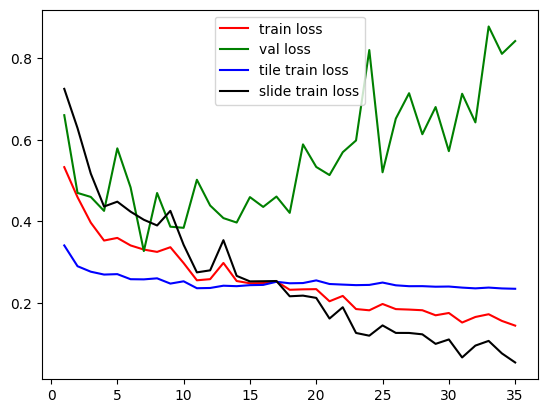

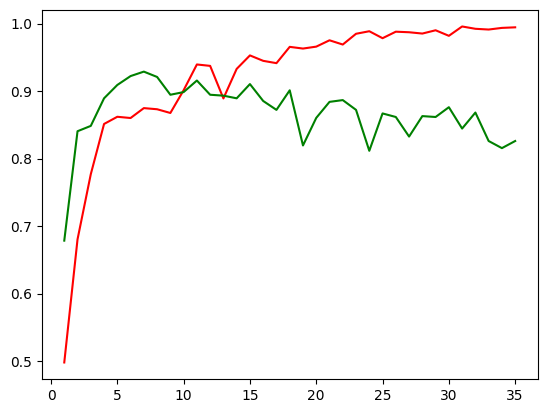

MixedMILModel(
  (reduction): Sequential(
    (0): Dropout(p=0.15, inplace=False)
    (1): Linear(in_features=2048, out_features=1024, bias=True)
    (2): ReLU()
  )
  (attention): AttentionLayer(
    (U): Linear(in_features=1024, out_features=512, bias=False)
    (V): Linear(in_features=1024, out_features=512, bias=False)
    (W): Linear(in_features=512, out_features=1, bias=False)
  )
  (slide_clf): Sequential(
    (0): Dropout(p=0.15, inplace=False)
    (1): Linear(in_features=1024, out_features=256, bias=True)
    (2): ReLU()
    (3): Dropout(p=0.15, inplace=False)
    (4): Linear(in_features=256, out_features=1, bias=True)
    (5): Sigmoid()
  )
  (tiles_clf): Sequential(
    (0): Dropout(p=0.15, inplace=False)
    (1): Linear(in_features=1024, out_features=1, bias=True)
    (2): Sigmoid()
  )
)


100%|██████████| 56/56 [00:01<00:00, 42.17it/s]


Epoch 1: train loss 0.535 train auc 0.497 tiles auc 0.813 val loss 0.690 val auc 0.816


100%|██████████| 56/56 [00:01<00:00, 37.43it/s]


Epoch 2: train loss 0.454 train auc 0.674 tiles auc 0.887 val loss 0.545 val auc 0.889


100%|██████████| 56/56 [00:01<00:00, 42.77it/s]


Epoch 3: train loss 0.402 train auc 0.745 tiles auc 0.898 val loss 0.572 val auc 0.837


100%|██████████| 56/56 [00:01<00:00, 42.99it/s]


Epoch 4: train loss 0.370 train auc 0.809 tiles auc 0.907 val loss 0.468 val auc 0.851


100%|██████████| 56/56 [00:01<00:00, 40.03it/s]


Epoch 5: train loss 0.378 train auc 0.778 tiles auc 0.902 val loss 0.434 val auc 0.842


100%|██████████| 56/56 [00:01<00:00, 42.67it/s]


Epoch 6: train loss 0.340 train auc 0.812 tiles auc 0.910 val loss 0.419 val auc 0.843


100%|██████████| 56/56 [00:01<00:00, 42.59it/s]


Epoch 7: train loss 0.347 train auc 0.857 tiles auc 0.891 val loss 0.521 val auc 0.837


100%|██████████| 56/56 [00:01<00:00, 41.94it/s]


Epoch 8: train loss 0.364 train auc 0.813 tiles auc 0.900 val loss 0.407 val auc 0.891


100%|██████████| 56/56 [00:01<00:00, 42.49it/s]


Epoch 9: train loss 0.325 train auc 0.868 tiles auc 0.907 val loss 0.444 val auc 0.848


100%|██████████| 56/56 [00:01<00:00, 39.30it/s]


Epoch 10: train loss 0.328 train auc 0.881 tiles auc 0.895 val loss 0.478 val auc 0.816


100%|██████████| 56/56 [00:01<00:00, 41.95it/s]


Epoch 11: train loss 0.299 train auc 0.899 tiles auc 0.910 val loss 0.404 val auc 0.893


100%|██████████| 56/56 [00:01<00:00, 42.60it/s]


Epoch 12: train loss 0.284 train auc 0.909 tiles auc 0.920 val loss 0.400 val auc 0.903


100%|██████████| 56/56 [00:01<00:00, 37.43it/s]


Epoch 13: train loss 0.267 train auc 0.928 tiles auc 0.923 val loss 0.398 val auc 0.887


100%|██████████| 56/56 [00:01<00:00, 42.26it/s]


Epoch 14: train loss 0.277 train auc 0.921 tiles auc 0.919 val loss 0.419 val auc 0.866


100%|██████████| 56/56 [00:01<00:00, 42.67it/s]


Epoch 15: train loss 0.254 train auc 0.950 tiles auc 0.915 val loss 0.437 val auc 0.855


100%|██████████| 56/56 [00:01<00:00, 38.28it/s]


Epoch 16: train loss 0.261 train auc 0.929 tiles auc 0.922 val loss 0.414 val auc 0.868


100%|██████████| 56/56 [00:01<00:00, 41.92it/s]


Epoch 17: train loss 0.225 train auc 0.959 tiles auc 0.924 val loss 0.427 val auc 0.879


100%|██████████| 56/56 [00:01<00:00, 41.02it/s]


Epoch 18: train loss 0.262 train auc 0.923 tiles auc 0.919 val loss 0.437 val auc 0.816


100%|██████████| 56/56 [00:01<00:00, 37.68it/s]


Epoch 19: train loss 0.252 train auc 0.933 tiles auc 0.919 val loss 0.443 val auc 0.834


100%|██████████| 56/56 [00:01<00:00, 42.10it/s]


Epoch 20: train loss 0.243 train auc 0.949 tiles auc 0.919 val loss 0.420 val auc 0.851


100%|██████████| 56/56 [00:01<00:00, 41.76it/s]


Epoch 21: train loss 0.218 train auc 0.962 tiles auc 0.926 val loss 0.463 val auc 0.851


100%|██████████| 56/56 [00:01<00:00, 42.10it/s]


Epoch 22: train loss 0.219 train auc 0.961 tiles auc 0.928 val loss 0.563 val auc 0.825


100%|██████████| 56/56 [00:01<00:00, 41.54it/s]


Epoch 23: train loss 0.203 train auc 0.970 tiles auc 0.927 val loss 0.485 val auc 0.839


100%|██████████| 56/56 [00:01<00:00, 41.39it/s]


Epoch 24: train loss 0.214 train auc 0.968 tiles auc 0.924 val loss 0.528 val auc 0.835


100%|██████████| 56/56 [00:01<00:00, 43.03it/s]


Epoch 25: train loss 0.220 train auc 0.969 tiles auc 0.926 val loss 0.556 val auc 0.825


100%|██████████| 56/56 [00:01<00:00, 42.36it/s]


Epoch 26: train loss 0.185 train auc 0.981 tiles auc 0.930 val loss 0.635 val auc 0.834


100%|██████████| 56/56 [00:01<00:00, 38.32it/s]


Epoch 27: train loss 0.197 train auc 0.971 tiles auc 0.927 val loss 0.583 val auc 0.841


100%|██████████| 56/56 [00:01<00:00, 42.93it/s]


Epoch 28: train loss 0.191 train auc 0.982 tiles auc 0.927 val loss 0.565 val auc 0.848


100%|██████████| 56/56 [00:01<00:00, 42.54it/s]


Epoch 29: train loss 0.164 train auc 0.995 tiles auc 0.929 val loss 0.693 val auc 0.834


100%|██████████| 56/56 [00:01<00:00, 37.30it/s]


Epoch 30: train loss 0.173 train auc 0.986 tiles auc 0.932 val loss 0.668 val auc 0.834


100%|██████████| 56/56 [00:01<00:00, 42.64it/s]


Epoch 31: train loss 0.167 train auc 0.993 tiles auc 0.930 val loss 0.709 val auc 0.826


100%|██████████| 56/56 [00:01<00:00, 42.10it/s]


Epoch 32: train loss 0.159 train auc 0.995 tiles auc 0.933 val loss 0.638 val auc 0.842


100%|██████████| 56/56 [00:01<00:00, 39.94it/s]


Epoch 33: train loss 0.164 train auc 0.994 tiles auc 0.933 val loss 0.593 val auc 0.845


100%|██████████| 56/56 [00:01<00:00, 42.44it/s]


Epoch 34: train loss 0.146 train auc 0.997 tiles auc 0.932 val loss 0.592 val auc 0.850


100%|██████████| 56/56 [00:01<00:00, 42.25it/s]


Epoch 35: train loss 0.142 train auc 0.999 tiles auc 0.932 val loss 0.735 val auc 0.855
Best auc: 0.903, last auc: 0.855, best epoch: 12


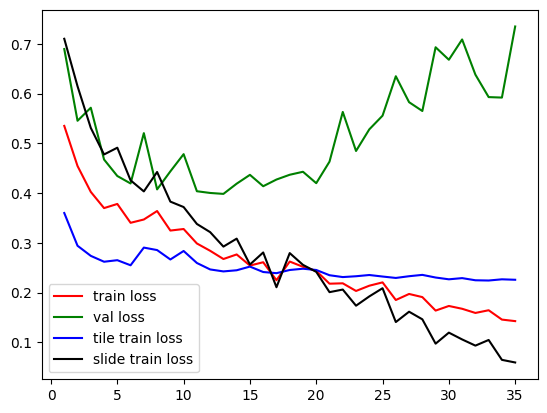

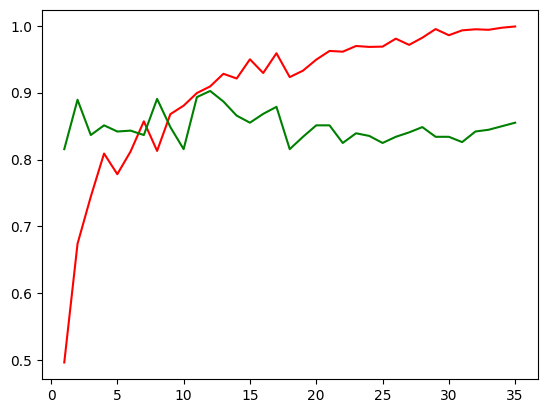

MixedMILModel(
  (reduction): Sequential(
    (0): Dropout(p=0.15, inplace=False)
    (1): Linear(in_features=2048, out_features=1024, bias=True)
    (2): ReLU()
  )
  (attention): AttentionLayer(
    (U): Linear(in_features=1024, out_features=512, bias=False)
    (V): Linear(in_features=1024, out_features=512, bias=False)
    (W): Linear(in_features=512, out_features=1, bias=False)
  )
  (slide_clf): Sequential(
    (0): Dropout(p=0.15, inplace=False)
    (1): Linear(in_features=1024, out_features=256, bias=True)
    (2): ReLU()
    (3): Dropout(p=0.15, inplace=False)
    (4): Linear(in_features=256, out_features=1, bias=True)
    (5): Sigmoid()
  )
  (tiles_clf): Sequential(
    (0): Dropout(p=0.15, inplace=False)
    (1): Linear(in_features=1024, out_features=1, bias=True)
    (2): Sigmoid()
  )
)


100%|██████████| 55/55 [00:01<00:00, 41.88it/s]


Epoch 1: train loss 0.519 train auc 0.473 tiles auc 0.836 val loss 0.665 val auc 0.663


100%|██████████| 55/55 [00:01<00:00, 42.55it/s]


Epoch 2: train loss 0.464 train auc 0.677 tiles auc 0.885 val loss 0.581 val auc 0.764


100%|██████████| 55/55 [00:01<00:00, 40.95it/s]


Epoch 3: train loss 0.377 train auc 0.796 tiles auc 0.905 val loss 0.707 val auc 0.833


100%|██████████| 55/55 [00:01<00:00, 42.73it/s]


Epoch 4: train loss 0.387 train auc 0.802 tiles auc 0.897 val loss 0.541 val auc 0.817


100%|██████████| 55/55 [00:01<00:00, 43.08it/s]


Epoch 5: train loss 0.341 train auc 0.856 tiles auc 0.901 val loss 0.487 val auc 0.807


100%|██████████| 55/55 [00:01<00:00, 39.14it/s]


Epoch 6: train loss 0.330 train auc 0.877 tiles auc 0.911 val loss 0.626 val auc 0.851


100%|██████████| 55/55 [00:01<00:00, 42.06it/s]


Epoch 7: train loss 0.330 train auc 0.863 tiles auc 0.915 val loss 0.477 val auc 0.792


100%|██████████| 55/55 [00:01<00:00, 42.97it/s]


Epoch 8: train loss 0.313 train auc 0.892 tiles auc 0.919 val loss 0.554 val auc 0.803


100%|██████████| 55/55 [00:01<00:00, 38.31it/s]


Epoch 9: train loss 0.317 train auc 0.900 tiles auc 0.920 val loss 0.487 val auc 0.829


100%|██████████| 55/55 [00:01<00:00, 43.22it/s]


Epoch 10: train loss 0.302 train auc 0.904 tiles auc 0.912 val loss 0.504 val auc 0.828


100%|██████████| 55/55 [00:01<00:00, 42.71it/s]


Epoch 11: train loss 0.257 train auc 0.941 tiles auc 0.930 val loss 0.539 val auc 0.853


100%|██████████| 55/55 [00:01<00:00, 37.22it/s]


Epoch 12: train loss 0.257 train auc 0.937 tiles auc 0.925 val loss 0.509 val auc 0.843


100%|██████████| 55/55 [00:01<00:00, 42.87it/s]


Epoch 13: train loss 0.235 train auc 0.960 tiles auc 0.931 val loss 0.715 val auc 0.826


100%|██████████| 55/55 [00:01<00:00, 41.45it/s]


Epoch 14: train loss 0.257 train auc 0.940 tiles auc 0.926 val loss 0.498 val auc 0.848


100%|██████████| 55/55 [00:01<00:00, 41.36it/s]


Epoch 15: train loss 0.242 train auc 0.956 tiles auc 0.926 val loss 0.497 val auc 0.839


100%|██████████| 55/55 [00:01<00:00, 43.17it/s]


Epoch 16: train loss 0.226 train auc 0.966 tiles auc 0.924 val loss 0.551 val auc 0.854


100%|██████████| 55/55 [00:01<00:00, 42.13it/s]


Epoch 17: train loss 0.215 train auc 0.972 tiles auc 0.926 val loss 0.790 val auc 0.806


100%|██████████| 55/55 [00:01<00:00, 41.84it/s]


Epoch 18: train loss 0.227 train auc 0.962 tiles auc 0.927 val loss 0.558 val auc 0.840


100%|██████████| 55/55 [00:01<00:00, 41.11it/s]


Epoch 19: train loss 0.236 train auc 0.963 tiles auc 0.921 val loss 0.508 val auc 0.844


100%|██████████| 55/55 [00:01<00:00, 39.68it/s]


Epoch 20: train loss 0.197 train auc 0.983 tiles auc 0.922 val loss 0.751 val auc 0.837


100%|██████████| 55/55 [00:01<00:00, 43.06it/s]


Epoch 21: train loss 0.181 train auc 0.983 tiles auc 0.929 val loss 0.657 val auc 0.842


100%|██████████| 55/55 [00:01<00:00, 43.12it/s]


Epoch 22: train loss 0.162 train auc 0.996 tiles auc 0.927 val loss 0.758 val auc 0.869


100%|██████████| 55/55 [00:01<00:00, 38.25it/s]


Epoch 23: train loss 0.144 train auc 0.998 tiles auc 0.931 val loss 0.901 val auc 0.848


100%|██████████| 55/55 [00:01<00:00, 43.34it/s]


Epoch 24: train loss 0.177 train auc 0.989 tiles auc 0.929 val loss 0.877 val auc 0.858


100%|██████████| 55/55 [00:01<00:00, 41.39it/s]


Epoch 25: train loss 0.145 train auc 0.997 tiles auc 0.935 val loss 0.804 val auc 0.855


100%|██████████| 55/55 [00:01<00:00, 37.54it/s]


Epoch 26: train loss 0.138 train auc 0.999 tiles auc 0.930 val loss 0.809 val auc 0.864


100%|██████████| 55/55 [00:01<00:00, 43.23it/s]


Epoch 27: train loss 0.172 train auc 0.991 tiles auc 0.932 val loss 0.849 val auc 0.857


100%|██████████| 55/55 [00:01<00:00, 43.13it/s]


Epoch 28: train loss 0.149 train auc 0.997 tiles auc 0.938 val loss 0.733 val auc 0.848


100%|██████████| 55/55 [00:01<00:00, 38.64it/s]


Epoch 29: train loss 0.144 train auc 0.997 tiles auc 0.932 val loss 0.768 val auc 0.855


100%|██████████| 55/55 [00:01<00:00, 42.43it/s]


Epoch 30: train loss 0.129 train auc 1.000 tiles auc 0.935 val loss 0.929 val auc 0.866


100%|██████████| 55/55 [00:01<00:00, 42.63it/s]


Epoch 31: train loss 0.121 train auc 1.000 tiles auc 0.937 val loss 0.858 val auc 0.871


100%|██████████| 55/55 [00:01<00:00, 42.17it/s]


Epoch 32: train loss 0.116 train auc 1.000 tiles auc 0.938 val loss 0.780 val auc 0.875


100%|██████████| 55/55 [00:01<00:00, 42.47it/s]


Epoch 33: train loss 0.121 train auc 1.000 tiles auc 0.936 val loss 0.785 val auc 0.876


100%|██████████| 55/55 [00:01<00:00, 40.17it/s]


Epoch 34: train loss 0.116 train auc 1.000 tiles auc 0.937 val loss 0.880 val auc 0.876


100%|██████████| 55/55 [00:01<00:00, 43.14it/s]


Epoch 35: train loss 0.127 train auc 0.999 tiles auc 0.938 val loss 0.944 val auc 0.855
Best auc: 0.876, last auc: 0.855, best epoch: 33


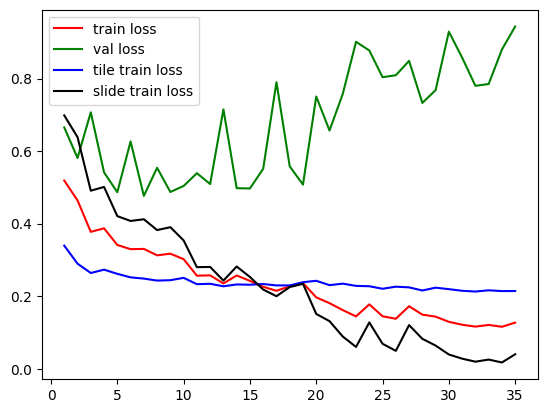

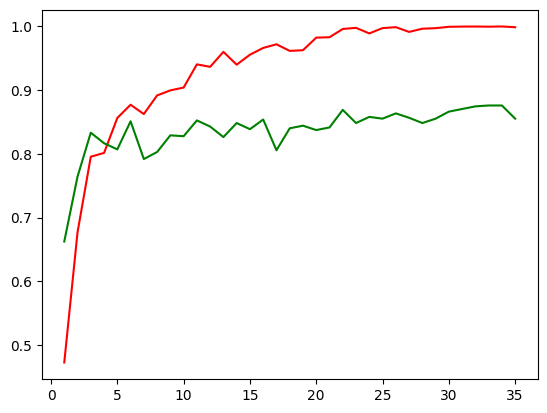

Best validation auc averaged over 5 folds: 0.881 (+- 0.032)
Last validation auc averaged over 5 folds: 0.824 (+- 0.030)
Best epochs:  [14, 28, 7, 12, 33]


In [ ]:
mixed_model = MixedMILModel(2048, 1024, 256, 512, ds=False, p=0.15)

make_cross_val(mixed_model, folds, n_epoch = 35, lr = 5e-4, step_size = 10)

MixedMILModel(
  (reduction): Sequential(
    (0): Dropout(p=0.25, inplace=False)
    (1): Linear(in_features=2048, out_features=1024, bias=True)
    (2): ReLU()
  )
  (attention): AttentionLayer(
    (U): Linear(in_features=1024, out_features=512, bias=False)
    (V): Linear(in_features=1024, out_features=512, bias=False)
    (W): Linear(in_features=512, out_features=1, bias=False)
  )
  (slide_clf): Sequential(
    (0): Dropout(p=0.25, inplace=False)
    (1): Linear(in_features=1024, out_features=256, bias=True)
    (2): ReLU()
    (3): Dropout(p=0.25, inplace=False)
    (4): Linear(in_features=256, out_features=1, bias=True)
    (5): Sigmoid()
  )
  (tiles_clf): Sequential(
    (0): Dropout(p=0.25, inplace=False)
    (1): Linear(in_features=1024, out_features=1, bias=True)
    (2): Sigmoid()
  )
)


100%|██████████| 56/56 [00:01<00:00, 33.67it/s]


Epoch 1: train loss 0.547 train auc 0.501 tiles auc 0.820 val loss 0.683 val auc 0.599


100%|██████████| 56/56 [00:01<00:00, 37.84it/s]


Epoch 2: train loss 0.475 train auc 0.601 tiles auc 0.881 val loss 0.588 val auc 0.770


100%|██████████| 56/56 [00:01<00:00, 41.46it/s]


Epoch 3: train loss 0.422 train auc 0.735 tiles auc 0.901 val loss 0.692 val auc 0.532


100%|██████████| 56/56 [00:01<00:00, 41.54it/s]


Epoch 4: train loss 0.439 train auc 0.644 tiles auc 0.911 val loss 0.484 val auc 0.857


100%|██████████| 56/56 [00:01<00:00, 40.82it/s]


Epoch 5: train loss 0.383 train auc 0.809 tiles auc 0.898 val loss 0.512 val auc 0.880


100%|██████████| 56/56 [00:01<00:00, 41.40it/s]


Epoch 6: train loss 0.341 train auc 0.842 tiles auc 0.902 val loss 0.513 val auc 0.897


100%|██████████| 56/56 [00:01<00:00, 38.52it/s]


Epoch 7: train loss 0.343 train auc 0.832 tiles auc 0.916 val loss 0.456 val auc 0.872


100%|██████████| 56/56 [00:01<00:00, 40.32it/s]


Epoch 8: train loss 0.323 train auc 0.879 tiles auc 0.899 val loss 0.508 val auc 0.852


100%|██████████| 56/56 [00:01<00:00, 41.47it/s]


Epoch 9: train loss 0.311 train auc 0.891 tiles auc 0.922 val loss 0.452 val auc 0.841


100%|██████████| 56/56 [00:01<00:00, 37.71it/s]


Epoch 10: train loss 0.334 train auc 0.866 tiles auc 0.912 val loss 0.408 val auc 0.884


100%|██████████| 56/56 [00:01<00:00, 41.15it/s]


Epoch 11: train loss 0.287 train auc 0.914 tiles auc 0.923 val loss 0.384 val auc 0.889


100%|██████████| 56/56 [00:01<00:00, 42.33it/s]


Epoch 12: train loss 0.257 train auc 0.935 tiles auc 0.930 val loss 0.402 val auc 0.900


100%|██████████| 56/56 [00:01<00:00, 39.61it/s]


Epoch 13: train loss 0.255 train auc 0.936 tiles auc 0.929 val loss 0.464 val auc 0.882


100%|██████████| 56/56 [00:01<00:00, 39.88it/s]


Epoch 14: train loss 0.255 train auc 0.943 tiles auc 0.925 val loss 0.363 val auc 0.900


100%|██████████| 56/56 [00:01<00:00, 40.62it/s]


Epoch 15: train loss 0.243 train auc 0.949 tiles auc 0.928 val loss 0.872 val auc 0.816


100%|██████████| 56/56 [00:01<00:00, 41.57it/s]


Epoch 16: train loss 0.228 train auc 0.965 tiles auc 0.921 val loss 0.534 val auc 0.876


100%|██████████| 56/56 [00:01<00:00, 40.86it/s]


Epoch 17: train loss 0.238 train auc 0.958 tiles auc 0.920 val loss 0.669 val auc 0.787


100%|██████████| 56/56 [00:01<00:00, 36.54it/s]


Epoch 18: train loss 0.271 train auc 0.908 tiles auc 0.926 val loss 0.347 val auc 0.918


100%|██████████| 56/56 [00:01<00:00, 41.85it/s]


Epoch 19: train loss 0.231 train auc 0.958 tiles auc 0.928 val loss 0.442 val auc 0.870


100%|██████████| 56/56 [00:01<00:00, 41.86it/s]


Epoch 20: train loss 0.225 train auc 0.970 tiles auc 0.930 val loss 0.393 val auc 0.884


100%|██████████| 56/56 [00:01<00:00, 37.13it/s]


Epoch 21: train loss 0.201 train auc 0.974 tiles auc 0.932 val loss 0.550 val auc 0.845


100%|██████████| 56/56 [00:01<00:00, 42.08it/s]


Epoch 22: train loss 0.200 train auc 0.977 tiles auc 0.929 val loss 0.555 val auc 0.860


100%|██████████| 56/56 [00:01<00:00, 40.95it/s]


Epoch 23: train loss 0.221 train auc 0.966 tiles auc 0.931 val loss 0.432 val auc 0.870


100%|██████████| 56/56 [00:01<00:00, 40.53it/s]


Epoch 24: train loss 0.183 train auc 0.983 tiles auc 0.931 val loss 0.491 val auc 0.869


100%|██████████| 56/56 [00:01<00:00, 41.87it/s]


Epoch 25: train loss 0.188 train auc 0.985 tiles auc 0.934 val loss 0.530 val auc 0.862


100%|██████████| 56/56 [00:01<00:00, 37.09it/s]


Epoch 26: train loss 0.203 train auc 0.977 tiles auc 0.930 val loss 0.493 val auc 0.862


100%|██████████| 56/56 [00:01<00:00, 42.06it/s]


Epoch 27: train loss 0.180 train auc 0.987 tiles auc 0.933 val loss 0.649 val auc 0.837


100%|██████████| 56/56 [00:01<00:00, 42.22it/s]


Epoch 28: train loss 0.176 train auc 0.990 tiles auc 0.930 val loss 0.489 val auc 0.873


100%|██████████| 56/56 [00:01<00:00, 38.15it/s]


Epoch 29: train loss 0.169 train auc 0.991 tiles auc 0.931 val loss 0.520 val auc 0.873


100%|██████████| 56/56 [00:01<00:00, 41.25it/s]


Epoch 30: train loss 0.182 train auc 0.986 tiles auc 0.932 val loss 0.637 val auc 0.834


100%|██████████| 56/56 [00:01<00:00, 40.21it/s]


Epoch 31: train loss 0.161 train auc 0.990 tiles auc 0.937 val loss 0.685 val auc 0.849


100%|██████████| 56/56 [00:01<00:00, 42.38it/s]


Epoch 32: train loss 0.153 train auc 0.996 tiles auc 0.934 val loss 0.702 val auc 0.844


100%|██████████| 56/56 [00:01<00:00, 41.97it/s]


Epoch 33: train loss 0.144 train auc 0.997 tiles auc 0.936 val loss 0.826 val auc 0.824


100%|██████████| 56/56 [00:01<00:00, 39.44it/s]


Epoch 34: train loss 0.147 train auc 0.997 tiles auc 0.932 val loss 0.762 val auc 0.844


100%|██████████| 56/56 [00:01<00:00, 41.42it/s]


Epoch 35: train loss 0.151 train auc 0.997 tiles auc 0.930 val loss 0.868 val auc 0.830
Best auc: 0.918, last auc: 0.830, best epoch: 18


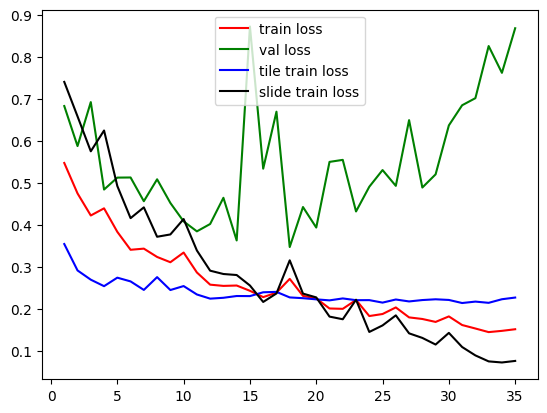

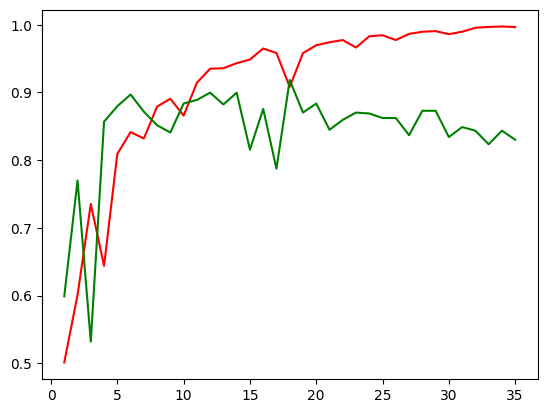

MixedMILModel(
  (reduction): Sequential(
    (0): Dropout(p=0.25, inplace=False)
    (1): Linear(in_features=2048, out_features=1024, bias=True)
    (2): ReLU()
  )
  (attention): AttentionLayer(
    (U): Linear(in_features=1024, out_features=512, bias=False)
    (V): Linear(in_features=1024, out_features=512, bias=False)
    (W): Linear(in_features=512, out_features=1, bias=False)
  )
  (slide_clf): Sequential(
    (0): Dropout(p=0.25, inplace=False)
    (1): Linear(in_features=1024, out_features=256, bias=True)
    (2): ReLU()
    (3): Dropout(p=0.25, inplace=False)
    (4): Linear(in_features=256, out_features=1, bias=True)
    (5): Sigmoid()
  )
  (tiles_clf): Sequential(
    (0): Dropout(p=0.25, inplace=False)
    (1): Linear(in_features=1024, out_features=1, bias=True)
    (2): Sigmoid()
  )
)


100%|██████████| 56/56 [00:01<00:00, 41.26it/s]


Epoch 1: train loss 0.551 train auc 0.578 tiles auc 0.795 val loss 0.628 val auc 0.777


100%|██████████| 56/56 [00:01<00:00, 36.97it/s]


Epoch 2: train loss 0.441 train auc 0.741 tiles auc 0.870 val loss 0.523 val auc 0.742


100%|██████████| 56/56 [00:01<00:00, 41.49it/s]


Epoch 3: train loss 0.387 train auc 0.808 tiles auc 0.895 val loss 0.489 val auc 0.739


100%|██████████| 56/56 [00:01<00:00, 41.68it/s]


Epoch 4: train loss 0.378 train auc 0.831 tiles auc 0.897 val loss 0.459 val auc 0.738


100%|██████████| 56/56 [00:01<00:00, 38.48it/s]


Epoch 5: train loss 0.348 train auc 0.854 tiles auc 0.901 val loss 0.586 val auc 0.758


100%|██████████| 56/56 [00:01<00:00, 42.07it/s]


Epoch 6: train loss 0.333 train auc 0.864 tiles auc 0.910 val loss 0.448 val auc 0.737


100%|██████████| 56/56 [00:01<00:00, 41.08it/s]


Epoch 7: train loss 0.353 train auc 0.851 tiles auc 0.899 val loss 0.491 val auc 0.749


100%|██████████| 56/56 [00:01<00:00, 41.73it/s]


Epoch 8: train loss 0.312 train auc 0.883 tiles auc 0.915 val loss 0.481 val auc 0.746


100%|██████████| 56/56 [00:01<00:00, 42.18it/s]


Epoch 9: train loss 0.322 train auc 0.876 tiles auc 0.910 val loss 0.458 val auc 0.735


100%|██████████| 56/56 [00:01<00:00, 37.03it/s]


Epoch 10: train loss 0.303 train auc 0.883 tiles auc 0.912 val loss 0.477 val auc 0.757


100%|██████████| 56/56 [00:01<00:00, 41.32it/s]


Epoch 11: train loss 0.275 train auc 0.929 tiles auc 0.913 val loss 0.514 val auc 0.750


100%|██████████| 56/56 [00:01<00:00, 41.88it/s]


Epoch 12: train loss 0.276 train auc 0.934 tiles auc 0.914 val loss 0.573 val auc 0.783


100%|██████████| 56/56 [00:01<00:00, 38.92it/s]


Epoch 13: train loss 0.256 train auc 0.940 tiles auc 0.917 val loss 0.664 val auc 0.743


100%|██████████| 56/56 [00:01<00:00, 42.46it/s]


Epoch 14: train loss 0.271 train auc 0.925 tiles auc 0.917 val loss 0.530 val auc 0.753


100%|██████████| 56/56 [00:01<00:00, 40.88it/s]


Epoch 15: train loss 0.245 train auc 0.961 tiles auc 0.916 val loss 0.650 val auc 0.761


100%|██████████| 56/56 [00:01<00:00, 41.51it/s]


Epoch 16: train loss 0.234 train auc 0.959 tiles auc 0.917 val loss 0.573 val auc 0.771


100%|██████████| 56/56 [00:01<00:00, 41.70it/s]


Epoch 17: train loss 0.268 train auc 0.947 tiles auc 0.914 val loss 0.702 val auc 0.754


100%|██████████| 56/56 [00:01<00:00, 37.39it/s]


Epoch 18: train loss 0.243 train auc 0.961 tiles auc 0.918 val loss 0.821 val auc 0.745


100%|██████████| 56/56 [00:01<00:00, 41.88it/s]


Epoch 19: train loss 0.245 train auc 0.955 tiles auc 0.918 val loss 0.703 val auc 0.741


100%|██████████| 56/56 [00:01<00:00, 39.80it/s]


Epoch 20: train loss 0.249 train auc 0.954 tiles auc 0.916 val loss 0.589 val auc 0.762


100%|██████████| 56/56 [00:01<00:00, 38.64it/s]


Epoch 21: train loss 0.193 train auc 0.983 tiles auc 0.920 val loss 0.749 val auc 0.745


100%|██████████| 56/56 [00:01<00:00, 42.60it/s]


Epoch 22: train loss 0.209 train auc 0.978 tiles auc 0.921 val loss 0.733 val auc 0.742


100%|██████████| 56/56 [00:01<00:00, 41.78it/s]


Epoch 23: train loss 0.192 train auc 0.982 tiles auc 0.924 val loss 0.829 val auc 0.801


100%|██████████| 56/56 [00:01<00:00, 41.73it/s]


Epoch 24: train loss 0.206 train auc 0.978 tiles auc 0.920 val loss 0.847 val auc 0.743


100%|██████████| 56/56 [00:01<00:00, 41.35it/s]


Epoch 25: train loss 0.172 train auc 0.989 tiles auc 0.921 val loss 0.812 val auc 0.789


100%|██████████| 56/56 [00:01<00:00, 37.44it/s]


Epoch 26: train loss 0.197 train auc 0.981 tiles auc 0.920 val loss 0.873 val auc 0.734


100%|██████████| 56/56 [00:01<00:00, 39.95it/s]


Epoch 27: train loss 0.187 train auc 0.986 tiles auc 0.918 val loss 0.924 val auc 0.758


100%|██████████| 56/56 [00:01<00:00, 42.12it/s]


Epoch 28: train loss 0.183 train auc 0.987 tiles auc 0.921 val loss 0.898 val auc 0.781


100%|██████████| 56/56 [00:01<00:00, 37.62it/s]


Epoch 29: train loss 0.191 train auc 0.978 tiles auc 0.922 val loss 0.902 val auc 0.753


100%|██████████| 56/56 [00:01<00:00, 41.57it/s]


Epoch 30: train loss 0.167 train auc 0.991 tiles auc 0.920 val loss 1.030 val auc 0.746


100%|██████████| 56/56 [00:01<00:00, 40.66it/s]


Epoch 31: train loss 0.156 train auc 0.996 tiles auc 0.927 val loss 1.032 val auc 0.747


100%|██████████| 56/56 [00:01<00:00, 41.85it/s]


Epoch 32: train loss 0.141 train auc 0.999 tiles auc 0.922 val loss 1.084 val auc 0.750


100%|██████████| 56/56 [00:01<00:00, 39.03it/s]


Epoch 33: train loss 0.155 train auc 0.996 tiles auc 0.924 val loss 1.159 val auc 0.751


100%|██████████| 56/56 [00:01<00:00, 37.54it/s]


Epoch 34: train loss 0.160 train auc 0.994 tiles auc 0.925 val loss 1.197 val auc 0.775


100%|██████████| 56/56 [00:01<00:00, 41.87it/s]


Epoch 35: train loss 0.155 train auc 0.996 tiles auc 0.924 val loss 1.104 val auc 0.761
Best auc: 0.801, last auc: 0.761, best epoch: 23


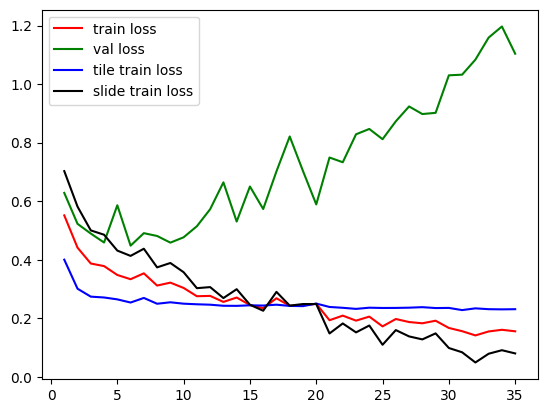

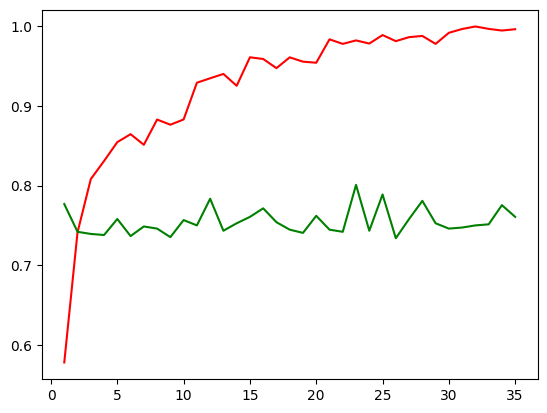

MixedMILModel(
  (reduction): Sequential(
    (0): Dropout(p=0.25, inplace=False)
    (1): Linear(in_features=2048, out_features=1024, bias=True)
    (2): ReLU()
  )
  (attention): AttentionLayer(
    (U): Linear(in_features=1024, out_features=512, bias=False)
    (V): Linear(in_features=1024, out_features=512, bias=False)
    (W): Linear(in_features=512, out_features=1, bias=False)
  )
  (slide_clf): Sequential(
    (0): Dropout(p=0.25, inplace=False)
    (1): Linear(in_features=1024, out_features=256, bias=True)
    (2): ReLU()
    (3): Dropout(p=0.25, inplace=False)
    (4): Linear(in_features=256, out_features=1, bias=True)
    (5): Sigmoid()
  )
  (tiles_clf): Sequential(
    (0): Dropout(p=0.25, inplace=False)
    (1): Linear(in_features=1024, out_features=1, bias=True)
    (2): Sigmoid()
  )
)


100%|██████████| 56/56 [00:01<00:00, 44.35it/s]


Epoch 1: train loss 0.575 train auc 0.450 tiles auc 0.761 val loss 0.663 val auc 0.746


100%|██████████| 56/56 [00:01<00:00, 39.16it/s]


Epoch 2: train loss 0.480 train auc 0.655 tiles auc 0.842 val loss 0.527 val auc 0.834


100%|██████████| 56/56 [00:01<00:00, 43.95it/s]


Epoch 3: train loss 0.383 train auc 0.823 tiles auc 0.891 val loss 0.430 val auc 0.858


100%|██████████| 56/56 [00:01<00:00, 44.35it/s]


Epoch 4: train loss 0.378 train auc 0.820 tiles auc 0.895 val loss 0.420 val auc 0.867


100%|██████████| 56/56 [00:01<00:00, 41.27it/s]


Epoch 5: train loss 0.367 train auc 0.837 tiles auc 0.895 val loss 0.755 val auc 0.837


100%|██████████| 56/56 [00:01<00:00, 44.58it/s]


Epoch 6: train loss 0.378 train auc 0.804 tiles auc 0.889 val loss 0.425 val auc 0.903


100%|██████████| 56/56 [00:01<00:00, 43.79it/s]


Epoch 7: train loss 0.352 train auc 0.830 tiles auc 0.904 val loss 0.403 val auc 0.895


100%|██████████| 56/56 [00:01<00:00, 44.51it/s]


Epoch 8: train loss 0.336 train auc 0.876 tiles auc 0.905 val loss 0.385 val auc 0.913


100%|██████████| 56/56 [00:01<00:00, 44.34it/s]


Epoch 9: train loss 0.321 train auc 0.871 tiles auc 0.902 val loss 0.447 val auc 0.903


100%|██████████| 56/56 [00:01<00:00, 40.25it/s]


Epoch 10: train loss 0.344 train auc 0.852 tiles auc 0.898 val loss 0.363 val auc 0.899


100%|██████████| 56/56 [00:01<00:00, 44.31it/s]


Epoch 11: train loss 0.286 train auc 0.936 tiles auc 0.914 val loss 0.429 val auc 0.889


100%|██████████| 56/56 [00:01<00:00, 44.45it/s]


Epoch 12: train loss 0.309 train auc 0.889 tiles auc 0.914 val loss 0.372 val auc 0.899


100%|██████████| 56/56 [00:01<00:00, 40.22it/s]


Epoch 13: train loss 0.281 train auc 0.904 tiles auc 0.915 val loss 0.397 val auc 0.909


100%|██████████| 56/56 [00:01<00:00, 41.74it/s]


Epoch 14: train loss 0.288 train auc 0.909 tiles auc 0.913 val loss 0.399 val auc 0.900


100%|██████████| 56/56 [00:01<00:00, 44.08it/s]


Epoch 15: train loss 0.287 train auc 0.910 tiles auc 0.912 val loss 0.366 val auc 0.910


100%|██████████| 56/56 [00:01<00:00, 44.37it/s]


Epoch 16: train loss 0.279 train auc 0.916 tiles auc 0.916 val loss 0.425 val auc 0.920


100%|██████████| 56/56 [00:01<00:00, 44.72it/s]


Epoch 17: train loss 0.293 train auc 0.914 tiles auc 0.912 val loss 0.402 val auc 0.889


100%|██████████| 56/56 [00:01<00:00, 39.84it/s]


Epoch 18: train loss 0.278 train auc 0.923 tiles auc 0.907 val loss 0.424 val auc 0.909


100%|██████████| 56/56 [00:01<00:00, 44.93it/s]


Epoch 19: train loss 0.257 train auc 0.940 tiles auc 0.913 val loss 0.427 val auc 0.903


100%|██████████| 56/56 [00:01<00:00, 43.93it/s]


Epoch 20: train loss 0.239 train auc 0.950 tiles auc 0.916 val loss 0.429 val auc 0.906


100%|██████████| 56/56 [00:01<00:00, 40.18it/s]


Epoch 21: train loss 0.240 train auc 0.956 tiles auc 0.920 val loss 0.425 val auc 0.908


100%|██████████| 56/56 [00:01<00:00, 44.55it/s]


Epoch 22: train loss 0.244 train auc 0.949 tiles auc 0.919 val loss 0.421 val auc 0.905


100%|██████████| 56/56 [00:01<00:00, 44.36it/s]


Epoch 23: train loss 0.226 train auc 0.965 tiles auc 0.922 val loss 0.438 val auc 0.914


100%|██████████| 56/56 [00:01<00:00, 42.08it/s]


Epoch 24: train loss 0.220 train auc 0.954 tiles auc 0.919 val loss 0.421 val auc 0.922


100%|██████████| 56/56 [00:01<00:00, 43.30it/s]


Epoch 25: train loss 0.206 train auc 0.984 tiles auc 0.921 val loss 0.469 val auc 0.931


100%|██████████| 56/56 [00:01<00:00, 44.71it/s]


Epoch 26: train loss 0.221 train auc 0.955 tiles auc 0.918 val loss 0.408 val auc 0.935


100%|██████████| 56/56 [00:01<00:00, 44.27it/s]


Epoch 27: train loss 0.195 train auc 0.980 tiles auc 0.920 val loss 0.460 val auc 0.931


100%|██████████| 56/56 [00:01<00:00, 43.91it/s]


Epoch 28: train loss 0.223 train auc 0.963 tiles auc 0.916 val loss 0.497 val auc 0.930


100%|██████████| 56/56 [00:01<00:00, 37.97it/s]


Epoch 29: train loss 0.219 train auc 0.966 tiles auc 0.921 val loss 0.413 val auc 0.937


100%|██████████| 56/56 [00:01<00:00, 43.28it/s]


Epoch 30: train loss 0.205 train auc 0.971 tiles auc 0.920 val loss 0.440 val auc 0.938


100%|██████████| 56/56 [00:01<00:00, 43.76it/s]


Epoch 31: train loss 0.172 train auc 0.991 tiles auc 0.923 val loss 0.467 val auc 0.910


100%|██████████| 56/56 [00:01<00:00, 39.24it/s]


Epoch 32: train loss 0.208 train auc 0.974 tiles auc 0.924 val loss 0.450 val auc 0.918


100%|██████████| 56/56 [00:01<00:00, 44.29it/s]


Epoch 33: train loss 0.207 train auc 0.970 tiles auc 0.923 val loss 0.452 val auc 0.925


100%|██████████| 56/56 [00:01<00:00, 43.92it/s]


Epoch 34: train loss 0.171 train auc 0.990 tiles auc 0.925 val loss 0.480 val auc 0.937


100%|██████████| 56/56 [00:01<00:00, 44.00it/s]


Epoch 35: train loss 0.201 train auc 0.976 tiles auc 0.923 val loss 0.437 val auc 0.931
Best auc: 0.938, last auc: 0.931, best epoch: 30


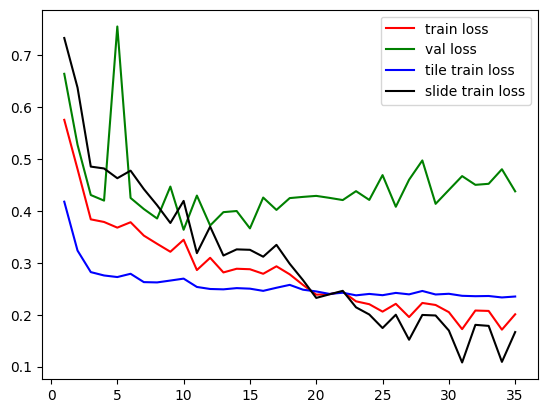

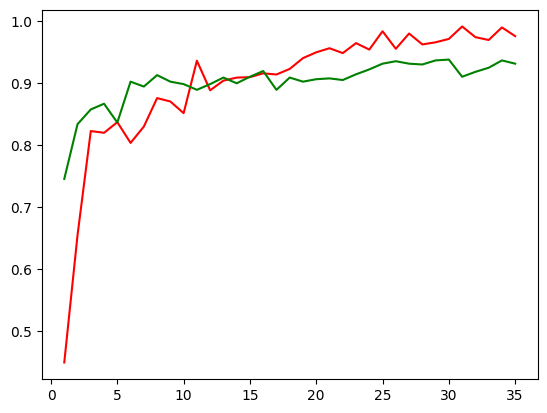

MixedMILModel(
  (reduction): Sequential(
    (0): Dropout(p=0.25, inplace=False)
    (1): Linear(in_features=2048, out_features=1024, bias=True)
    (2): ReLU()
  )
  (attention): AttentionLayer(
    (U): Linear(in_features=1024, out_features=512, bias=False)
    (V): Linear(in_features=1024, out_features=512, bias=False)
    (W): Linear(in_features=512, out_features=1, bias=False)
  )
  (slide_clf): Sequential(
    (0): Dropout(p=0.25, inplace=False)
    (1): Linear(in_features=1024, out_features=256, bias=True)
    (2): ReLU()
    (3): Dropout(p=0.25, inplace=False)
    (4): Linear(in_features=256, out_features=1, bias=True)
    (5): Sigmoid()
  )
  (tiles_clf): Sequential(
    (0): Dropout(p=0.25, inplace=False)
    (1): Linear(in_features=1024, out_features=1, bias=True)
    (2): Sigmoid()
  )
)


100%|██████████| 56/56 [00:01<00:00, 42.71it/s]


Epoch 1: train loss 0.543 train auc 0.523 tiles auc 0.811 val loss 0.582 val auc 0.871


100%|██████████| 56/56 [00:01<00:00, 41.87it/s]


Epoch 2: train loss 0.420 train auc 0.726 tiles auc 0.889 val loss 0.462 val auc 0.871


100%|██████████| 56/56 [00:01<00:00, 42.00it/s]


Epoch 3: train loss 0.404 train auc 0.781 tiles auc 0.892 val loss 0.467 val auc 0.855


100%|██████████| 56/56 [00:01<00:00, 42.44it/s]


Epoch 4: train loss 0.395 train auc 0.799 tiles auc 0.882 val loss 0.673 val auc 0.829


100%|██████████| 56/56 [00:01<00:00, 39.01it/s]


Epoch 5: train loss 0.356 train auc 0.814 tiles auc 0.901 val loss 0.406 val auc 0.870


100%|██████████| 56/56 [00:01<00:00, 42.84it/s]


Epoch 6: train loss 0.359 train auc 0.799 tiles auc 0.886 val loss 0.425 val auc 0.908


100%|██████████| 56/56 [00:01<00:00, 42.73it/s]


Epoch 7: train loss 0.346 train auc 0.858 tiles auc 0.895 val loss 0.469 val auc 0.899


100%|██████████| 56/56 [00:01<00:00, 38.56it/s]


Epoch 8: train loss 0.345 train auc 0.860 tiles auc 0.895 val loss 0.420 val auc 0.887


100%|██████████| 56/56 [00:01<00:00, 42.20it/s]


Epoch 9: train loss 0.322 train auc 0.859 tiles auc 0.909 val loss 0.497 val auc 0.880


100%|██████████| 56/56 [00:01<00:00, 42.99it/s]


Epoch 10: train loss 0.315 train auc 0.885 tiles auc 0.908 val loss 0.627 val auc 0.806


100%|██████████| 56/56 [00:01<00:00, 40.53it/s]


Epoch 11: train loss 0.325 train auc 0.886 tiles auc 0.904 val loss 0.596 val auc 0.845


100%|██████████| 56/56 [00:01<00:00, 42.85it/s]


Epoch 12: train loss 0.310 train auc 0.901 tiles auc 0.918 val loss 0.566 val auc 0.866


100%|██████████| 56/56 [00:01<00:00, 43.43it/s]


Epoch 13: train loss 0.275 train auc 0.904 tiles auc 0.923 val loss 0.587 val auc 0.860


100%|██████████| 56/56 [00:01<00:00, 42.60it/s]


Epoch 14: train loss 0.263 train auc 0.933 tiles auc 0.928 val loss 0.515 val auc 0.863


100%|██████████| 56/56 [00:01<00:00, 43.51it/s]


Epoch 15: train loss 0.273 train auc 0.944 tiles auc 0.922 val loss 0.499 val auc 0.892


100%|██████████| 56/56 [00:01<00:00, 37.94it/s]


Epoch 16: train loss 0.254 train auc 0.947 tiles auc 0.918 val loss 0.558 val auc 0.872


100%|██████████| 56/56 [00:01<00:00, 43.22it/s]


Epoch 17: train loss 0.250 train auc 0.939 tiles auc 0.920 val loss 0.538 val auc 0.877


100%|██████████| 56/56 [00:01<00:00, 43.05it/s]


Epoch 18: train loss 0.299 train auc 0.931 tiles auc 0.877 val loss 0.472 val auc 0.866


100%|██████████| 56/56 [00:01<00:00, 38.43it/s]


Epoch 19: train loss 0.305 train auc 0.936 tiles auc 0.866 val loss 0.601 val auc 0.901


100%|██████████| 56/56 [00:01<00:00, 42.97it/s]


Epoch 20: train loss 0.268 train auc 0.936 tiles auc 0.914 val loss 0.549 val auc 0.855


100%|██████████| 56/56 [00:01<00:00, 41.91it/s]


Epoch 21: train loss 0.238 train auc 0.950 tiles auc 0.929 val loss 0.535 val auc 0.859


100%|██████████| 56/56 [00:01<00:00, 42.69it/s]


Epoch 22: train loss 0.219 train auc 0.966 tiles auc 0.927 val loss 0.568 val auc 0.868


100%|██████████| 56/56 [00:01<00:00, 43.27it/s]


Epoch 23: train loss 0.212 train auc 0.967 tiles auc 0.932 val loss 0.637 val auc 0.868


100%|██████████| 56/56 [00:01<00:00, 40.44it/s]


Epoch 24: train loss 0.199 train auc 0.979 tiles auc 0.929 val loss 0.648 val auc 0.866


100%|██████████| 56/56 [00:01<00:00, 43.38it/s]


Epoch 25: train loss 0.198 train auc 0.979 tiles auc 0.929 val loss 0.637 val auc 0.859


100%|██████████| 56/56 [00:01<00:00, 43.58it/s]


Epoch 26: train loss 0.202 train auc 0.976 tiles auc 0.931 val loss 0.690 val auc 0.847


100%|██████████| 56/56 [00:01<00:00, 38.84it/s]


Epoch 27: train loss 0.195 train auc 0.969 tiles auc 0.932 val loss 0.763 val auc 0.843


100%|██████████| 56/56 [00:01<00:00, 41.27it/s]


Epoch 28: train loss 0.187 train auc 0.981 tiles auc 0.934 val loss 0.709 val auc 0.835


100%|██████████| 56/56 [00:01<00:00, 42.66it/s]


Epoch 29: train loss 0.205 train auc 0.974 tiles auc 0.934 val loss 0.693 val auc 0.827


100%|██████████| 56/56 [00:01<00:00, 40.22it/s]


Epoch 30: train loss 0.184 train auc 0.977 tiles auc 0.935 val loss 0.736 val auc 0.831


100%|██████████| 56/56 [00:01<00:00, 42.95it/s]


Epoch 31: train loss 0.175 train auc 0.987 tiles auc 0.935 val loss 0.763 val auc 0.837


100%|██████████| 56/56 [00:01<00:00, 44.11it/s]


Epoch 32: train loss 0.167 train auc 0.984 tiles auc 0.936 val loss 0.792 val auc 0.816


100%|██████████| 56/56 [00:01<00:00, 43.37it/s]


Epoch 33: train loss 0.174 train auc 0.981 tiles auc 0.936 val loss 0.829 val auc 0.808


100%|██████████| 56/56 [00:01<00:00, 42.71it/s]


Epoch 34: train loss 0.161 train auc 0.992 tiles auc 0.935 val loss 0.728 val auc 0.841


100%|██████████| 56/56 [00:01<00:00, 38.99it/s]


Epoch 35: train loss 0.160 train auc 0.993 tiles auc 0.937 val loss 0.771 val auc 0.839
Best auc: 0.908, last auc: 0.839, best epoch: 6


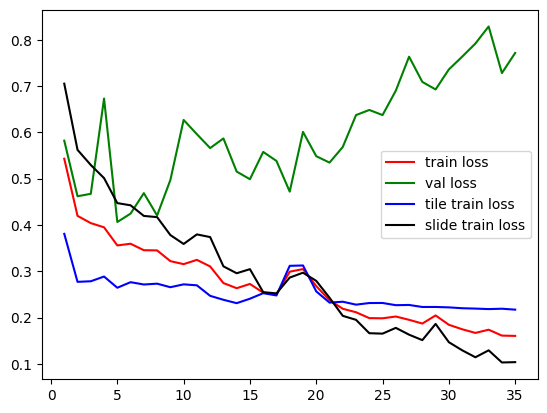

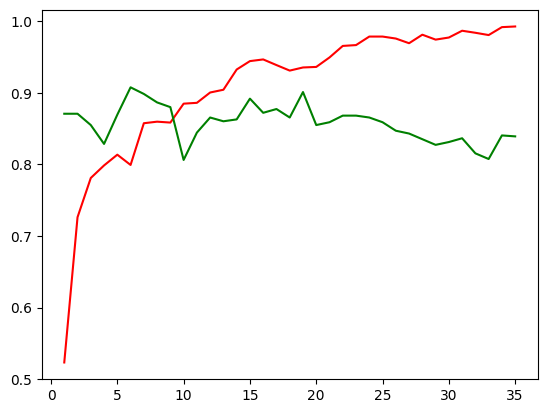

MixedMILModel(
  (reduction): Sequential(
    (0): Dropout(p=0.25, inplace=False)
    (1): Linear(in_features=2048, out_features=1024, bias=True)
    (2): ReLU()
  )
  (attention): AttentionLayer(
    (U): Linear(in_features=1024, out_features=512, bias=False)
    (V): Linear(in_features=1024, out_features=512, bias=False)
    (W): Linear(in_features=512, out_features=1, bias=False)
  )
  (slide_clf): Sequential(
    (0): Dropout(p=0.25, inplace=False)
    (1): Linear(in_features=1024, out_features=256, bias=True)
    (2): ReLU()
    (3): Dropout(p=0.25, inplace=False)
    (4): Linear(in_features=256, out_features=1, bias=True)
    (5): Sigmoid()
  )
  (tiles_clf): Sequential(
    (0): Dropout(p=0.25, inplace=False)
    (1): Linear(in_features=1024, out_features=1, bias=True)
    (2): Sigmoid()
  )
)


100%|██████████| 55/55 [00:01<00:00, 43.06it/s]


Epoch 1: train loss 0.542 train auc 0.512 tiles auc 0.782 val loss 0.631 val auc 0.755


100%|██████████| 55/55 [00:01<00:00, 43.32it/s]


Epoch 2: train loss 0.456 train auc 0.676 tiles auc 0.866 val loss 0.588 val auc 0.696


100%|██████████| 55/55 [00:01<00:00, 39.12it/s]


Epoch 3: train loss 0.447 train auc 0.654 tiles auc 0.876 val loss 0.578 val auc 0.716


100%|██████████| 55/55 [00:01<00:00, 43.54it/s]


Epoch 4: train loss 0.404 train auc 0.789 tiles auc 0.888 val loss 0.552 val auc 0.789


100%|██████████| 55/55 [00:01<00:00, 41.76it/s]


Epoch 5: train loss 0.344 train auc 0.845 tiles auc 0.904 val loss 0.555 val auc 0.781


100%|██████████| 55/55 [00:01<00:00, 38.83it/s]


Epoch 6: train loss 0.355 train auc 0.817 tiles auc 0.902 val loss 0.488 val auc 0.796


100%|██████████| 55/55 [00:01<00:00, 43.04it/s]


Epoch 7: train loss 0.358 train auc 0.812 tiles auc 0.913 val loss 0.555 val auc 0.828


100%|██████████| 55/55 [00:01<00:00, 43.60it/s]


Epoch 8: train loss 0.335 train auc 0.858 tiles auc 0.906 val loss 0.658 val auc 0.821


100%|██████████| 55/55 [00:01<00:00, 42.41it/s]


Epoch 9: train loss 0.349 train auc 0.834 tiles auc 0.914 val loss 0.495 val auc 0.864


100%|██████████| 55/55 [00:01<00:00, 43.25it/s]


Epoch 10: train loss 0.320 train auc 0.885 tiles auc 0.922 val loss 0.468 val auc 0.818


100%|██████████| 55/55 [00:01<00:00, 40.21it/s]


Epoch 11: train loss 0.298 train auc 0.898 tiles auc 0.920 val loss 0.532 val auc 0.839


100%|██████████| 55/55 [00:01<00:00, 42.94it/s]


Epoch 12: train loss 0.303 train auc 0.890 tiles auc 0.919 val loss 0.442 val auc 0.855


100%|██████████| 55/55 [00:01<00:00, 42.35it/s]


Epoch 13: train loss 0.294 train auc 0.899 tiles auc 0.922 val loss 0.488 val auc 0.829


100%|██████████| 55/55 [00:01<00:00, 39.23it/s]


Epoch 14: train loss 0.296 train auc 0.907 tiles auc 0.922 val loss 0.474 val auc 0.850


100%|██████████| 55/55 [00:01<00:00, 43.00it/s]


Epoch 15: train loss 0.283 train auc 0.908 tiles auc 0.917 val loss 0.563 val auc 0.840


100%|██████████| 55/55 [00:01<00:00, 43.85it/s]


Epoch 16: train loss 0.277 train auc 0.923 tiles auc 0.921 val loss 0.504 val auc 0.825


100%|██████████| 55/55 [00:01<00:00, 39.67it/s]


Epoch 17: train loss 0.272 train auc 0.915 tiles auc 0.927 val loss 0.571 val auc 0.821


100%|██████████| 55/55 [00:01<00:00, 42.62it/s]


Epoch 18: train loss 0.265 train auc 0.930 tiles auc 0.926 val loss 0.469 val auc 0.865


100%|██████████| 55/55 [00:01<00:00, 41.12it/s]


Epoch 19: train loss 0.274 train auc 0.922 tiles auc 0.926 val loss 0.430 val auc 0.869


100%|██████████| 55/55 [00:01<00:00, 43.44it/s]


Epoch 20: train loss 0.251 train auc 0.941 tiles auc 0.928 val loss 0.464 val auc 0.857


100%|██████████| 55/55 [00:01<00:00, 43.47it/s]


Epoch 21: train loss 0.246 train auc 0.943 tiles auc 0.931 val loss 0.530 val auc 0.862


100%|██████████| 55/55 [00:01<00:00, 39.60it/s]


Epoch 22: train loss 0.228 train auc 0.959 tiles auc 0.931 val loss 0.561 val auc 0.860


100%|██████████| 55/55 [00:01<00:00, 42.83it/s]


Epoch 23: train loss 0.222 train auc 0.953 tiles auc 0.935 val loss 0.566 val auc 0.843


100%|██████████| 55/55 [00:01<00:00, 43.77it/s]


Epoch 24: train loss 0.225 train auc 0.964 tiles auc 0.932 val loss 0.531 val auc 0.864


100%|██████████| 55/55 [00:01<00:00, 38.43it/s]


Epoch 25: train loss 0.217 train auc 0.960 tiles auc 0.932 val loss 0.557 val auc 0.866


100%|██████████| 55/55 [00:01<00:00, 43.03it/s]


Epoch 26: train loss 0.225 train auc 0.951 tiles auc 0.930 val loss 0.563 val auc 0.847


100%|██████████| 55/55 [00:01<00:00, 42.91it/s]


Epoch 27: train loss 0.223 train auc 0.965 tiles auc 0.928 val loss 0.578 val auc 0.836


100%|██████████| 55/55 [00:01<00:00, 40.72it/s]


Epoch 28: train loss 0.224 train auc 0.963 tiles auc 0.927 val loss 0.669 val auc 0.853


100%|██████████| 55/55 [00:01<00:00, 43.41it/s]


Epoch 29: train loss 0.214 train auc 0.968 tiles auc 0.928 val loss 0.542 val auc 0.866


100%|██████████| 55/55 [00:01<00:00, 43.18it/s]


Epoch 30: train loss 0.192 train auc 0.980 tiles auc 0.931 val loss 0.633 val auc 0.883


100%|██████████| 55/55 [00:01<00:00, 43.62it/s]


Epoch 31: train loss 0.190 train auc 0.975 tiles auc 0.930 val loss 0.638 val auc 0.864


100%|██████████| 55/55 [00:01<00:00, 43.27it/s]


Epoch 32: train loss 0.203 train auc 0.965 tiles auc 0.932 val loss 0.563 val auc 0.882


100%|██████████| 55/55 [00:01<00:00, 40.09it/s]


Epoch 33: train loss 0.185 train auc 0.983 tiles auc 0.932 val loss 0.586 val auc 0.865


100%|██████████| 55/55 [00:01<00:00, 40.68it/s]


Epoch 34: train loss 0.194 train auc 0.978 tiles auc 0.930 val loss 0.649 val auc 0.866


100%|██████████| 55/55 [00:01<00:00, 43.42it/s]


Epoch 35: train loss 0.184 train auc 0.984 tiles auc 0.932 val loss 0.702 val auc 0.861
Best auc: 0.883, last auc: 0.861, best epoch: 30


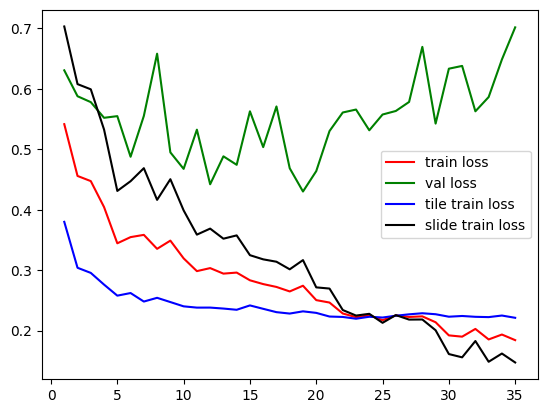

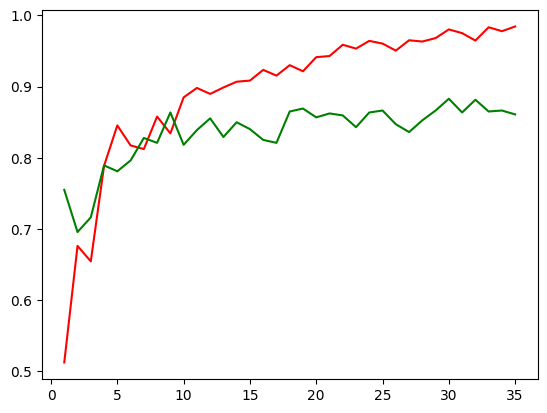

Best validation auc averaged over 5 folds: 0.890 (+- 0.048)
Last validation auc averaged over 5 folds: 0.845 (+- 0.055)
Best epochs:  [18, 23, 30, 6, 30]


In [ ]:
mixed_model = MixedMILModel(2048, 1024, 256, 512, ds=False, p=0.25)

make_cross_val(mixed_model, folds, n_epoch = 35, lr = 5e-4, step_size = 10)

MixedMILModel(
  (reduction): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=2048, out_features=1024, bias=True)
    (2): ReLU()
  )
  (attention): AttentionLayer(
    (U): Linear(in_features=1024, out_features=512, bias=False)
    (V): Linear(in_features=1024, out_features=512, bias=False)
    (W): Linear(in_features=512, out_features=1, bias=False)
  )
  (slide_clf): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=1024, out_features=256, bias=True)
    (2): ReLU()
    (3): Dropout(p=0.5, inplace=False)
    (4): Linear(in_features=256, out_features=1, bias=True)
    (5): Sigmoid()
  )
  (tiles_clf): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=1024, out_features=1, bias=True)
    (2): Sigmoid()
  )
)


100%|██████████| 56/56 [00:01<00:00, 39.99it/s]


Epoch 1: train loss 0.610 train auc 0.431 tiles auc 0.734 val loss 0.688 val auc 0.519


100%|██████████| 56/56 [00:01<00:00, 41.99it/s]


Epoch 2: train loss 0.469 train auc 0.623 tiles auc 0.860 val loss 0.551 val auc 0.651


100%|██████████| 56/56 [00:01<00:00, 39.01it/s]


Epoch 3: train loss 0.416 train auc 0.749 tiles auc 0.873 val loss 0.679 val auc 0.709


100%|██████████| 56/56 [00:01<00:00, 38.18it/s]


Epoch 4: train loss 0.410 train auc 0.758 tiles auc 0.878 val loss 0.587 val auc 0.660


100%|██████████| 56/56 [00:01<00:00, 41.24it/s]


Epoch 5: train loss 0.419 train auc 0.798 tiles auc 0.886 val loss 0.574 val auc 0.761


100%|██████████| 56/56 [00:01<00:00, 41.85it/s]


Epoch 6: train loss 0.410 train auc 0.785 tiles auc 0.885 val loss 0.557 val auc 0.755


100%|██████████| 56/56 [00:01<00:00, 38.23it/s]


Epoch 7: train loss 0.365 train auc 0.811 tiles auc 0.888 val loss 0.528 val auc 0.723


100%|██████████| 56/56 [00:01<00:00, 42.33it/s]


Epoch 8: train loss 0.404 train auc 0.775 tiles auc 0.882 val loss 0.540 val auc 0.709


100%|██████████| 56/56 [00:01<00:00, 40.97it/s]


Epoch 9: train loss 0.370 train auc 0.832 tiles auc 0.878 val loss 0.527 val auc 0.741


100%|██████████| 56/56 [00:01<00:00, 40.84it/s]


Epoch 10: train loss 0.423 train auc 0.717 tiles auc 0.890 val loss 0.517 val auc 0.671


100%|██████████| 56/56 [00:01<00:00, 42.09it/s]


Epoch 11: train loss 0.375 train auc 0.795 tiles auc 0.898 val loss 0.559 val auc 0.656


100%|██████████| 56/56 [00:01<00:00, 38.78it/s]


Epoch 12: train loss 0.359 train auc 0.807 tiles auc 0.899 val loss 0.594 val auc 0.670


100%|██████████| 56/56 [00:01<00:00, 42.65it/s]


Epoch 13: train loss 0.369 train auc 0.825 tiles auc 0.886 val loss 0.589 val auc 0.667


100%|██████████| 56/56 [00:01<00:00, 42.10it/s]


Epoch 14: train loss 0.367 train auc 0.820 tiles auc 0.887 val loss 0.603 val auc 0.660


100%|██████████| 56/56 [00:01<00:00, 37.94it/s]


Epoch 15: train loss 0.392 train auc 0.785 tiles auc 0.867 val loss 0.488 val auc 0.729


100%|██████████| 56/56 [00:01<00:00, 41.98it/s]


Epoch 16: train loss 0.363 train auc 0.828 tiles auc 0.897 val loss 0.587 val auc 0.675


100%|██████████| 56/56 [00:01<00:00, 41.96it/s]


Epoch 17: train loss 0.343 train auc 0.858 tiles auc 0.889 val loss 0.566 val auc 0.705


100%|██████████| 56/56 [00:01<00:00, 40.83it/s]


Epoch 18: train loss 0.355 train auc 0.844 tiles auc 0.893 val loss 0.505 val auc 0.707


100%|██████████| 56/56 [00:01<00:00, 41.50it/s]


Epoch 19: train loss 0.359 train auc 0.833 tiles auc 0.893 val loss 0.522 val auc 0.723


100%|██████████| 56/56 [00:01<00:00, 39.66it/s]


Epoch 20: train loss 0.340 train auc 0.871 tiles auc 0.888 val loss 0.535 val auc 0.757


100%|██████████| 56/56 [00:01<00:00, 41.91it/s]


Epoch 21: train loss 0.327 train auc 0.874 tiles auc 0.893 val loss 0.494 val auc 0.790


100%|██████████| 56/56 [00:01<00:00, 42.12it/s]


Epoch 22: train loss 0.316 train auc 0.894 tiles auc 0.896 val loss 0.533 val auc 0.781


100%|██████████| 56/56 [00:01<00:00, 38.28it/s]


Epoch 23: train loss 0.323 train auc 0.871 tiles auc 0.896 val loss 0.536 val auc 0.758


100%|██████████| 56/56 [00:01<00:00, 41.14it/s]


Epoch 24: train loss 0.339 train auc 0.839 tiles auc 0.905 val loss 0.532 val auc 0.781


100%|██████████| 56/56 [00:01<00:00, 42.26it/s]


Epoch 25: train loss 0.309 train auc 0.897 tiles auc 0.913 val loss 0.492 val auc 0.798


100%|██████████| 56/56 [00:01<00:00, 38.79it/s]


Epoch 26: train loss 0.342 train auc 0.855 tiles auc 0.900 val loss 0.604 val auc 0.763


100%|██████████| 56/56 [00:01<00:00, 42.01it/s]


Epoch 27: train loss 0.302 train auc 0.900 tiles auc 0.907 val loss 0.459 val auc 0.799


100%|██████████| 56/56 [00:01<00:00, 42.58it/s]


Epoch 28: train loss 0.307 train auc 0.903 tiles auc 0.908 val loss 0.546 val auc 0.770


100%|██████████| 56/56 [00:01<00:00, 42.42it/s]


Epoch 29: train loss 0.323 train auc 0.862 tiles auc 0.908 val loss 0.538 val auc 0.777


100%|██████████| 56/56 [00:01<00:00, 41.80it/s]


Epoch 30: train loss 0.300 train auc 0.909 tiles auc 0.908 val loss 0.581 val auc 0.759


100%|██████████| 56/56 [00:01<00:00, 38.18it/s]


Epoch 31: train loss 0.298 train auc 0.908 tiles auc 0.912 val loss 0.571 val auc 0.787


100%|██████████| 56/56 [00:01<00:00, 41.43it/s]


Epoch 32: train loss 0.295 train auc 0.906 tiles auc 0.914 val loss 0.607 val auc 0.755


100%|██████████| 56/56 [00:01<00:00, 42.43it/s]


Epoch 33: train loss 0.277 train auc 0.928 tiles auc 0.911 val loss 0.597 val auc 0.795


100%|██████████| 56/56 [00:01<00:00, 38.28it/s]


Epoch 34: train loss 0.278 train auc 0.923 tiles auc 0.916 val loss 0.562 val auc 0.787


100%|██████████| 56/56 [00:01<00:00, 42.49it/s]


Epoch 35: train loss 0.280 train auc 0.923 tiles auc 0.920 val loss 0.550 val auc 0.798
Best auc: 0.799, last auc: 0.798, best epoch: 27


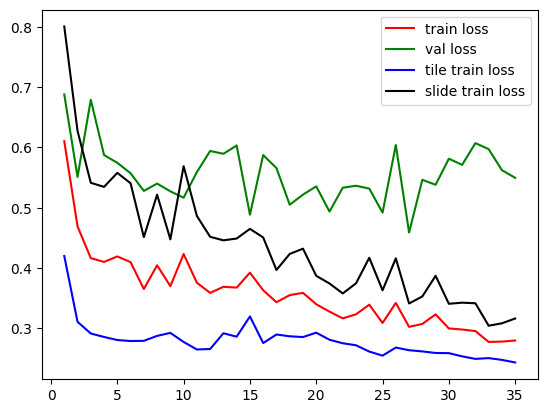

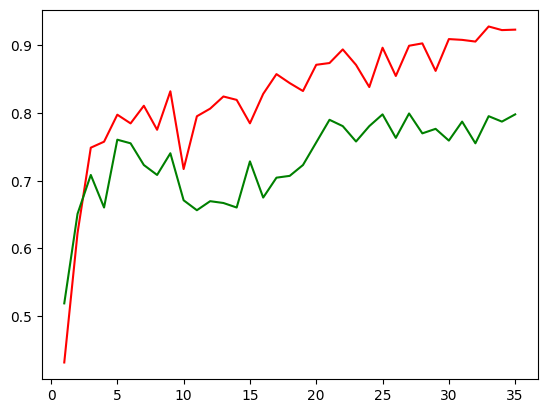

MixedMILModel(
  (reduction): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=2048, out_features=1024, bias=True)
    (2): ReLU()
  )
  (attention): AttentionLayer(
    (U): Linear(in_features=1024, out_features=512, bias=False)
    (V): Linear(in_features=1024, out_features=512, bias=False)
    (W): Linear(in_features=512, out_features=1, bias=False)
  )
  (slide_clf): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=1024, out_features=256, bias=True)
    (2): ReLU()
    (3): Dropout(p=0.5, inplace=False)
    (4): Linear(in_features=256, out_features=1, bias=True)
    (5): Sigmoid()
  )
  (tiles_clf): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=1024, out_features=1, bias=True)
    (2): Sigmoid()
  )
)


100%|██████████| 56/56 [00:01<00:00, 41.77it/s]


Epoch 1: train loss 0.593 train auc 0.481 tiles auc 0.751 val loss 0.669 val auc 0.552


100%|██████████| 56/56 [00:01<00:00, 37.98it/s]


Epoch 2: train loss 0.496 train auc 0.588 tiles auc 0.870 val loss 0.609 val auc 0.787


100%|██████████| 56/56 [00:01<00:00, 41.43it/s]


Epoch 3: train loss 0.461 train auc 0.695 tiles auc 0.883 val loss 0.538 val auc 0.746


100%|██████████| 56/56 [00:01<00:00, 38.57it/s]


Epoch 4: train loss 0.409 train auc 0.790 tiles auc 0.882 val loss 0.511 val auc 0.770


100%|██████████| 56/56 [00:01<00:00, 41.13it/s]


Epoch 5: train loss 0.387 train auc 0.779 tiles auc 0.901 val loss 0.571 val auc 0.750


100%|██████████| 56/56 [00:01<00:00, 41.34it/s]


Epoch 6: train loss 0.388 train auc 0.784 tiles auc 0.904 val loss 0.686 val auc 0.743


100%|██████████| 56/56 [00:01<00:00, 37.08it/s]


Epoch 7: train loss 0.383 train auc 0.815 tiles auc 0.918 val loss 0.449 val auc 0.782


100%|██████████| 56/56 [00:01<00:00, 41.88it/s]


Epoch 8: train loss 0.378 train auc 0.796 tiles auc 0.904 val loss 0.473 val auc 0.770


100%|██████████| 56/56 [00:01<00:00, 41.73it/s]


Epoch 9: train loss 0.366 train auc 0.826 tiles auc 0.916 val loss 0.474 val auc 0.789


100%|██████████| 56/56 [00:01<00:00, 39.85it/s]


Epoch 10: train loss 0.380 train auc 0.815 tiles auc 0.910 val loss 0.465 val auc 0.761


100%|██████████| 56/56 [00:01<00:00, 41.30it/s]


Epoch 11: train loss 0.339 train auc 0.852 tiles auc 0.924 val loss 0.446 val auc 0.774


100%|██████████| 56/56 [00:01<00:00, 38.45it/s]


Epoch 12: train loss 0.353 train auc 0.840 tiles auc 0.915 val loss 0.439 val auc 0.765


100%|██████████| 56/56 [00:01<00:00, 39.92it/s]


Epoch 13: train loss 0.343 train auc 0.858 tiles auc 0.912 val loss 0.492 val auc 0.739


100%|██████████| 56/56 [00:01<00:00, 41.23it/s]


Epoch 14: train loss 0.338 train auc 0.864 tiles auc 0.916 val loss 0.485 val auc 0.779


100%|██████████| 56/56 [00:01<00:00, 37.24it/s]


Epoch 15: train loss 0.337 train auc 0.867 tiles auc 0.917 val loss 0.464 val auc 0.785


100%|██████████| 56/56 [00:01<00:00, 41.71it/s]


Epoch 16: train loss 0.322 train auc 0.873 tiles auc 0.922 val loss 0.479 val auc 0.782


100%|██████████| 56/56 [00:01<00:00, 41.11it/s]


Epoch 17: train loss 0.301 train auc 0.895 tiles auc 0.921 val loss 0.631 val auc 0.723


100%|██████████| 56/56 [00:01<00:00, 39.34it/s]


Epoch 18: train loss 0.327 train auc 0.879 tiles auc 0.917 val loss 0.561 val auc 0.770


100%|██████████| 56/56 [00:01<00:00, 39.84it/s]


Epoch 19: train loss 0.319 train auc 0.888 tiles auc 0.917 val loss 0.853 val auc 0.666


100%|██████████| 56/56 [00:01<00:00, 41.22it/s]


Epoch 20: train loss 0.317 train auc 0.903 tiles auc 0.919 val loss 0.492 val auc 0.758


100%|██████████| 56/56 [00:01<00:00, 41.56it/s]


Epoch 21: train loss 0.313 train auc 0.891 tiles auc 0.927 val loss 0.531 val auc 0.746


100%|██████████| 56/56 [00:01<00:00, 41.50it/s]


Epoch 22: train loss 0.304 train auc 0.897 tiles auc 0.926 val loss 0.508 val auc 0.754


100%|██████████| 56/56 [00:01<00:00, 36.90it/s]


Epoch 23: train loss 0.284 train auc 0.914 tiles auc 0.924 val loss 0.515 val auc 0.754


100%|██████████| 56/56 [00:01<00:00, 41.66it/s]


Epoch 24: train loss 0.292 train auc 0.902 tiles auc 0.930 val loss 0.520 val auc 0.758


100%|██████████| 56/56 [00:01<00:00, 41.61it/s]


Epoch 25: train loss 0.317 train auc 0.897 tiles auc 0.927 val loss 0.486 val auc 0.789


100%|██████████| 56/56 [00:01<00:00, 38.27it/s]


Epoch 26: train loss 0.278 train auc 0.929 tiles auc 0.927 val loss 0.604 val auc 0.766


100%|██████████| 56/56 [00:01<00:00, 41.28it/s]


Epoch 27: train loss 0.303 train auc 0.899 tiles auc 0.925 val loss 0.546 val auc 0.787


100%|██████████| 56/56 [00:01<00:00, 40.85it/s]


Epoch 28: train loss 0.289 train auc 0.918 tiles auc 0.928 val loss 0.653 val auc 0.753


100%|██████████| 56/56 [00:01<00:00, 41.22it/s]


Epoch 29: train loss 0.267 train auc 0.944 tiles auc 0.925 val loss 0.585 val auc 0.801


100%|██████████| 56/56 [00:01<00:00, 41.57it/s]


Epoch 30: train loss 0.304 train auc 0.905 tiles auc 0.921 val loss 0.549 val auc 0.802


100%|██████████| 56/56 [00:01<00:00, 38.89it/s]


Epoch 31: train loss 0.264 train auc 0.944 tiles auc 0.923 val loss 0.606 val auc 0.789


100%|██████████| 56/56 [00:01<00:00, 40.24it/s]


Epoch 32: train loss 0.296 train auc 0.912 tiles auc 0.922 val loss 0.557 val auc 0.801


100%|██████████| 56/56 [00:01<00:00, 41.29it/s]


Epoch 33: train loss 0.272 train auc 0.934 tiles auc 0.926 val loss 0.521 val auc 0.807


100%|██████████| 56/56 [00:01<00:00, 36.77it/s]


Epoch 34: train loss 0.246 train auc 0.953 tiles auc 0.930 val loss 0.557 val auc 0.826


100%|██████████| 56/56 [00:01<00:00, 41.40it/s]


Epoch 35: train loss 0.275 train auc 0.927 tiles auc 0.926 val loss 0.666 val auc 0.765
Best auc: 0.826, last auc: 0.765, best epoch: 34


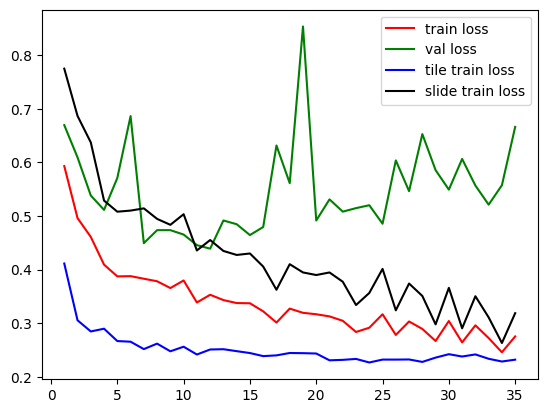

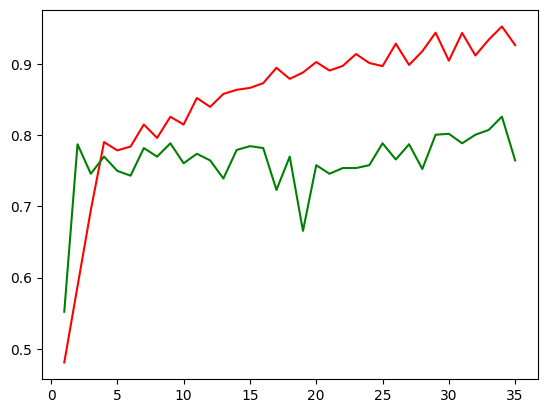

MixedMILModel(
  (reduction): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=2048, out_features=1024, bias=True)
    (2): ReLU()
  )
  (attention): AttentionLayer(
    (U): Linear(in_features=1024, out_features=512, bias=False)
    (V): Linear(in_features=1024, out_features=512, bias=False)
    (W): Linear(in_features=512, out_features=1, bias=False)
  )
  (slide_clf): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=1024, out_features=256, bias=True)
    (2): ReLU()
    (3): Dropout(p=0.5, inplace=False)
    (4): Linear(in_features=256, out_features=1, bias=True)
    (5): Sigmoid()
  )
  (tiles_clf): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=1024, out_features=1, bias=True)
    (2): Sigmoid()
  )
)


100%|██████████| 56/56 [00:01<00:00, 43.92it/s]


Epoch 1: train loss 0.603 train auc 0.518 tiles auc 0.755 val loss 0.695 val auc 0.631


100%|██████████| 56/56 [00:01<00:00, 39.76it/s]


Epoch 2: train loss 0.499 train auc 0.554 tiles auc 0.829 val loss 0.500 val auc 0.862


100%|██████████| 56/56 [00:01<00:00, 44.14it/s]


Epoch 3: train loss 0.443 train auc 0.698 tiles auc 0.879 val loss 0.470 val auc 0.872


100%|██████████| 56/56 [00:01<00:00, 44.05it/s]


Epoch 4: train loss 0.413 train auc 0.743 tiles auc 0.888 val loss 0.447 val auc 0.868


100%|██████████| 56/56 [00:01<00:00, 40.42it/s]


Epoch 5: train loss 0.422 train auc 0.756 tiles auc 0.873 val loss 0.440 val auc 0.881


100%|██████████| 56/56 [00:01<00:00, 44.03it/s]


Epoch 6: train loss 0.397 train auc 0.762 tiles auc 0.892 val loss 0.449 val auc 0.870


100%|██████████| 56/56 [00:01<00:00, 41.39it/s]


Epoch 7: train loss 0.381 train auc 0.782 tiles auc 0.890 val loss 0.495 val auc 0.895


100%|██████████| 56/56 [00:01<00:00, 43.59it/s]


Epoch 8: train loss 0.384 train auc 0.813 tiles auc 0.900 val loss 0.434 val auc 0.866


100%|██████████| 56/56 [00:01<00:00, 43.17it/s]


Epoch 9: train loss 0.390 train auc 0.747 tiles auc 0.898 val loss 0.433 val auc 0.913


100%|██████████| 56/56 [00:01<00:00, 39.67it/s]


Epoch 10: train loss 0.392 train auc 0.768 tiles auc 0.890 val loss 0.445 val auc 0.888


100%|██████████| 56/56 [00:01<00:00, 44.08it/s]


Epoch 11: train loss 0.372 train auc 0.784 tiles auc 0.903 val loss 0.432 val auc 0.854


100%|██████████| 56/56 [00:01<00:00, 43.64it/s]


Epoch 12: train loss 0.326 train auc 0.859 tiles auc 0.909 val loss 0.471 val auc 0.862


100%|██████████| 56/56 [00:01<00:00, 40.25it/s]


Epoch 13: train loss 0.347 train auc 0.855 tiles auc 0.906 val loss 0.411 val auc 0.908


100%|██████████| 56/56 [00:01<00:00, 43.70it/s]


Epoch 14: train loss 0.326 train auc 0.865 tiles auc 0.909 val loss 0.413 val auc 0.904


100%|██████████| 56/56 [00:01<00:00, 42.16it/s]


Epoch 15: train loss 0.355 train auc 0.807 tiles auc 0.911 val loss 0.415 val auc 0.899


100%|██████████| 56/56 [00:01<00:00, 41.92it/s]


Epoch 16: train loss 0.318 train auc 0.872 tiles auc 0.909 val loss 0.429 val auc 0.892


100%|██████████| 56/56 [00:01<00:00, 43.85it/s]


Epoch 17: train loss 0.348 train auc 0.843 tiles auc 0.907 val loss 0.420 val auc 0.868


100%|██████████| 56/56 [00:01<00:00, 41.14it/s]


Epoch 18: train loss 0.304 train auc 0.896 tiles auc 0.910 val loss 0.431 val auc 0.912


100%|██████████| 56/56 [00:01<00:00, 44.59it/s]


Epoch 19: train loss 0.311 train auc 0.896 tiles auc 0.911 val loss 0.371 val auc 0.914


100%|██████████| 56/56 [00:01<00:00, 42.74it/s]


Epoch 20: train loss 0.341 train auc 0.839 tiles auc 0.907 val loss 0.404 val auc 0.904


100%|██████████| 56/56 [00:01<00:00, 39.58it/s]


Epoch 21: train loss 0.332 train auc 0.841 tiles auc 0.914 val loss 0.403 val auc 0.910


100%|██████████| 56/56 [00:01<00:00, 43.71it/s]


Epoch 22: train loss 0.306 train auc 0.875 tiles auc 0.915 val loss 0.396 val auc 0.904


100%|██████████| 56/56 [00:01<00:00, 43.70it/s]


Epoch 23: train loss 0.320 train auc 0.869 tiles auc 0.908 val loss 0.427 val auc 0.874


100%|██████████| 56/56 [00:01<00:00, 39.45it/s]


Epoch 24: train loss 0.310 train auc 0.898 tiles auc 0.901 val loss 0.431 val auc 0.860


100%|██████████| 56/56 [00:01<00:00, 43.89it/s]


Epoch 25: train loss 0.319 train auc 0.899 tiles auc 0.907 val loss 0.486 val auc 0.856


100%|██████████| 56/56 [00:01<00:00, 44.35it/s]


Epoch 26: train loss 0.298 train auc 0.909 tiles auc 0.917 val loss 0.416 val auc 0.875


100%|██████████| 56/56 [00:01<00:00, 43.71it/s]


Epoch 27: train loss 0.307 train auc 0.876 tiles auc 0.908 val loss 0.422 val auc 0.889


100%|██████████| 56/56 [00:01<00:00, 41.79it/s]


Epoch 28: train loss 0.306 train auc 0.899 tiles auc 0.912 val loss 0.414 val auc 0.884


100%|██████████| 56/56 [00:01<00:00, 42.06it/s]


Epoch 29: train loss 0.311 train auc 0.868 tiles auc 0.911 val loss 0.451 val auc 0.883


100%|██████████| 56/56 [00:01<00:00, 43.12it/s]


Epoch 30: train loss 0.274 train auc 0.931 tiles auc 0.906 val loss 0.424 val auc 0.867


100%|██████████| 56/56 [00:01<00:00, 42.34it/s]


Epoch 31: train loss 0.268 train auc 0.943 tiles auc 0.907 val loss 0.404 val auc 0.872


100%|██████████| 56/56 [00:01<00:00, 38.81it/s]


Epoch 32: train loss 0.295 train auc 0.903 tiles auc 0.908 val loss 0.443 val auc 0.846


100%|██████████| 56/56 [00:01<00:00, 44.29it/s]


Epoch 33: train loss 0.293 train auc 0.909 tiles auc 0.908 val loss 0.495 val auc 0.825


100%|██████████| 56/56 [00:01<00:00, 43.50it/s]


Epoch 34: train loss 0.247 train auc 0.944 tiles auc 0.907 val loss 0.493 val auc 0.833


100%|██████████| 56/56 [00:01<00:00, 37.88it/s]


Epoch 35: train loss 0.274 train auc 0.920 tiles auc 0.910 val loss 0.411 val auc 0.870
Best auc: 0.914, last auc: 0.870, best epoch: 19


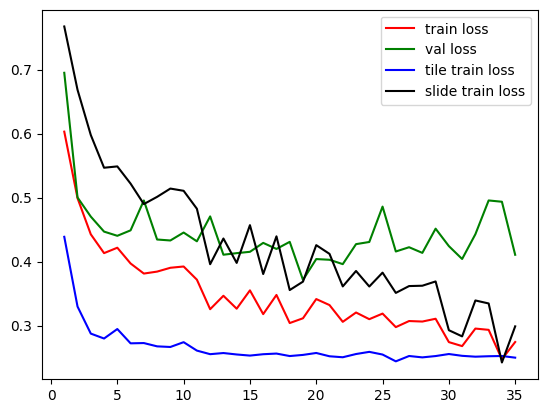

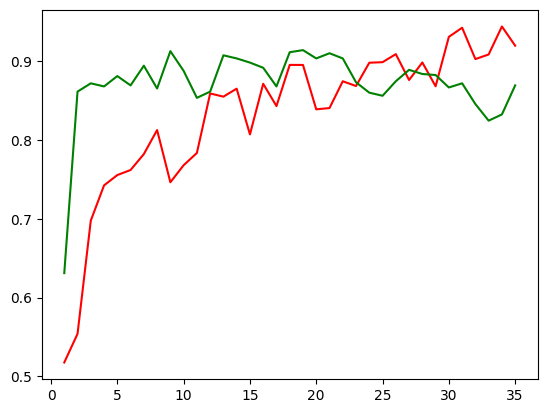

MixedMILModel(
  (reduction): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=2048, out_features=1024, bias=True)
    (2): ReLU()
  )
  (attention): AttentionLayer(
    (U): Linear(in_features=1024, out_features=512, bias=False)
    (V): Linear(in_features=1024, out_features=512, bias=False)
    (W): Linear(in_features=512, out_features=1, bias=False)
  )
  (slide_clf): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=1024, out_features=256, bias=True)
    (2): ReLU()
    (3): Dropout(p=0.5, inplace=False)
    (4): Linear(in_features=256, out_features=1, bias=True)
    (5): Sigmoid()
  )
  (tiles_clf): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=1024, out_features=1, bias=True)
    (2): Sigmoid()
  )
)


100%|██████████| 56/56 [00:01<00:00, 42.87it/s]


Epoch 1: train loss 0.572 train auc 0.533 tiles auc 0.788 val loss 0.600 val auc 0.785


100%|██████████| 56/56 [00:01<00:00, 42.95it/s]


Epoch 2: train loss 0.472 train auc 0.665 tiles auc 0.887 val loss 0.489 val auc 0.837


100%|██████████| 56/56 [00:01<00:00, 39.61it/s]


Epoch 3: train loss 0.425 train auc 0.735 tiles auc 0.896 val loss 0.491 val auc 0.823


100%|██████████| 56/56 [00:01<00:00, 42.92it/s]


Epoch 4: train loss 0.410 train auc 0.766 tiles auc 0.905 val loss 0.488 val auc 0.791


100%|██████████| 56/56 [00:01<00:00, 41.31it/s]


Epoch 5: train loss 0.394 train auc 0.749 tiles auc 0.912 val loss 0.514 val auc 0.792


100%|██████████| 56/56 [00:01<00:00, 42.45it/s]


Epoch 6: train loss 0.370 train auc 0.807 tiles auc 0.918 val loss 0.494 val auc 0.856


100%|██████████| 56/56 [00:01<00:00, 42.43it/s]


Epoch 7: train loss 0.372 train auc 0.838 tiles auc 0.905 val loss 0.470 val auc 0.814


100%|██████████| 56/56 [00:01<00:00, 38.19it/s]


Epoch 8: train loss 0.373 train auc 0.812 tiles auc 0.910 val loss 0.415 val auc 0.863


100%|██████████| 56/56 [00:01<00:00, 42.64it/s]


Epoch 9: train loss 0.400 train auc 0.792 tiles auc 0.909 val loss 0.451 val auc 0.843


100%|██████████| 56/56 [00:01<00:00, 42.81it/s]


Epoch 10: train loss 0.369 train auc 0.823 tiles auc 0.909 val loss 0.504 val auc 0.872


100%|██████████| 56/56 [00:01<00:00, 37.39it/s]


Epoch 11: train loss 0.355 train auc 0.822 tiles auc 0.912 val loss 0.412 val auc 0.908


100%|██████████| 56/56 [00:01<00:00, 42.88it/s]


Epoch 12: train loss 0.345 train auc 0.828 tiles auc 0.917 val loss 0.515 val auc 0.895


100%|██████████| 56/56 [00:01<00:00, 43.58it/s]


Epoch 13: train loss 0.349 train auc 0.818 tiles auc 0.912 val loss 0.458 val auc 0.859


100%|██████████| 56/56 [00:01<00:00, 41.23it/s]


Epoch 14: train loss 0.351 train auc 0.823 tiles auc 0.916 val loss 0.629 val auc 0.855


100%|██████████| 56/56 [00:01<00:00, 42.71it/s]


Epoch 15: train loss 0.346 train auc 0.846 tiles auc 0.919 val loss 0.430 val auc 0.866


100%|██████████| 56/56 [00:01<00:00, 41.37it/s]


Epoch 16: train loss 0.329 train auc 0.876 tiles auc 0.917 val loss 0.500 val auc 0.891


100%|██████████| 56/56 [00:01<00:00, 42.57it/s]


Epoch 17: train loss 0.344 train auc 0.830 tiles auc 0.916 val loss 0.422 val auc 0.897


100%|██████████| 56/56 [00:01<00:00, 39.36it/s]


Epoch 18: train loss 0.333 train auc 0.863 tiles auc 0.920 val loss 0.470 val auc 0.924


100%|██████████| 56/56 [00:01<00:00, 37.56it/s]


Epoch 19: train loss 0.337 train auc 0.845 tiles auc 0.919 val loss 0.453 val auc 0.903


100%|██████████| 56/56 [00:01<00:00, 42.31it/s]


Epoch 20: train loss 0.331 train auc 0.863 tiles auc 0.919 val loss 0.503 val auc 0.884


100%|██████████| 56/56 [00:01<00:00, 42.41it/s]


Epoch 21: train loss 0.288 train auc 0.907 tiles auc 0.921 val loss 0.464 val auc 0.893


100%|██████████| 56/56 [00:01<00:00, 36.93it/s]


Epoch 22: train loss 0.336 train auc 0.839 tiles auc 0.923 val loss 0.500 val auc 0.852


100%|██████████| 56/56 [00:01<00:00, 43.04it/s]


Epoch 23: train loss 0.278 train auc 0.924 tiles auc 0.925 val loss 0.504 val auc 0.896


100%|██████████| 56/56 [00:01<00:00, 42.85it/s]


Epoch 24: train loss 0.314 train auc 0.876 tiles auc 0.925 val loss 0.484 val auc 0.876


100%|██████████| 56/56 [00:01<00:00, 40.02it/s]


Epoch 25: train loss 0.291 train auc 0.893 tiles auc 0.924 val loss 0.509 val auc 0.879


100%|██████████| 56/56 [00:01<00:00, 41.75it/s]


Epoch 26: train loss 0.291 train auc 0.907 tiles auc 0.922 val loss 0.489 val auc 0.891


100%|██████████| 56/56 [00:01<00:00, 41.70it/s]


Epoch 27: train loss 0.276 train auc 0.915 tiles auc 0.925 val loss 0.512 val auc 0.897


100%|██████████| 56/56 [00:01<00:00, 42.17it/s]


Epoch 28: train loss 0.284 train auc 0.911 tiles auc 0.927 val loss 0.539 val auc 0.895


100%|██████████| 56/56 [00:01<00:00, 42.12it/s]


Epoch 29: train loss 0.286 train auc 0.900 tiles auc 0.925 val loss 0.480 val auc 0.863


100%|██████████| 56/56 [00:01<00:00, 39.90it/s]


Epoch 30: train loss 0.291 train auc 0.900 tiles auc 0.917 val loss 0.563 val auc 0.897


100%|██████████| 56/56 [00:01<00:00, 42.64it/s]


Epoch 31: train loss 0.263 train auc 0.935 tiles auc 0.927 val loss 0.494 val auc 0.900


100%|██████████| 56/56 [00:01<00:00, 41.39it/s]


Epoch 32: train loss 0.289 train auc 0.911 tiles auc 0.927 val loss 0.489 val auc 0.896


100%|██████████| 56/56 [00:01<00:00, 37.29it/s]


Epoch 33: train loss 0.283 train auc 0.918 tiles auc 0.927 val loss 0.457 val auc 0.903


100%|██████████| 56/56 [00:01<00:00, 43.13it/s]


Epoch 34: train loss 0.263 train auc 0.931 tiles auc 0.927 val loss 0.484 val auc 0.896


100%|██████████| 56/56 [00:01<00:00, 42.57it/s]


Epoch 35: train loss 0.264 train auc 0.932 tiles auc 0.927 val loss 0.475 val auc 0.893
Best auc: 0.924, last auc: 0.893, best epoch: 18


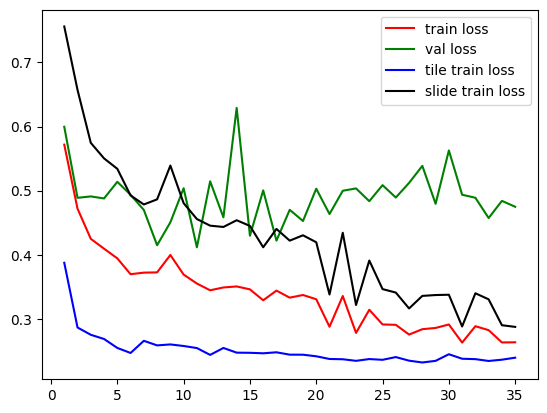

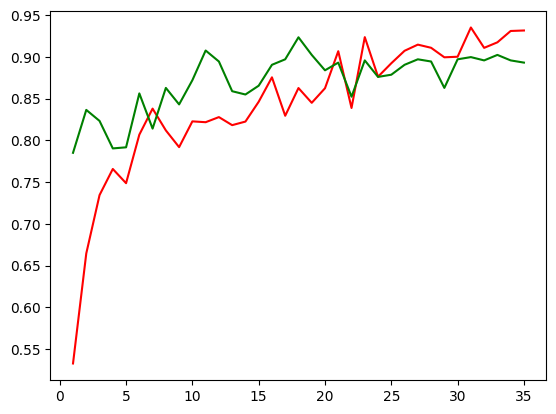

MixedMILModel(
  (reduction): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=2048, out_features=1024, bias=True)
    (2): ReLU()
  )
  (attention): AttentionLayer(
    (U): Linear(in_features=1024, out_features=512, bias=False)
    (V): Linear(in_features=1024, out_features=512, bias=False)
    (W): Linear(in_features=512, out_features=1, bias=False)
  )
  (slide_clf): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=1024, out_features=256, bias=True)
    (2): ReLU()
    (3): Dropout(p=0.5, inplace=False)
    (4): Linear(in_features=256, out_features=1, bias=True)
    (5): Sigmoid()
  )
  (tiles_clf): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=1024, out_features=1, bias=True)
    (2): Sigmoid()
  )
)


100%|██████████| 55/55 [00:01<00:00, 38.71it/s]


Epoch 1: train loss 0.571 train auc 0.513 tiles auc 0.790 val loss 0.742 val auc 0.558


100%|██████████| 55/55 [00:01<00:00, 41.75it/s]


Epoch 2: train loss 0.473 train auc 0.650 tiles auc 0.880 val loss 0.592 val auc 0.708


100%|██████████| 55/55 [00:01<00:00, 42.13it/s]


Epoch 3: train loss 0.415 train auc 0.753 tiles auc 0.894 val loss 0.525 val auc 0.773


100%|██████████| 55/55 [00:01<00:00, 38.62it/s]


Epoch 4: train loss 0.418 train auc 0.790 tiles auc 0.890 val loss 0.549 val auc 0.730


100%|██████████| 55/55 [00:01<00:00, 41.82it/s]


Epoch 5: train loss 0.405 train auc 0.775 tiles auc 0.900 val loss 0.522 val auc 0.752


100%|██████████| 55/55 [00:01<00:00, 39.04it/s]


Epoch 6: train loss 0.384 train auc 0.801 tiles auc 0.906 val loss 0.504 val auc 0.738


100%|██████████| 55/55 [00:01<00:00, 42.47it/s]


Epoch 7: train loss 0.390 train auc 0.782 tiles auc 0.901 val loss 0.556 val auc 0.737


100%|██████████| 55/55 [00:01<00:00, 42.34it/s]


Epoch 8: train loss 0.382 train auc 0.797 tiles auc 0.892 val loss 0.508 val auc 0.793


100%|██████████| 55/55 [00:01<00:00, 40.98it/s]


Epoch 9: train loss 0.370 train auc 0.827 tiles auc 0.906 val loss 0.516 val auc 0.775


100%|██████████| 55/55 [00:01<00:00, 41.76it/s]


Epoch 10: train loss 0.378 train auc 0.800 tiles auc 0.904 val loss 0.525 val auc 0.800


100%|██████████| 55/55 [00:01<00:00, 42.11it/s]


Epoch 11: train loss 0.352 train auc 0.806 tiles auc 0.915 val loss 0.485 val auc 0.752


100%|██████████| 55/55 [00:01<00:00, 38.72it/s]


Epoch 12: train loss 0.366 train auc 0.829 tiles auc 0.897 val loss 0.494 val auc 0.774


100%|██████████| 55/55 [00:01<00:00, 43.27it/s]


Epoch 13: train loss 0.335 train auc 0.866 tiles auc 0.907 val loss 0.477 val auc 0.806


100%|██████████| 55/55 [00:01<00:00, 42.51it/s]


Epoch 14: train loss 0.327 train auc 0.848 tiles auc 0.914 val loss 0.506 val auc 0.716


100%|██████████| 55/55 [00:01<00:00, 38.29it/s]


Epoch 15: train loss 0.332 train auc 0.872 tiles auc 0.912 val loss 0.779 val auc 0.763


100%|██████████| 55/55 [00:01<00:00, 42.68it/s]


Epoch 16: train loss 0.333 train auc 0.875 tiles auc 0.913 val loss 0.489 val auc 0.832


100%|██████████| 55/55 [00:01<00:00, 43.17it/s]


Epoch 17: train loss 0.345 train auc 0.859 tiles auc 0.913 val loss 0.481 val auc 0.828


100%|██████████| 55/55 [00:01<00:00, 40.07it/s]


Epoch 18: train loss 0.333 train auc 0.858 tiles auc 0.913 val loss 0.605 val auc 0.726


100%|██████████| 55/55 [00:01<00:00, 41.69it/s]


Epoch 19: train loss 0.323 train auc 0.874 tiles auc 0.913 val loss 0.495 val auc 0.792


100%|██████████| 55/55 [00:01<00:00, 43.48it/s]


Epoch 20: train loss 0.324 train auc 0.870 tiles auc 0.920 val loss 0.460 val auc 0.835


100%|██████████| 55/55 [00:01<00:00, 41.84it/s]


Epoch 21: train loss 0.317 train auc 0.871 tiles auc 0.922 val loss 0.478 val auc 0.811


100%|██████████| 55/55 [00:01<00:00, 41.93it/s]


Epoch 22: train loss 0.322 train auc 0.864 tiles auc 0.923 val loss 0.487 val auc 0.800


100%|██████████| 55/55 [00:01<00:00, 40.59it/s]


Epoch 23: train loss 0.298 train auc 0.902 tiles auc 0.922 val loss 0.608 val auc 0.792


100%|██████████| 55/55 [00:01<00:00, 42.59it/s]


Epoch 24: train loss 0.309 train auc 0.884 tiles auc 0.924 val loss 0.472 val auc 0.813


100%|██████████| 55/55 [00:01<00:00, 43.26it/s]


Epoch 25: train loss 0.288 train auc 0.893 tiles auc 0.925 val loss 0.469 val auc 0.818


100%|██████████| 55/55 [00:01<00:00, 38.40it/s]


Epoch 26: train loss 0.289 train auc 0.913 tiles auc 0.927 val loss 0.441 val auc 0.826


100%|██████████| 55/55 [00:01<00:00, 42.99it/s]


Epoch 27: train loss 0.317 train auc 0.879 tiles auc 0.926 val loss 0.444 val auc 0.836


100%|██████████| 55/55 [00:01<00:00, 41.28it/s]


Epoch 28: train loss 0.282 train auc 0.911 tiles auc 0.928 val loss 0.475 val auc 0.836


100%|██████████| 55/55 [00:01<00:00, 37.74it/s]


Epoch 29: train loss 0.303 train auc 0.891 tiles auc 0.927 val loss 0.591 val auc 0.775


100%|██████████| 55/55 [00:01<00:00, 43.06it/s]


Epoch 30: train loss 0.277 train auc 0.920 tiles auc 0.926 val loss 0.498 val auc 0.796


100%|██████████| 55/55 [00:01<00:00, 43.07it/s]


Epoch 31: train loss 0.292 train auc 0.900 tiles auc 0.928 val loss 0.492 val auc 0.803


100%|██████████| 55/55 [00:01<00:00, 39.50it/s]


Epoch 32: train loss 0.264 train auc 0.931 tiles auc 0.929 val loss 0.555 val auc 0.820


100%|██████████| 55/55 [00:01<00:00, 43.28it/s]


Epoch 33: train loss 0.277 train auc 0.928 tiles auc 0.928 val loss 0.511 val auc 0.839


100%|██████████| 55/55 [00:01<00:00, 43.37it/s]


Epoch 34: train loss 0.312 train auc 0.896 tiles auc 0.928 val loss 0.488 val auc 0.843


100%|██████████| 55/55 [00:01<00:00, 43.63it/s]


Epoch 35: train loss 0.260 train auc 0.934 tiles auc 0.928 val loss 0.461 val auc 0.868
Best auc: 0.868, last auc: 0.868, best epoch: 35


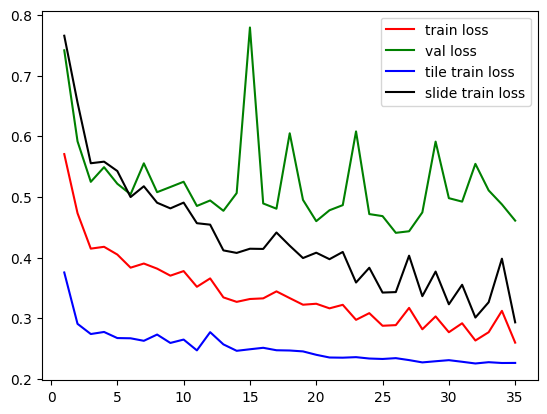

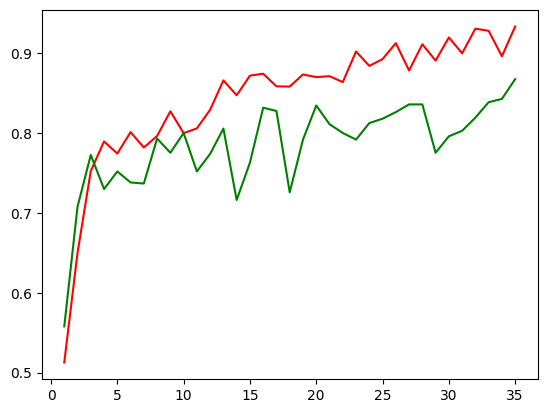

Best validation auc averaged over 5 folds: 0.866 (+- 0.048)
Last validation auc averaged over 5 folds: 0.839 (+- 0.049)
Best epochs:  [27, 34, 19, 18, 35]


In [ ]:
mixed_model = MixedMILModel(2048, 1024, 256, 512, ds=False, p=0.50)

make_cross_val(mixed_model, folds, n_epoch = 35, lr = 5e-4, step_size = 10)

# Ensemble learning

Training model n°0
MixedMILModel(
  (reduction): Sequential(
    (0): Dropout(p=0.25, inplace=False)
    (1): Linear(in_features=2048, out_features=1024, bias=True)
    (2): ReLU()
  )
  (attention): AttentionLayer(
    (U): Linear(in_features=1024, out_features=512, bias=False)
    (V): Linear(in_features=1024, out_features=512, bias=False)
    (W): Linear(in_features=512, out_features=1, bias=False)
  )
  (slide_clf): Sequential(
    (0): Dropout(p=0.25, inplace=False)
    (1): Linear(in_features=1024, out_features=256, bias=True)
    (2): ReLU()
    (3): Dropout(p=0.25, inplace=False)
    (4): Linear(in_features=256, out_features=1, bias=True)
    (5): Sigmoid()
  )
  (tiles_clf): Sequential(
    (0): Dropout(p=0.25, inplace=False)
    (1): Linear(in_features=1024, out_features=1, bias=True)
    (2): Sigmoid()
  )
)


100%|██████████| 279/279 [00:11<00:00, 24.49it/s]


Epoch 1: train loss 0.496 train auc 0.621 tiles auc 0.829


100%|██████████| 279/279 [00:08<00:00, 33.83it/s]


Epoch 2: train loss 0.401 train auc 0.747 tiles auc 0.888


100%|██████████| 279/279 [00:08<00:00, 33.44it/s]


Epoch 3: train loss 0.367 train auc 0.795 tiles auc 0.897


100%|██████████| 279/279 [00:08<00:00, 33.43it/s]


Epoch 4: train loss 0.416 train auc 0.760 tiles auc 0.880


100%|██████████| 279/279 [00:08<00:00, 34.73it/s]


Epoch 5: train loss 0.374 train auc 0.805 tiles auc 0.905


100%|██████████| 279/279 [00:08<00:00, 33.26it/s]


Epoch 6: train loss 0.340 train auc 0.854 tiles auc 0.901


100%|██████████| 279/279 [00:08<00:00, 33.60it/s]


Epoch 7: train loss 0.348 train auc 0.831 tiles auc 0.896


100%|██████████| 279/279 [00:08<00:00, 34.53it/s]


Epoch 8: train loss 0.340 train auc 0.826 tiles auc 0.910


100%|██████████| 279/279 [00:08<00:00, 33.65it/s]


Epoch 9: train loss 0.338 train auc 0.847 tiles auc 0.907


100%|██████████| 279/279 [00:08<00:00, 33.66it/s]


Epoch 10: train loss 0.329 train auc 0.861 tiles auc 0.911


100%|██████████| 279/279 [00:08<00:00, 33.62it/s]


Epoch 11: train loss 0.308 train auc 0.883 tiles auc 0.916


100%|██████████| 279/279 [00:08<00:00, 33.31it/s]


Epoch 12: train loss 0.283 train auc 0.903 tiles auc 0.918


100%|██████████| 279/279 [00:08<00:00, 33.65it/s]


Epoch 13: train loss 0.290 train auc 0.911 tiles auc 0.910


100%|██████████| 279/279 [00:08<00:00, 34.02it/s]


Epoch 14: train loss 0.288 train auc 0.905 tiles auc 0.916


100%|██████████| 279/279 [00:08<00:00, 33.57it/s]


Epoch 15: train loss 0.293 train auc 0.915 tiles auc 0.917


100%|██████████| 279/279 [00:08<00:00, 33.69it/s]


Epoch 16: train loss 0.269 train auc 0.923 tiles auc 0.921


100%|██████████| 279/279 [00:08<00:00, 33.98it/s]


Epoch 17: train loss 0.272 train auc 0.920 tiles auc 0.921


100%|██████████| 279/279 [00:08<00:00, 33.65it/s]


Epoch 18: train loss 0.275 train auc 0.927 tiles auc 0.917


100%|██████████| 279/279 [00:08<00:00, 33.72it/s]


Epoch 19: train loss 0.274 train auc 0.915 tiles auc 0.918


100%|██████████| 279/279 [00:08<00:00, 33.89it/s]


Epoch 20: train loss 0.249 train auc 0.948 tiles auc 0.922


100%|██████████| 279/279 [00:08<00:00, 33.12it/s]


Epoch 21: train loss 0.246 train auc 0.948 tiles auc 0.924


100%|██████████| 279/279 [00:08<00:00, 33.77it/s]


Epoch 22: train loss 0.230 train auc 0.944 tiles auc 0.922


100%|██████████| 279/279 [00:08<00:00, 34.09it/s]


Epoch 23: train loss 0.227 train auc 0.964 tiles auc 0.928


100%|██████████| 279/279 [00:08<00:00, 33.00it/s]


Epoch 24: train loss 0.207 train auc 0.961 tiles auc 0.927


100%|██████████| 279/279 [00:08<00:00, 33.64it/s]


Epoch 25: train loss 0.207 train auc 0.970 tiles auc 0.928
Best auc: 0.970, last auc: 0.970, best epoch: 25


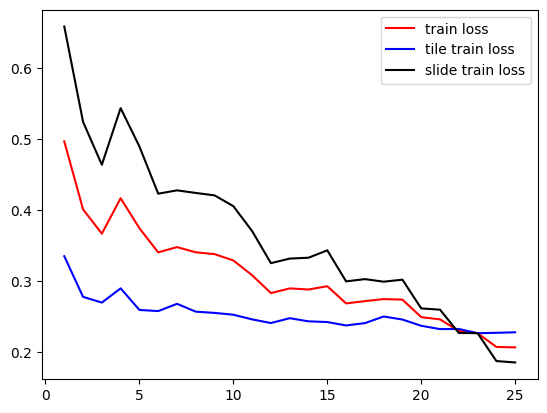

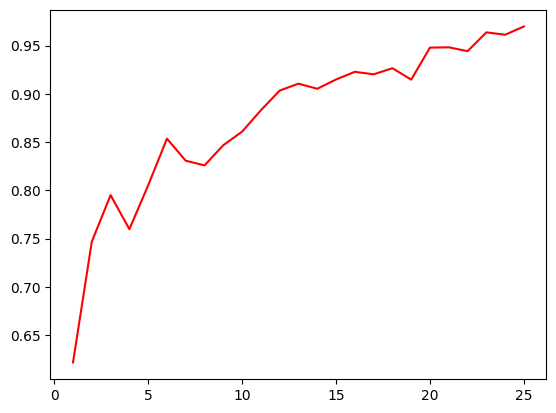

Training model n°1
MixedMILModel(
  (reduction): Sequential(
    (0): Dropout(p=0.25, inplace=False)
    (1): Linear(in_features=2048, out_features=1024, bias=True)
    (2): ReLU()
  )
  (attention): AttentionLayer(
    (U): Linear(in_features=1024, out_features=512, bias=False)
    (V): Linear(in_features=1024, out_features=512, bias=False)
    (W): Linear(in_features=512, out_features=1, bias=False)
  )
  (slide_clf): Sequential(
    (0): Dropout(p=0.25, inplace=False)
    (1): Linear(in_features=1024, out_features=256, bias=True)
    (2): ReLU()
    (3): Dropout(p=0.25, inplace=False)
    (4): Linear(in_features=256, out_features=1, bias=True)
    (5): Sigmoid()
  )
  (tiles_clf): Sequential(
    (0): Dropout(p=0.25, inplace=False)
    (1): Linear(in_features=1024, out_features=1, bias=True)
    (2): Sigmoid()
  )
)


100%|██████████| 279/279 [00:08<00:00, 34.09it/s]


Epoch 1: train loss 0.558 train auc 0.480 tiles auc 0.737


100%|██████████| 279/279 [00:08<00:00, 33.47it/s]


Epoch 2: train loss 0.476 train auc 0.649 tiles auc 0.865


100%|██████████| 279/279 [00:08<00:00, 33.86it/s]


Epoch 3: train loss 0.387 train auc 0.810 tiles auc 0.905


100%|██████████| 279/279 [00:08<00:00, 33.59it/s]


Epoch 4: train loss 0.381 train auc 0.828 tiles auc 0.893


100%|██████████| 279/279 [00:08<00:00, 33.25it/s]


Epoch 5: train loss 0.358 train auc 0.842 tiles auc 0.893


100%|██████████| 279/279 [00:08<00:00, 33.59it/s]


Epoch 6: train loss 0.365 train auc 0.833 tiles auc 0.896


100%|██████████| 279/279 [00:08<00:00, 34.08it/s]


Epoch 7: train loss 0.336 train auc 0.845 tiles auc 0.907


100%|██████████| 279/279 [00:08<00:00, 33.53it/s]


Epoch 8: train loss 0.340 train auc 0.856 tiles auc 0.896


100%|██████████| 279/279 [00:08<00:00, 33.93it/s]


Epoch 9: train loss 0.307 train auc 0.893 tiles auc 0.915


100%|██████████| 279/279 [00:08<00:00, 33.60it/s]


Epoch 10: train loss 0.305 train auc 0.905 tiles auc 0.911


100%|██████████| 279/279 [00:08<00:00, 33.25it/s]


Epoch 11: train loss 0.272 train auc 0.923 tiles auc 0.914


100%|██████████| 279/279 [00:08<00:00, 33.75it/s]


Epoch 12: train loss 0.280 train auc 0.934 tiles auc 0.914


100%|██████████| 279/279 [00:08<00:00, 33.02it/s]


Epoch 13: train loss 0.280 train auc 0.928 tiles auc 0.914


100%|██████████| 279/279 [00:08<00:00, 32.72it/s]


Epoch 14: train loss 0.266 train auc 0.938 tiles auc 0.916


100%|██████████| 279/279 [00:08<00:00, 33.70it/s]


Epoch 15: train loss 0.271 train auc 0.934 tiles auc 0.917


100%|██████████| 279/279 [00:08<00:00, 33.58it/s]


Epoch 16: train loss 0.259 train auc 0.939 tiles auc 0.911


100%|██████████| 279/279 [00:08<00:00, 33.71it/s]


Epoch 17: train loss 0.267 train auc 0.927 tiles auc 0.917


100%|██████████| 279/279 [00:08<00:00, 34.25it/s]


Epoch 18: train loss 0.246 train auc 0.962 tiles auc 0.919


100%|██████████| 279/279 [00:08<00:00, 33.62it/s]


Epoch 19: train loss 0.243 train auc 0.945 tiles auc 0.916


100%|██████████| 279/279 [00:08<00:00, 33.30it/s]


Epoch 20: train loss 0.220 train auc 0.965 tiles auc 0.917


100%|██████████| 279/279 [00:08<00:00, 33.59it/s]


Epoch 21: train loss 0.221 train auc 0.964 tiles auc 0.921


100%|██████████| 279/279 [00:08<00:00, 33.55it/s]


Epoch 22: train loss 0.221 train auc 0.959 tiles auc 0.914


100%|██████████| 279/279 [00:08<00:00, 33.50it/s]


Epoch 23: train loss 0.216 train auc 0.969 tiles auc 0.918


100%|██████████| 279/279 [00:08<00:00, 34.13it/s]


Epoch 24: train loss 0.222 train auc 0.964 tiles auc 0.920


100%|██████████| 279/279 [00:08<00:00, 33.35it/s]


Epoch 25: train loss 0.221 train auc 0.965 tiles auc 0.923
Best auc: 0.969, last auc: 0.965, best epoch: 23


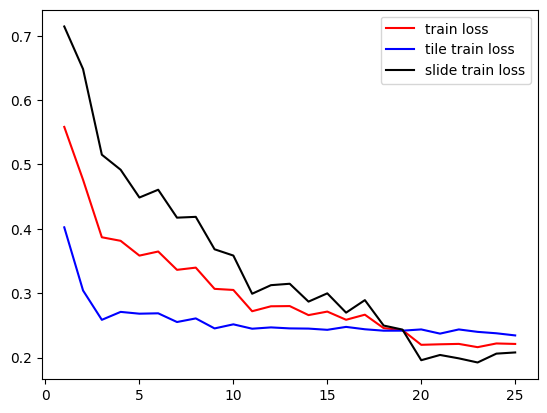

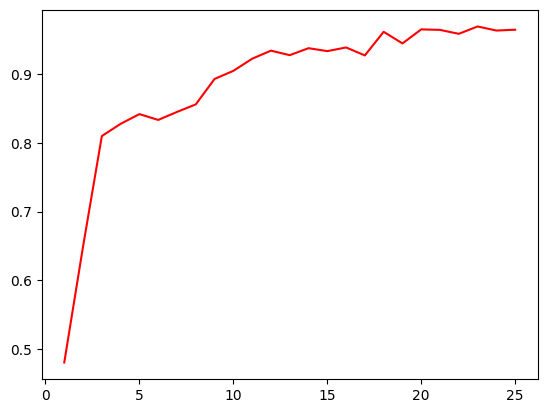

Training model n°2
MixedMILModel(
  (reduction): Sequential(
    (0): Dropout(p=0.25, inplace=False)
    (1): Linear(in_features=2048, out_features=1024, bias=True)
    (2): ReLU()
  )
  (attention): AttentionLayer(
    (U): Linear(in_features=1024, out_features=512, bias=False)
    (V): Linear(in_features=1024, out_features=512, bias=False)
    (W): Linear(in_features=512, out_features=1, bias=False)
  )
  (slide_clf): Sequential(
    (0): Dropout(p=0.25, inplace=False)
    (1): Linear(in_features=1024, out_features=256, bias=True)
    (2): ReLU()
    (3): Dropout(p=0.25, inplace=False)
    (4): Linear(in_features=256, out_features=1, bias=True)
    (5): Sigmoid()
  )
  (tiles_clf): Sequential(
    (0): Dropout(p=0.25, inplace=False)
    (1): Linear(in_features=1024, out_features=1, bias=True)
    (2): Sigmoid()
  )
)


100%|██████████| 279/279 [00:08<00:00, 33.54it/s]


Epoch 1: train loss 0.508 train auc 0.589 tiles auc 0.831


100%|██████████| 279/279 [00:08<00:00, 34.34it/s]


Epoch 2: train loss 0.423 train auc 0.753 tiles auc 0.873


100%|██████████| 279/279 [00:08<00:00, 33.01it/s]


Epoch 3: train loss 0.396 train auc 0.792 tiles auc 0.888


100%|██████████| 279/279 [00:08<00:00, 32.53it/s]


Epoch 4: train loss 0.409 train auc 0.779 tiles auc 0.882


100%|██████████| 279/279 [00:08<00:00, 33.50it/s]


Epoch 5: train loss 0.359 train auc 0.836 tiles auc 0.898


100%|██████████| 279/279 [00:08<00:00, 32.83it/s]


Epoch 6: train loss 0.340 train auc 0.821 tiles auc 0.910


100%|██████████| 279/279 [00:08<00:00, 32.65it/s]


Epoch 7: train loss 0.321 train auc 0.867 tiles auc 0.914


100%|██████████| 279/279 [00:08<00:00, 33.42it/s]


Epoch 8: train loss 0.324 train auc 0.859 tiles auc 0.910


100%|██████████| 279/279 [00:08<00:00, 32.78it/s]


Epoch 9: train loss 0.337 train auc 0.857 tiles auc 0.913


100%|██████████| 279/279 [00:08<00:00, 33.05it/s]


Epoch 10: train loss 0.323 train auc 0.866 tiles auc 0.913


100%|██████████| 279/279 [00:08<00:00, 33.89it/s]


Epoch 11: train loss 0.294 train auc 0.893 tiles auc 0.920


100%|██████████| 279/279 [00:08<00:00, 33.16it/s]


Epoch 12: train loss 0.284 train auc 0.910 tiles auc 0.919


100%|██████████| 279/279 [00:08<00:00, 33.23it/s]


Epoch 13: train loss 0.308 train auc 0.915 tiles auc 0.899


100%|██████████| 279/279 [00:08<00:00, 33.53it/s]


Epoch 14: train loss 0.294 train auc 0.910 tiles auc 0.907


100%|██████████| 279/279 [00:08<00:00, 33.51it/s]


Epoch 15: train loss 0.285 train auc 0.917 tiles auc 0.902


100%|██████████| 279/279 [00:08<00:00, 33.27it/s]


Epoch 16: train loss 0.293 train auc 0.905 tiles auc 0.906


100%|██████████| 279/279 [00:08<00:00, 34.07it/s]


Epoch 17: train loss 0.283 train auc 0.918 tiles auc 0.914


100%|██████████| 279/279 [00:08<00:00, 33.14it/s]


Epoch 18: train loss 0.285 train auc 0.919 tiles auc 0.908


100%|██████████| 279/279 [00:08<00:00, 33.28it/s]


Epoch 19: train loss 0.271 train auc 0.933 tiles auc 0.907


100%|██████████| 279/279 [00:08<00:00, 33.98it/s]


Epoch 20: train loss 0.298 train auc 0.907 tiles auc 0.910


100%|██████████| 279/279 [00:08<00:00, 33.44it/s]


Epoch 21: train loss 0.247 train auc 0.950 tiles auc 0.917


100%|██████████| 279/279 [00:08<00:00, 33.25it/s]


Epoch 22: train loss 0.251 train auc 0.944 tiles auc 0.919


100%|██████████| 279/279 [00:08<00:00, 34.06it/s]


Epoch 23: train loss 0.245 train auc 0.939 tiles auc 0.927


100%|██████████| 279/279 [00:08<00:00, 33.48it/s]


Epoch 24: train loss 0.259 train auc 0.944 tiles auc 0.916


100%|██████████| 279/279 [00:08<00:00, 32.24it/s]


Epoch 25: train loss 0.255 train auc 0.940 tiles auc 0.918
Best auc: 0.950, last auc: 0.940, best epoch: 21


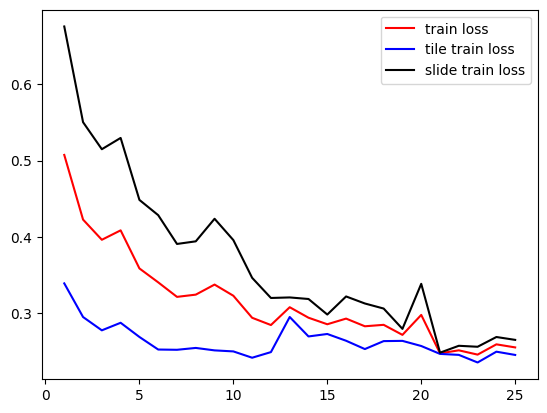

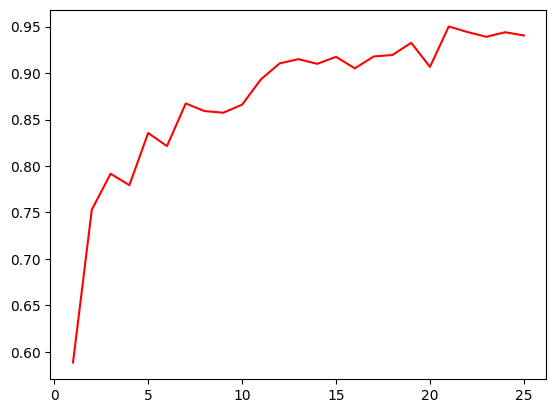

Training model n°3
MixedMILModel(
  (reduction): Sequential(
    (0): Dropout(p=0.25, inplace=False)
    (1): Linear(in_features=2048, out_features=1024, bias=True)
    (2): ReLU()
  )
  (attention): AttentionLayer(
    (U): Linear(in_features=1024, out_features=512, bias=False)
    (V): Linear(in_features=1024, out_features=512, bias=False)
    (W): Linear(in_features=512, out_features=1, bias=False)
  )
  (slide_clf): Sequential(
    (0): Dropout(p=0.25, inplace=False)
    (1): Linear(in_features=1024, out_features=256, bias=True)
    (2): ReLU()
    (3): Dropout(p=0.25, inplace=False)
    (4): Linear(in_features=256, out_features=1, bias=True)
    (5): Sigmoid()
  )
  (tiles_clf): Sequential(
    (0): Dropout(p=0.25, inplace=False)
    (1): Linear(in_features=1024, out_features=1, bias=True)
    (2): Sigmoid()
  )
)


100%|██████████| 279/279 [00:08<00:00, 33.53it/s]


Epoch 1: train loss 0.523 train auc 0.562 tiles auc 0.814


100%|██████████| 279/279 [00:08<00:00, 33.37it/s]


Epoch 2: train loss 0.497 train auc 0.625 tiles auc 0.849


100%|██████████| 279/279 [00:08<00:00, 32.98it/s]


Epoch 3: train loss 0.391 train auc 0.805 tiles auc 0.888


100%|██████████| 279/279 [00:08<00:00, 33.53it/s]


Epoch 4: train loss 0.415 train auc 0.779 tiles auc 0.868


100%|██████████| 279/279 [00:08<00:00, 33.41it/s]


Epoch 5: train loss 0.355 train auc 0.852 tiles auc 0.894


100%|██████████| 279/279 [00:08<00:00, 32.97it/s]


Epoch 6: train loss 0.359 train auc 0.831 tiles auc 0.900


100%|██████████| 279/279 [00:08<00:00, 33.39it/s]


Epoch 7: train loss 0.349 train auc 0.863 tiles auc 0.896


100%|██████████| 279/279 [00:08<00:00, 33.30it/s]


Epoch 8: train loss 0.315 train auc 0.891 tiles auc 0.905


100%|██████████| 279/279 [00:08<00:00, 32.96it/s]


Epoch 9: train loss 0.325 train auc 0.873 tiles auc 0.910


100%|██████████| 279/279 [00:08<00:00, 33.83it/s]


Epoch 10: train loss 0.316 train auc 0.901 tiles auc 0.903


100%|██████████| 279/279 [00:08<00:00, 33.31it/s]


Epoch 11: train loss 0.305 train auc 0.903 tiles auc 0.910


100%|██████████| 279/279 [00:08<00:00, 32.92it/s]


Epoch 12: train loss 0.307 train auc 0.893 tiles auc 0.913


100%|██████████| 279/279 [00:08<00:00, 33.57it/s]


Epoch 13: train loss 0.278 train auc 0.929 tiles auc 0.912


100%|██████████| 279/279 [00:08<00:00, 33.10it/s]


Epoch 14: train loss 0.274 train auc 0.931 tiles auc 0.913


100%|██████████| 279/279 [00:08<00:00, 32.77it/s]


Epoch 15: train loss 0.278 train auc 0.921 tiles auc 0.911


100%|██████████| 279/279 [00:08<00:00, 33.54it/s]


Epoch 16: train loss 0.282 train auc 0.925 tiles auc 0.911


100%|██████████| 279/279 [00:08<00:00, 33.14it/s]


Epoch 17: train loss 0.242 train auc 0.951 tiles auc 0.916


100%|██████████| 279/279 [00:08<00:00, 32.44it/s]


Epoch 18: train loss 0.269 train auc 0.934 tiles auc 0.918


100%|██████████| 279/279 [00:08<00:00, 33.05it/s]


Epoch 19: train loss 0.237 train auc 0.957 tiles auc 0.916


100%|██████████| 279/279 [00:08<00:00, 33.33it/s]


Epoch 20: train loss 0.272 train auc 0.920 tiles auc 0.912


100%|██████████| 279/279 [00:08<00:00, 32.91it/s]


Epoch 21: train loss 0.216 train auc 0.974 tiles auc 0.920


100%|██████████| 279/279 [00:08<00:00, 32.89it/s]


Epoch 22: train loss 0.217 train auc 0.973 tiles auc 0.918


100%|██████████| 279/279 [00:08<00:00, 33.67it/s]


Epoch 23: train loss 0.211 train auc 0.979 tiles auc 0.920


100%|██████████| 279/279 [00:08<00:00, 33.18it/s]


Epoch 24: train loss 0.222 train auc 0.968 tiles auc 0.917


100%|██████████| 279/279 [00:08<00:00, 33.22it/s]


Epoch 25: train loss 0.225 train auc 0.963 tiles auc 0.918
Best auc: 0.979, last auc: 0.963, best epoch: 23


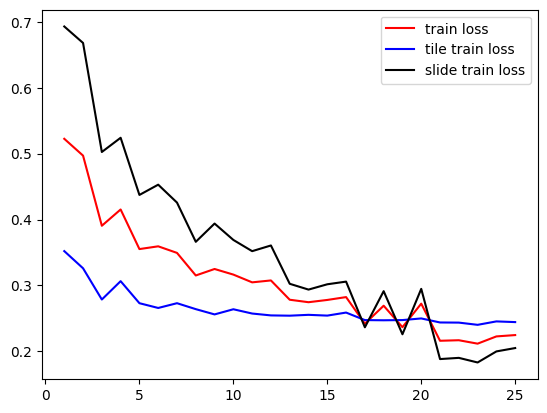

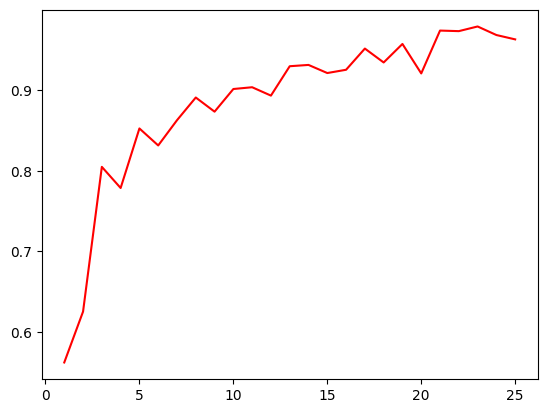

Training model n°4
MixedMILModel(
  (reduction): Sequential(
    (0): Dropout(p=0.25, inplace=False)
    (1): Linear(in_features=2048, out_features=1024, bias=True)
    (2): ReLU()
  )
  (attention): AttentionLayer(
    (U): Linear(in_features=1024, out_features=512, bias=False)
    (V): Linear(in_features=1024, out_features=512, bias=False)
    (W): Linear(in_features=512, out_features=1, bias=False)
  )
  (slide_clf): Sequential(
    (0): Dropout(p=0.25, inplace=False)
    (1): Linear(in_features=1024, out_features=256, bias=True)
    (2): ReLU()
    (3): Dropout(p=0.25, inplace=False)
    (4): Linear(in_features=256, out_features=1, bias=True)
    (5): Sigmoid()
  )
  (tiles_clf): Sequential(
    (0): Dropout(p=0.25, inplace=False)
    (1): Linear(in_features=1024, out_features=1, bias=True)
    (2): Sigmoid()
  )
)


100%|██████████| 279/279 [00:08<00:00, 33.48it/s]


Epoch 1: train loss 0.526 train auc 0.578 tiles auc 0.807


100%|██████████| 279/279 [00:08<00:00, 33.08it/s]


Epoch 2: train loss 0.454 train auc 0.710 tiles auc 0.859


100%|██████████| 279/279 [00:08<00:00, 33.15it/s]


Epoch 3: train loss 0.369 train auc 0.833 tiles auc 0.892


100%|██████████| 279/279 [00:08<00:00, 33.12it/s]


Epoch 4: train loss 0.367 train auc 0.832 tiles auc 0.900


100%|██████████| 279/279 [00:08<00:00, 33.09it/s]


Epoch 5: train loss 0.374 train auc 0.819 tiles auc 0.886


100%|██████████| 279/279 [00:08<00:00, 33.58it/s]


Epoch 6: train loss 0.346 train auc 0.846 tiles auc 0.901


100%|██████████| 279/279 [00:08<00:00, 33.13it/s]


Epoch 7: train loss 0.320 train auc 0.878 tiles auc 0.906


100%|██████████| 279/279 [00:08<00:00, 33.04it/s]


Epoch 8: train loss 0.362 train auc 0.824 tiles auc 0.891


100%|██████████| 279/279 [00:08<00:00, 33.15it/s]


Epoch 9: train loss 0.344 train auc 0.859 tiles auc 0.907


100%|██████████| 279/279 [00:08<00:00, 33.44it/s]


Epoch 10: train loss 0.339 train auc 0.882 tiles auc 0.905


100%|██████████| 279/279 [00:08<00:00, 32.29it/s]


Epoch 11: train loss 0.305 train auc 0.888 tiles auc 0.918


100%|██████████| 279/279 [00:08<00:00, 32.01it/s]


Epoch 12: train loss 0.301 train auc 0.913 tiles auc 0.915


100%|██████████| 279/279 [00:08<00:00, 33.73it/s]


Epoch 13: train loss 0.285 train auc 0.918 tiles auc 0.918


100%|██████████| 279/279 [00:08<00:00, 32.87it/s]


Epoch 14: train loss 0.267 train auc 0.934 tiles auc 0.918


100%|██████████| 279/279 [00:08<00:00, 33.01it/s]


Epoch 15: train loss 0.277 train auc 0.930 tiles auc 0.907


100%|██████████| 279/279 [00:08<00:00, 33.89it/s]


Epoch 16: train loss 0.257 train auc 0.946 tiles auc 0.923


100%|██████████| 279/279 [00:08<00:00, 32.97it/s]


Epoch 17: train loss 0.260 train auc 0.952 tiles auc 0.920


100%|██████████| 279/279 [00:08<00:00, 33.14it/s]


Epoch 18: train loss 0.265 train auc 0.940 tiles auc 0.922


100%|██████████| 279/279 [00:08<00:00, 33.95it/s]


Epoch 19: train loss 0.255 train auc 0.951 tiles auc 0.910


100%|██████████| 279/279 [00:08<00:00, 33.09it/s]


Epoch 20: train loss 0.268 train auc 0.945 tiles auc 0.915


100%|██████████| 279/279 [00:08<00:00, 32.98it/s]


Epoch 21: train loss 0.227 train auc 0.967 tiles auc 0.920


100%|██████████| 279/279 [00:08<00:00, 33.57it/s]


Epoch 22: train loss 0.216 train auc 0.975 tiles auc 0.921


100%|██████████| 279/279 [00:08<00:00, 32.83it/s]


Epoch 23: train loss 0.221 train auc 0.968 tiles auc 0.920


100%|██████████| 279/279 [00:08<00:00, 33.07it/s]


Epoch 24: train loss 0.196 train auc 0.984 tiles auc 0.924


100%|██████████| 279/279 [00:08<00:00, 33.34it/s]


Epoch 25: train loss 0.201 train auc 0.978 tiles auc 0.922
Best auc: 0.984, last auc: 0.978, best epoch: 24


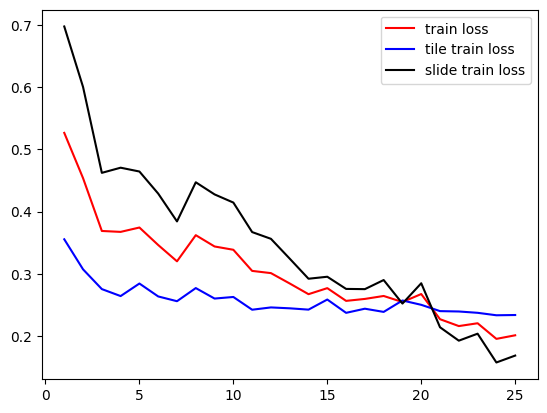

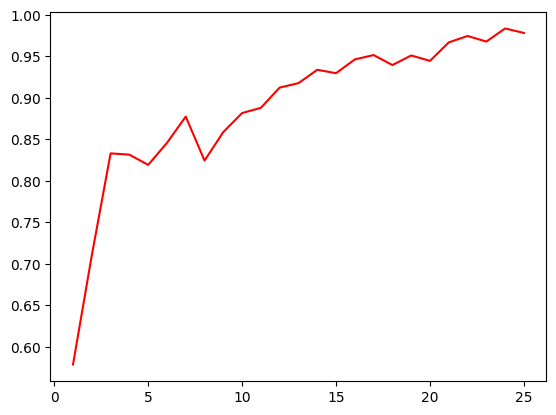

Training model n°5
MixedMILModel(
  (reduction): Sequential(
    (0): Dropout(p=0.25, inplace=False)
    (1): Linear(in_features=2048, out_features=1024, bias=True)
    (2): ReLU()
  )
  (attention): AttentionLayer(
    (U): Linear(in_features=1024, out_features=512, bias=False)
    (V): Linear(in_features=1024, out_features=512, bias=False)
    (W): Linear(in_features=512, out_features=1, bias=False)
  )
  (slide_clf): Sequential(
    (0): Dropout(p=0.25, inplace=False)
    (1): Linear(in_features=1024, out_features=256, bias=True)
    (2): ReLU()
    (3): Dropout(p=0.25, inplace=False)
    (4): Linear(in_features=256, out_features=1, bias=True)
    (5): Sigmoid()
  )
  (tiles_clf): Sequential(
    (0): Dropout(p=0.25, inplace=False)
    (1): Linear(in_features=1024, out_features=1, bias=True)
    (2): Sigmoid()
  )
)


100%|██████████| 279/279 [00:08<00:00, 32.85it/s]


Epoch 1: train loss 0.535 train auc 0.479 tiles auc 0.800


100%|██████████| 279/279 [00:08<00:00, 32.99it/s]


Epoch 2: train loss 0.452 train auc 0.719 tiles auc 0.877


100%|██████████| 279/279 [00:08<00:00, 33.92it/s]


Epoch 3: train loss 0.398 train auc 0.802 tiles auc 0.879


100%|██████████| 279/279 [00:08<00:00, 32.88it/s]


Epoch 4: train loss 0.371 train auc 0.826 tiles auc 0.895


100%|██████████| 279/279 [00:08<00:00, 32.73it/s]


Epoch 5: train loss 0.363 train auc 0.818 tiles auc 0.901


100%|██████████| 279/279 [00:08<00:00, 33.72it/s]


Epoch 6: train loss 0.353 train auc 0.851 tiles auc 0.910


100%|██████████| 279/279 [00:08<00:00, 32.60it/s]


Epoch 7: train loss 0.366 train auc 0.823 tiles auc 0.909


100%|██████████| 279/279 [00:08<00:00, 33.21it/s]


Epoch 8: train loss 0.353 train auc 0.841 tiles auc 0.892


100%|██████████| 279/279 [00:08<00:00, 33.89it/s]


Epoch 9: train loss 0.334 train auc 0.833 tiles auc 0.908


100%|██████████| 279/279 [00:08<00:00, 32.87it/s]


Epoch 10: train loss 0.353 train auc 0.846 tiles auc 0.899


100%|██████████| 279/279 [00:08<00:00, 32.73it/s]


Epoch 11: train loss 0.319 train auc 0.875 tiles auc 0.917


100%|██████████| 279/279 [00:08<00:00, 33.82it/s]


Epoch 12: train loss 0.310 train auc 0.882 tiles auc 0.921


100%|██████████| 279/279 [00:08<00:00, 32.86it/s]


Epoch 13: train loss 0.309 train auc 0.894 tiles auc 0.925


100%|██████████| 279/279 [00:08<00:00, 32.78it/s]


Epoch 14: train loss 0.287 train auc 0.912 tiles auc 0.921


100%|██████████| 279/279 [00:08<00:00, 33.56it/s]


Epoch 15: train loss 0.276 train auc 0.925 tiles auc 0.924


100%|██████████| 279/279 [00:08<00:00, 32.72it/s]


Epoch 16: train loss 0.269 train auc 0.929 tiles auc 0.918


100%|██████████| 279/279 [00:08<00:00, 32.89it/s]


Epoch 17: train loss 0.290 train auc 0.921 tiles auc 0.920


100%|██████████| 279/279 [00:08<00:00, 33.54it/s]


Epoch 18: train loss 0.252 train auc 0.946 tiles auc 0.925


100%|██████████| 279/279 [00:08<00:00, 32.70it/s]


Epoch 19: train loss 0.267 train auc 0.936 tiles auc 0.917


100%|██████████| 279/279 [00:08<00:00, 33.00it/s]


Epoch 20: train loss 0.244 train auc 0.959 tiles auc 0.916


100%|██████████| 279/279 [00:08<00:00, 33.78it/s]


Epoch 21: train loss 0.244 train auc 0.956 tiles auc 0.919


100%|██████████| 279/279 [00:08<00:00, 32.64it/s]


Epoch 22: train loss 0.240 train auc 0.958 tiles auc 0.923


100%|██████████| 279/279 [00:08<00:00, 32.50it/s]


Epoch 23: train loss 0.220 train auc 0.971 tiles auc 0.925


100%|██████████| 279/279 [00:08<00:00, 33.40it/s]


Epoch 24: train loss 0.228 train auc 0.961 tiles auc 0.928


100%|██████████| 279/279 [00:08<00:00, 33.01it/s]


Epoch 25: train loss 0.216 train auc 0.973 tiles auc 0.924
Best auc: 0.973, last auc: 0.973, best epoch: 25


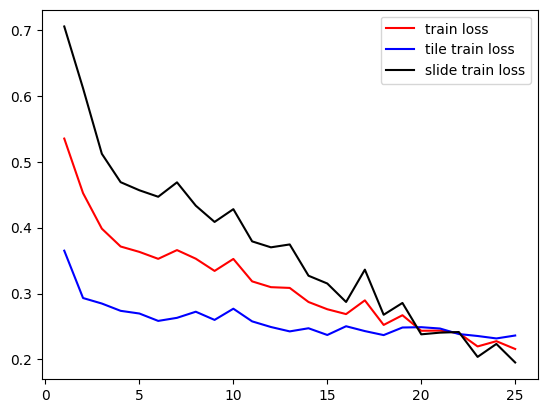

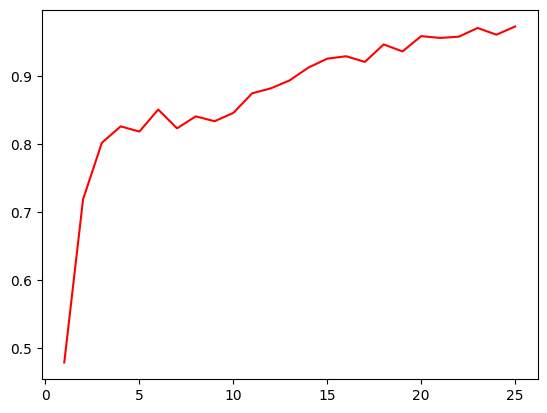

Training model n°6
MixedMILModel(
  (reduction): Sequential(
    (0): Dropout(p=0.25, inplace=False)
    (1): Linear(in_features=2048, out_features=1024, bias=True)
    (2): ReLU()
  )
  (attention): AttentionLayer(
    (U): Linear(in_features=1024, out_features=512, bias=False)
    (V): Linear(in_features=1024, out_features=512, bias=False)
    (W): Linear(in_features=512, out_features=1, bias=False)
  )
  (slide_clf): Sequential(
    (0): Dropout(p=0.25, inplace=False)
    (1): Linear(in_features=1024, out_features=256, bias=True)
    (2): ReLU()
    (3): Dropout(p=0.25, inplace=False)
    (4): Linear(in_features=256, out_features=1, bias=True)
    (5): Sigmoid()
  )
  (tiles_clf): Sequential(
    (0): Dropout(p=0.25, inplace=False)
    (1): Linear(in_features=1024, out_features=1, bias=True)
    (2): Sigmoid()
  )
)


100%|██████████| 279/279 [00:08<00:00, 32.62it/s]


Epoch 1: train loss 0.537 train auc 0.534 tiles auc 0.839


100%|██████████| 279/279 [00:08<00:00, 33.60it/s]


Epoch 2: train loss 0.450 train auc 0.693 tiles auc 0.887


100%|██████████| 279/279 [00:08<00:00, 32.82it/s]


Epoch 3: train loss 0.402 train auc 0.757 tiles auc 0.895


100%|██████████| 279/279 [00:08<00:00, 32.60it/s]


Epoch 4: train loss 0.382 train auc 0.792 tiles auc 0.905


100%|██████████| 279/279 [00:08<00:00, 33.16it/s]


Epoch 5: train loss 0.356 train auc 0.827 tiles auc 0.909


100%|██████████| 279/279 [00:08<00:00, 33.42it/s]


Epoch 6: train loss 0.346 train auc 0.857 tiles auc 0.911


100%|██████████| 279/279 [00:08<00:00, 32.62it/s]


Epoch 7: train loss 0.340 train auc 0.845 tiles auc 0.916


100%|██████████| 279/279 [00:08<00:00, 33.17it/s]


Epoch 8: train loss 0.340 train auc 0.861 tiles auc 0.913


100%|██████████| 279/279 [00:08<00:00, 33.62it/s]


Epoch 9: train loss 0.338 train auc 0.862 tiles auc 0.902


100%|██████████| 279/279 [00:08<00:00, 32.56it/s]


Epoch 10: train loss 0.319 train auc 0.882 tiles auc 0.918


100%|██████████| 279/279 [00:08<00:00, 32.73it/s]


Epoch 11: train loss 0.310 train auc 0.872 tiles auc 0.925


100%|██████████| 279/279 [00:08<00:00, 33.52it/s]


Epoch 12: train loss 0.274 train auc 0.917 tiles auc 0.927


100%|██████████| 279/279 [00:08<00:00, 32.94it/s]


Epoch 13: train loss 0.284 train auc 0.910 tiles auc 0.925


100%|██████████| 279/279 [00:08<00:00, 32.92it/s]


Epoch 14: train loss 0.275 train auc 0.918 tiles auc 0.928


100%|██████████| 279/279 [00:08<00:00, 33.45it/s]


Epoch 15: train loss 0.279 train auc 0.923 tiles auc 0.925


100%|██████████| 279/279 [00:08<00:00, 32.62it/s]


Epoch 16: train loss 0.268 train auc 0.917 tiles auc 0.927


100%|██████████| 279/279 [00:08<00:00, 32.94it/s]


Epoch 17: train loss 0.250 train auc 0.929 tiles auc 0.929


100%|██████████| 279/279 [00:08<00:00, 33.13it/s]


Epoch 18: train loss 0.259 train auc 0.935 tiles auc 0.926


100%|██████████| 279/279 [00:08<00:00, 32.59it/s]


Epoch 19: train loss 0.256 train auc 0.941 tiles auc 0.926


100%|██████████| 279/279 [00:08<00:00, 32.82it/s]


Epoch 20: train loss 0.248 train auc 0.944 tiles auc 0.925


100%|██████████| 279/279 [00:08<00:00, 32.38it/s]


Epoch 21: train loss 0.237 train auc 0.955 tiles auc 0.930


100%|██████████| 279/279 [00:08<00:00, 32.67it/s]


Epoch 22: train loss 0.234 train auc 0.954 tiles auc 0.930


100%|██████████| 279/279 [00:08<00:00, 32.63it/s]


Epoch 23: train loss 0.222 train auc 0.967 tiles auc 0.930


100%|██████████| 279/279 [00:08<00:00, 33.49it/s]


Epoch 24: train loss 0.207 train auc 0.974 tiles auc 0.933


100%|██████████| 279/279 [00:08<00:00, 32.86it/s]


Epoch 25: train loss 0.201 train auc 0.976 tiles auc 0.933
Best auc: 0.976, last auc: 0.976, best epoch: 25


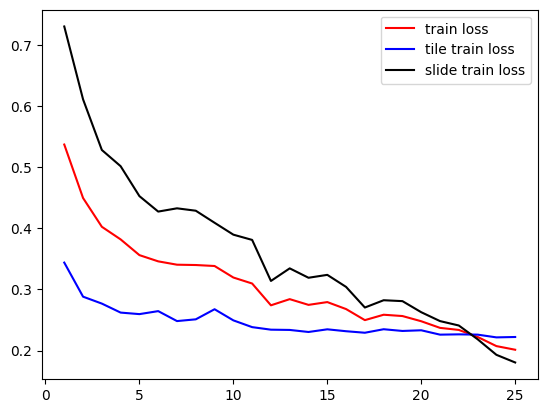

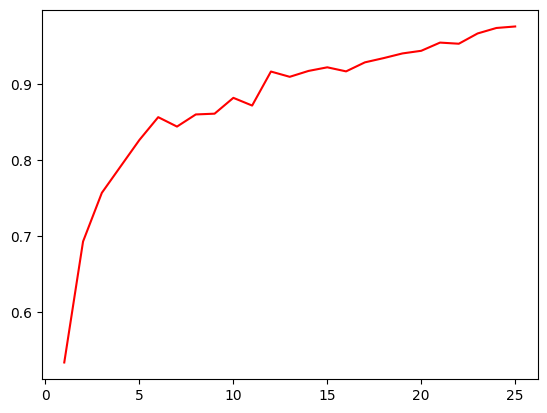

Training model n°7
MixedMILModel(
  (reduction): Sequential(
    (0): Dropout(p=0.25, inplace=False)
    (1): Linear(in_features=2048, out_features=1024, bias=True)
    (2): ReLU()
  )
  (attention): AttentionLayer(
    (U): Linear(in_features=1024, out_features=512, bias=False)
    (V): Linear(in_features=1024, out_features=512, bias=False)
    (W): Linear(in_features=512, out_features=1, bias=False)
  )
  (slide_clf): Sequential(
    (0): Dropout(p=0.25, inplace=False)
    (1): Linear(in_features=1024, out_features=256, bias=True)
    (2): ReLU()
    (3): Dropout(p=0.25, inplace=False)
    (4): Linear(in_features=256, out_features=1, bias=True)
    (5): Sigmoid()
  )
  (tiles_clf): Sequential(
    (0): Dropout(p=0.25, inplace=False)
    (1): Linear(in_features=1024, out_features=1, bias=True)
    (2): Sigmoid()
  )
)


100%|██████████| 279/279 [00:08<00:00, 32.52it/s]


Epoch 1: train loss 0.517 train auc 0.546 tiles auc 0.826


100%|██████████| 279/279 [00:08<00:00, 33.71it/s]


Epoch 2: train loss 0.468 train auc 0.681 tiles auc 0.849


100%|██████████| 279/279 [00:08<00:00, 32.63it/s]


Epoch 3: train loss 0.411 train auc 0.750 tiles auc 0.882


100%|██████████| 279/279 [00:08<00:00, 32.66it/s]


Epoch 4: train loss 0.418 train auc 0.766 tiles auc 0.877


100%|██████████| 279/279 [00:08<00:00, 33.44it/s]


Epoch 5: train loss 0.400 train auc 0.773 tiles auc 0.880


100%|██████████| 279/279 [00:08<00:00, 32.70it/s]


Epoch 6: train loss 0.415 train auc 0.801 tiles auc 0.888


100%|██████████| 279/279 [00:08<00:00, 32.30it/s]


Epoch 7: train loss 0.388 train auc 0.793 tiles auc 0.895


100%|██████████| 279/279 [00:08<00:00, 33.33it/s]


Epoch 8: train loss 0.370 train auc 0.814 tiles auc 0.901


100%|██████████| 279/279 [00:08<00:00, 31.73it/s]


Epoch 9: train loss 0.368 train auc 0.804 tiles auc 0.903


100%|██████████| 279/279 [00:08<00:00, 32.37it/s]


Epoch 10: train loss 0.359 train auc 0.824 tiles auc 0.907


100%|██████████| 279/279 [00:08<00:00, 33.08it/s]


Epoch 11: train loss 0.314 train auc 0.886 tiles auc 0.911


100%|██████████| 279/279 [00:08<00:00, 32.89it/s]


Epoch 12: train loss 0.320 train auc 0.890 tiles auc 0.913


100%|██████████| 279/279 [00:08<00:00, 32.64it/s]


Epoch 13: train loss 0.313 train auc 0.891 tiles auc 0.910


100%|██████████| 279/279 [00:08<00:00, 32.91it/s]


Epoch 14: train loss 0.302 train auc 0.907 tiles auc 0.901


100%|██████████| 279/279 [00:08<00:00, 33.12it/s]


Epoch 15: train loss 0.288 train auc 0.921 tiles auc 0.904


100%|██████████| 279/279 [00:08<00:00, 32.52it/s]


Epoch 16: train loss 0.281 train auc 0.933 tiles auc 0.903


100%|██████████| 279/279 [00:08<00:00, 32.73it/s]


Epoch 17: train loss 0.298 train auc 0.914 tiles auc 0.904


100%|██████████| 279/279 [00:08<00:00, 33.53it/s]


Epoch 18: train loss 0.290 train auc 0.912 tiles auc 0.913


100%|██████████| 279/279 [00:08<00:00, 32.75it/s]


Epoch 19: train loss 0.300 train auc 0.910 tiles auc 0.913


100%|██████████| 279/279 [00:08<00:00, 32.91it/s]


Epoch 20: train loss 0.276 train auc 0.940 tiles auc 0.916


100%|██████████| 279/279 [00:08<00:00, 33.36it/s]


Epoch 21: train loss 0.255 train auc 0.948 tiles auc 0.919


100%|██████████| 279/279 [00:08<00:00, 32.75it/s]


Epoch 22: train loss 0.241 train auc 0.955 tiles auc 0.919


100%|██████████| 279/279 [00:08<00:00, 32.45it/s]


Epoch 23: train loss 0.212 train auc 0.976 tiles auc 0.926


100%|██████████| 279/279 [00:08<00:00, 33.32it/s]


Epoch 24: train loss 0.236 train auc 0.961 tiles auc 0.924


100%|██████████| 279/279 [00:08<00:00, 32.30it/s]


Epoch 25: train loss 0.208 train auc 0.976 tiles auc 0.927
Best auc: 0.976, last auc: 0.976, best epoch: 25


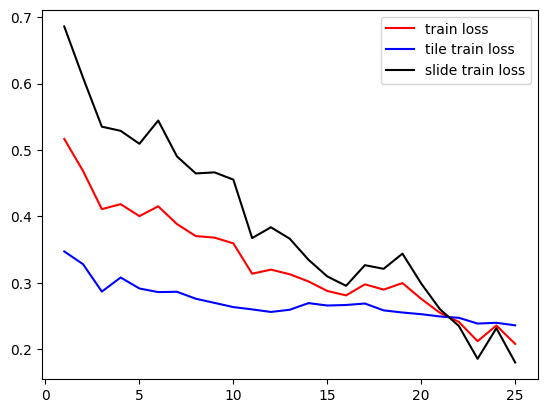

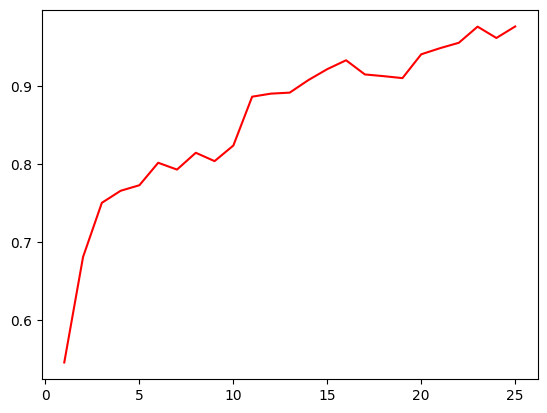

Training model n°8
MixedMILModel(
  (reduction): Sequential(
    (0): Dropout(p=0.25, inplace=False)
    (1): Linear(in_features=2048, out_features=1024, bias=True)
    (2): ReLU()
  )
  (attention): AttentionLayer(
    (U): Linear(in_features=1024, out_features=512, bias=False)
    (V): Linear(in_features=1024, out_features=512, bias=False)
    (W): Linear(in_features=512, out_features=1, bias=False)
  )
  (slide_clf): Sequential(
    (0): Dropout(p=0.25, inplace=False)
    (1): Linear(in_features=1024, out_features=256, bias=True)
    (2): ReLU()
    (3): Dropout(p=0.25, inplace=False)
    (4): Linear(in_features=256, out_features=1, bias=True)
    (5): Sigmoid()
  )
  (tiles_clf): Sequential(
    (0): Dropout(p=0.25, inplace=False)
    (1): Linear(in_features=1024, out_features=1, bias=True)
    (2): Sigmoid()
  )
)


100%|██████████| 279/279 [00:08<00:00, 31.84it/s]


Epoch 1: train loss 0.538 train auc 0.481 tiles auc 0.818


100%|██████████| 279/279 [00:08<00:00, 33.67it/s]


Epoch 2: train loss 0.470 train auc 0.656 tiles auc 0.874


100%|██████████| 279/279 [00:08<00:00, 32.57it/s]


Epoch 3: train loss 0.385 train auc 0.770 tiles auc 0.902


100%|██████████| 279/279 [00:08<00:00, 31.87it/s]


Epoch 4: train loss 0.399 train auc 0.793 tiles auc 0.876


100%|██████████| 279/279 [00:08<00:00, 33.13it/s]


Epoch 5: train loss 0.402 train auc 0.749 tiles auc 0.888


100%|██████████| 279/279 [00:08<00:00, 32.84it/s]


Epoch 6: train loss 0.375 train auc 0.797 tiles auc 0.893


100%|██████████| 279/279 [00:08<00:00, 31.79it/s]


Epoch 7: train loss 0.342 train auc 0.852 tiles auc 0.910


100%|██████████| 279/279 [00:08<00:00, 33.31it/s]


Epoch 8: train loss 0.354 train auc 0.813 tiles auc 0.896


100%|██████████| 279/279 [00:08<00:00, 32.73it/s]


Epoch 9: train loss 0.363 train auc 0.824 tiles auc 0.900


100%|██████████| 279/279 [00:08<00:00, 32.02it/s]


Epoch 10: train loss 0.316 train auc 0.866 tiles auc 0.917


100%|██████████| 279/279 [00:08<00:00, 33.39it/s]


Epoch 11: train loss 0.333 train auc 0.851 tiles auc 0.906


100%|██████████| 279/279 [00:08<00:00, 33.25it/s]


Epoch 12: train loss 0.306 train auc 0.890 tiles auc 0.914


100%|██████████| 279/279 [00:08<00:00, 32.90it/s]


Epoch 13: train loss 0.325 train auc 0.863 tiles auc 0.910


100%|██████████| 279/279 [00:08<00:00, 33.40it/s]


Epoch 14: train loss 0.309 train auc 0.875 tiles auc 0.912


100%|██████████| 279/279 [00:08<00:00, 32.93it/s]


Epoch 15: train loss 0.306 train auc 0.887 tiles auc 0.913


100%|██████████| 279/279 [00:08<00:00, 32.91it/s]


Epoch 16: train loss 0.294 train auc 0.903 tiles auc 0.911


100%|██████████| 279/279 [00:08<00:00, 33.10it/s]


Epoch 17: train loss 0.295 train auc 0.905 tiles auc 0.917


100%|██████████| 279/279 [00:08<00:00, 32.88it/s]


Epoch 18: train loss 0.276 train auc 0.927 tiles auc 0.915


100%|██████████| 279/279 [00:08<00:00, 32.54it/s]


Epoch 19: train loss 0.292 train auc 0.913 tiles auc 0.912


100%|██████████| 279/279 [00:08<00:00, 32.59it/s]


Epoch 20: train loss 0.284 train auc 0.903 tiles auc 0.917


100%|██████████| 279/279 [00:08<00:00, 33.01it/s]


Epoch 21: train loss 0.259 train auc 0.940 tiles auc 0.922


100%|██████████| 279/279 [00:08<00:00, 32.60it/s]


Epoch 22: train loss 0.257 train auc 0.940 tiles auc 0.921


100%|██████████| 279/279 [00:08<00:00, 32.79it/s]


Epoch 23: train loss 0.242 train auc 0.956 tiles auc 0.921


100%|██████████| 279/279 [00:08<00:00, 33.36it/s]


Epoch 24: train loss 0.260 train auc 0.944 tiles auc 0.925


100%|██████████| 279/279 [00:08<00:00, 32.53it/s]


Epoch 25: train loss 0.242 train auc 0.951 tiles auc 0.923
Best auc: 0.956, last auc: 0.951, best epoch: 23


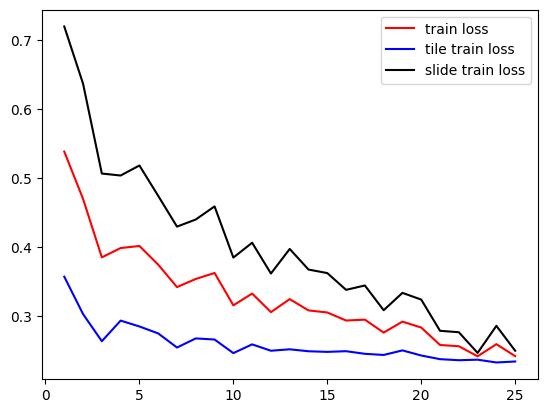

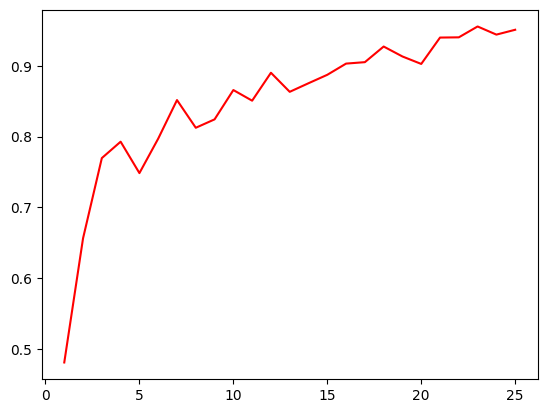

Training model n°9
MixedMILModel(
  (reduction): Sequential(
    (0): Dropout(p=0.25, inplace=False)
    (1): Linear(in_features=2048, out_features=1024, bias=True)
    (2): ReLU()
  )
  (attention): AttentionLayer(
    (U): Linear(in_features=1024, out_features=512, bias=False)
    (V): Linear(in_features=1024, out_features=512, bias=False)
    (W): Linear(in_features=512, out_features=1, bias=False)
  )
  (slide_clf): Sequential(
    (0): Dropout(p=0.25, inplace=False)
    (1): Linear(in_features=1024, out_features=256, bias=True)
    (2): ReLU()
    (3): Dropout(p=0.25, inplace=False)
    (4): Linear(in_features=256, out_features=1, bias=True)
    (5): Sigmoid()
  )
  (tiles_clf): Sequential(
    (0): Dropout(p=0.25, inplace=False)
    (1): Linear(in_features=1024, out_features=1, bias=True)
    (2): Sigmoid()
  )
)


100%|██████████| 279/279 [00:08<00:00, 32.66it/s]


Epoch 1: train loss 0.520 train auc 0.622 tiles auc 0.800


100%|██████████| 279/279 [00:08<00:00, 33.66it/s]


Epoch 2: train loss 0.411 train auc 0.765 tiles auc 0.898


100%|██████████| 279/279 [00:08<00:00, 32.46it/s]


Epoch 3: train loss 0.356 train auc 0.842 tiles auc 0.908


100%|██████████| 279/279 [00:08<00:00, 32.72it/s]


Epoch 4: train loss 0.356 train auc 0.841 tiles auc 0.906


100%|██████████| 279/279 [00:08<00:00, 33.54it/s]


Epoch 5: train loss 0.344 train auc 0.866 tiles auc 0.903


100%|██████████| 279/279 [00:08<00:00, 32.59it/s]


Epoch 6: train loss 0.335 train auc 0.868 tiles auc 0.909


100%|██████████| 279/279 [00:08<00:00, 32.50it/s]


Epoch 7: train loss 0.311 train auc 0.881 tiles auc 0.913


100%|██████████| 279/279 [00:08<00:00, 33.50it/s]


Epoch 8: train loss 0.308 train auc 0.887 tiles auc 0.916


100%|██████████| 279/279 [00:08<00:00, 32.27it/s]


Epoch 9: train loss 0.296 train auc 0.901 tiles auc 0.915


100%|██████████| 279/279 [00:08<00:00, 32.23it/s]


Epoch 10: train loss 0.313 train auc 0.889 tiles auc 0.920


100%|██████████| 279/279 [00:08<00:00, 33.60it/s]


Epoch 11: train loss 0.304 train auc 0.882 tiles auc 0.922


100%|██████████| 279/279 [00:08<00:00, 32.57it/s]


Epoch 12: train loss 0.300 train auc 0.899 tiles auc 0.919


100%|██████████| 279/279 [00:08<00:00, 32.55it/s]


Epoch 13: train loss 0.269 train auc 0.928 tiles auc 0.921


100%|██████████| 279/279 [00:08<00:00, 33.00it/s]


Epoch 14: train loss 0.272 train auc 0.928 tiles auc 0.920


100%|██████████| 279/279 [00:08<00:00, 32.42it/s]


Epoch 15: train loss 0.268 train auc 0.927 tiles auc 0.925


100%|██████████| 279/279 [00:08<00:00, 32.28it/s]


Epoch 16: train loss 0.271 train auc 0.928 tiles auc 0.924


100%|██████████| 279/279 [00:08<00:00, 32.75it/s]


Epoch 17: train loss 0.266 train auc 0.928 tiles auc 0.923


100%|██████████| 279/279 [00:08<00:00, 32.42it/s]


Epoch 18: train loss 0.256 train auc 0.940 tiles auc 0.924


100%|██████████| 279/279 [00:08<00:00, 32.16it/s]


Epoch 19: train loss 0.274 train auc 0.926 tiles auc 0.926


100%|██████████| 279/279 [00:08<00:00, 32.96it/s]


Epoch 20: train loss 0.248 train auc 0.947 tiles auc 0.928


100%|██████████| 279/279 [00:08<00:00, 32.38it/s]


Epoch 21: train loss 0.235 train auc 0.953 tiles auc 0.933


100%|██████████| 279/279 [00:08<00:00, 32.38it/s]


Epoch 22: train loss 0.232 train auc 0.958 tiles auc 0.926


100%|██████████| 279/279 [00:08<00:00, 32.56it/s]


Epoch 23: train loss 0.223 train auc 0.957 tiles auc 0.930


100%|██████████| 279/279 [00:08<00:00, 32.84it/s]


Epoch 24: train loss 0.226 train auc 0.957 tiles auc 0.930


100%|██████████| 279/279 [00:08<00:00, 32.49it/s]


Epoch 25: train loss 0.219 train auc 0.959 tiles auc 0.932
Best auc: 0.959, last auc: 0.959, best epoch: 25


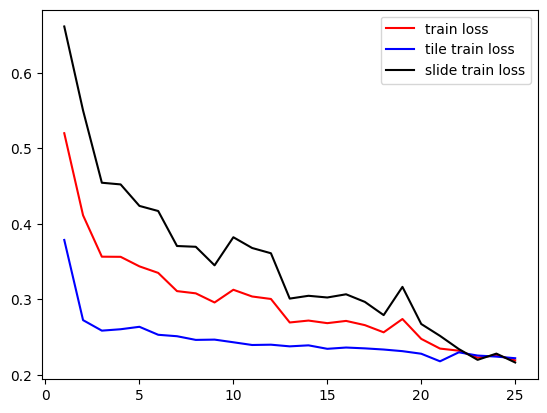

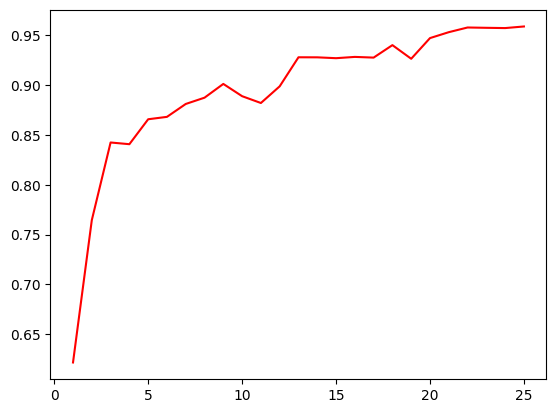

In [8]:
model = MixedMILModel(2048, 1024, 256, 512, ds=False, p=0.25)

train_N_models(model, train_dataset, N=10, output_dir=model_dir, n_epochs=25, lr=5e-4, step_size=10)

In [6]:
test_feat_dir = os.path.join(base_dir, 'test_input/resnet_features/')
test_dataset = FeaturesDataset(test_feat_dir)

In [10]:
test_pred, detail_test_pred = load_models_and_average(model_dir, test_dataset)

100%|██████████| 120/120 [00:29<00:00,  4.02it/s]


In [11]:
detail_test_pred

[tensor([0.2849, 0.0260, 0.1342, 0.0335, 0.0383, 0.1651, 0.0517, 0.1488, 0.0965,
         0.1306]),
 tensor([0.0322, 0.0479, 0.0732, 0.0373, 0.1021, 0.0946, 0.0047, 0.0025, 0.2945,
         0.0691]),
 tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
         1.0000]),
 tensor([1.0000, 1.0000, 1.0000, 1.0000, 0.9999, 1.0000, 1.0000, 0.9997, 1.0000,
         1.0000]),
 tensor([0.0375, 0.0313, 0.1520, 0.0487, 0.0223, 0.1950, 0.3736, 0.0521, 0.0235,
         0.0520]),
 tensor([0.0302, 0.0220, 0.0525, 0.0190, 0.0195, 0.0080, 0.0096, 0.0101, 0.0049,
         0.0363]),
 tensor([0.0379, 0.0188, 0.0614, 0.0329, 0.0010, 0.0652, 0.0066, 0.0068, 0.1269,
         0.0051]),
 tensor([0.0433, 0.0321, 0.0608, 0.0151, 0.0036, 0.0010, 0.0026, 0.0118, 0.1994,
         0.0197]),
 tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 0.9999, 1.0000,
         1.0000]),
 tensor([1.0000, 1.0000, 1.0000, 1.0000, 0.9999, 1.0000, 1.0000, 0.9998, 1.0000,
         1.0000]),


In [14]:
output_path = os.path.join(base_dir, 'test_output.csv')

write_prediction_file(test_pred, test_feat_dir, output_path)

## Attention scores visualization

In [13]:
model_path = os.path.join(model_dir, 'model_1.pth')
model = torch.load(model_path)

100%|██████████| 10/10 [00:00<00:00, 40.86it/s]


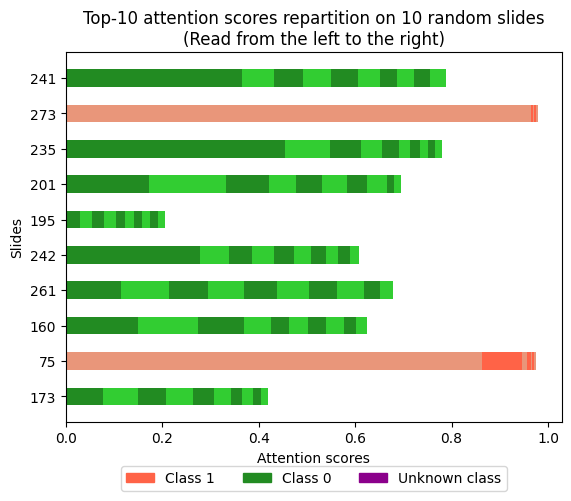

In [14]:
topk_attention_maps(model, train_dataset, 10, K=10)

100%|██████████| 10/10 [00:00<00:00, 39.19it/s]


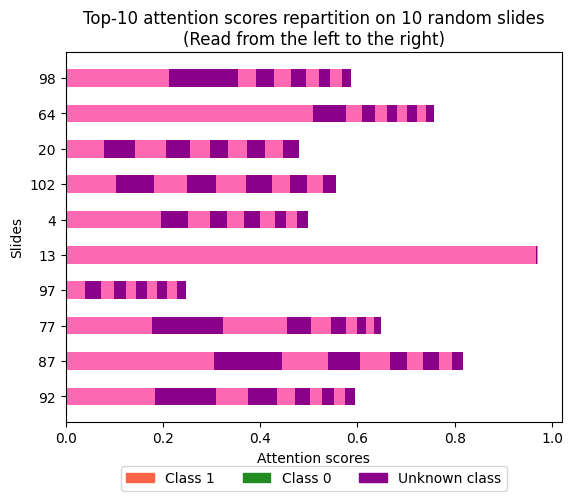

In [15]:
topk_attention_maps(model, test_dataset, 10, K=10)